### Phase Corrected Images - Provided Data

In [25]:
import matplotlib.pyplot as plt
import mppca_implementations.mppca_controlled as mc
import numpy as np
import os

from dipy.denoise.localpca import mppca
from scipy import ndimage
from tqdm import tqdm

from utils.readNaImage import read_na_image
import importlib

In [26]:
def reload_module(module_name):
    importlib.reload(module_name)
    print(f"Reloaded {module_name.__name__}")

In [65]:
def get_4d_complex_data_provided(num_images=24, zero_imag=False):
    pat_dict_scaled = {}
    pat_dict_corrected = {}
    path = f'Das_Denoising_Data/24_images'
    dims = [64, 64, 64]
    for folder in os.listdir(path):
        if folder.startswith("Das_") or folder.startswith("H0"):
            common_path = os.path.join(path, folder)
            all_avgs_scaled = list()
            all_avgs_corrected = list()

            def process_images(path, dims):
                folder_name = path.split('/')[-2]
                print(folder_name)
                if not folder_name in ['H093_v2_tpiRecon', 'H094_v2_tpiRecon', 'H095_v2_tpiRecon', 'H096_v2_tpiRecon', 'H097_v2_tpiRecon', 'H098_v2_tpiRecon', 'H099_v2_tpiRecon']:
                    path = os.path.join(path, 'AVGall_kw1')

                try:
                    if os.path.exists(os.path.join(path, 'tpirec_image.c0')):
                        filename_scaled = 'tpirec_image.c0'
                    elif os.path.exists(os.path.join(path, 'tpirec-_image.c0')):
                        filename_scaled = 'tpirec-_image.c0'
                    image3d_scaled = read_na_image(os.path.join(path, filename_scaled), *dims, 'complex')
                except:
                    print(f"Error reading file scaled for {folder_name}")
                    image3d_scaled = np.zeros(tuple(dims) + (1,), dtype=np.complex64)[..., 0]

                try:
                    if os.path.exists(os.path.join(path, 'tpirec_image_PC2.c0')):
                        filename_corrected = 'tpirec_image_PC2.c0'
                    elif os.path.exists(os.path.join(path, 'tpirec_image_PC.c0')):
                        filename_corrected = 'tpirec_image_PC.c0'
                    elif os.path.exists(os.path.join(path, 'tpirec-_image_PC.c0')):
                        filename_corrected = 'tpirec-_image_PC.c0'
                    image3d_corrected = read_na_image(os.path.join(path, filename_corrected), *dims, 'complex')
                except:
                    print(f"Error reading {filename_corrected}")
                    image3d_corrected = np.zeros(tuple(dims) + (1,), dtype=np.complex64)

                return image3d_scaled, image3d_corrected

            run_count = 0
            for runs in os.listdir(common_path):
                if runs == '.DS_Store':
                    continue
                if run_count == num_images//6:
                    break
                image3d_scaled, image3d_corrected = process_images(os.path.join(common_path, runs), dims)
                all_avgs_scaled.append(image3d_scaled)
                all_avgs_corrected.append(image3d_corrected)
                run_count += 1
                    

            if folder.startswith("Das_"):
                folder_key = folder.split("_")[1]
            else:
                folder_key = folder.split("_")[0]
            folder_key = folder_key.split("H0")[1]

            all_avgs_scaled = np.array(all_avgs_scaled)
            pat_dict_scaled[folder_key] = np.transpose(all_avgs_scaled, (1, 2, 3, 0))

            all_avgs_corrected = np.array(all_avgs_corrected)
            pat_dict_corrected[folder_key] = np.transpose(all_avgs_corrected, (1, 2, 3, 0))

    return pat_dict_scaled, pat_dict_corrected 

pat_dict_scaled_provided, pat_dict_corrected_provided = get_4d_complex_data_provided(24)

H077_v2_tpiRecon
H077_v2_tpiRecon
H077_v2_tpiRecon
Das_H049_v2
Das_H049_v2
Das_H049_v2
Das_H049_v2
H096_v2_tpiRecon
Error reading file scaled for H096_v2_tpiRecon
H096_v2_tpiRecon
Error reading file scaled for H096_v2_tpiRecon
H096_v2_tpiRecon
Error reading file scaled for H096_v2_tpiRecon
H083_v2_tpiRecon
H083_v2_tpiRecon
H083_v2_tpiRecon
H086_v2_tpiRecon
H086_v2_tpiRecon
H086_v2_tpiRecon
H072_v2_tpiRecon
H072_v2_tpiRecon
H072_v2_tpiRecon
Das_H048_v2
Das_H048_v2
Das_H048_v2
H093_v2_tpiRecon
Error reading file scaled for H093_v2_tpiRecon
H093_v2_tpiRecon
Error reading file scaled for H093_v2_tpiRecon
H093_v2_tpiRecon
Error reading file scaled for H093_v2_tpiRecon
H090_v2_tpiRecon
H090_v2_tpiRecon
H090_v2_tpiRecon
H071_v2_tpiRecon
H071_v2_tpiRecon
H071_v2_tpiRecon
H099_v2_tpiRecon
H099_v2_tpiRecon
H099_v2_tpiRecon
H078_v2_tpiRecon
H078_v2_tpiRecon
H078_v2_tpiRecon
H085_v2_tpiRecon
H085_v2_tpiRecon
H085_v2_tpiRecon
H080_v2_tpiRecon
H080_v2_tpiRecon
H080_v2_tpiRecon
H095_v2_tpiRecon
Error

In [66]:

print(sorted(pat_dict_scaled_provided.keys()))

pat_dict_corrected_provided["48"].shape


['48', '49', '50', '51', '52', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


(64, 64, 64, 3)

In [41]:
image3d_scaled = pat_dict_scaled_provided["48"][...,0] # run 1
print(image3d_scaled.shape)
print(np.iscomplexobj(image3d_scaled)) 

print(image3d_scaled[0,0,0])

middle_slice_scaled = image3d_scaled[:,:,32]

mean_phase = np.mean(np.angle(middle_slice_scaled))
print(mean_phase)

image3d_scaled = np.expand_dims(image3d_scaled, axis=-1)
print(image3d_scaled.shape)
middle_slice_scaled.shape

(64, 64, 64)
True
(3.1011999-12.7199135j)
0.6191996
(64, 64, 64, 1)


(64, 64)

In [42]:
image3d_corrected = pat_dict_corrected_provided["48"][...,0] # run 1
print(image3d_corrected.shape)
print(np.iscomplexobj(image3d_corrected)) 

print(image3d_corrected[0,0,0])

middle_slice_corrected = image3d_corrected[:,:,32]

mean_phase = np.mean(np.angle(middle_slice_corrected))
print(mean_phase)

image3d_corrected = np.expand_dims(image3d_corrected, axis=-1)
print(image3d_corrected.shape)
print(middle_slice_corrected.shape)



(64, 64, 64)
True
(-5.1410437+12.040901j)
0.08869898
(64, 64, 64, 1)
(64, 64)


In [7]:
denoised_image3d_corrected = mppca(image3d_corrected.real, patch_radius=1)

denoised_image3d_scaled = mppca(image3d_scaled.real, patch_radius=1)


In [67]:
img = pat_dict_corrected_provided["49"]
print(img.shape)

(64, 64, 64, 4)


In [69]:
import numpy as np
from scipy import linalg
from tqdm import tqdm

def fixed_mppca(X, patch_radius=2, n_components=None):
    """
    Fixed implementation of MPPCA denoising.
    
    Parameters:
    -----------
    X : ndarray
        Input 4D array of shape [x, y, z, N]
    patch_radius : int
        Radius of patch for local PCA
    n_components : int
        Number of components to keep
    """
    sx, sy, sz, N = X.shape
    patch_size = 2 * patch_radius + 1
    
    # Initialize output
    Xdn = np.zeros_like(X)
    weights = np.zeros((sx, sy, sz))
    
    # Pad input array
    pad_width = ((patch_radius, patch_radius),
                 (patch_radius, patch_radius),
                 (patch_radius, patch_radius),
                 (0, 0))
    X_padded = np.pad(X, pad_width, mode='reflect')
    
    for x in range(patch_radius, sx + patch_radius):
        for y in range(patch_radius, sy + patch_radius):
            for z in range(patch_radius, sz + patch_radius):
                # Extract patch
                patch = X_padded[x-patch_radius:x+patch_radius+1,
                                y-patch_radius:y+patch_radius+1,
                                z-patch_radius:z+patch_radius+1]
                
                # Reshape patch to 2D matrix
                M = patch.reshape(-1, N)
                
                # Perform SVD
                U, S, Vh = linalg.svd(M, full_matrices=False)
                
                # Calculate noise threshold
                noise_threshold = np.median(S) / 0.6745  # Robust noise estimation
                
                if n_components is not None:
                    # Keep only specified number of components
                    S_filtered = np.zeros_like(S)
                    S_filtered[:n_components] = S[:n_components]
                    
                    # Apply soft thresholding to retained components
                    S_filtered = np.maximum(S_filtered - noise_threshold, 0)
                else:
                    # Automatic thresholding
                    S_filtered = np.maximum(S - noise_threshold, 0)
                
                # Reconstruct
                M_denoised = U @ np.diag(S_filtered) @ Vh
                
                # Reshape back to patch
                patch_denoised = M_denoised.reshape(patch_size, patch_size, patch_size, N)
                
                # Store central voxel
                Xdn[x-patch_radius, y-patch_radius, z-patch_radius] = \
                    patch_denoised[patch_radius, patch_radius, patch_radius]
                weights[x-patch_radius, y-patch_radius, z-patch_radius] += 1
    
    # Average overlapping patches
    Xdn = Xdn / weights[..., np.newaxis]
    
    return Xdn

def improved_mppca(X, patch_radius=2, n_components=None):
    """
    Marchenko-Pastur PCA denoising with automatic component selection.
    
    Parameters:
    -----------
    X : ndarray
        Input 4D array of shape [x, y, z, N] where N is number of measurements
    patch_radius : int
        Radius of patch for local PCA (default: 2)
    n_components : int, optional
        Force number of components. If None, automatically determined.
        
    Returns:
    --------
    Xdn : ndarray
        Denoised array of same shape as input
    sigma : float
        Estimated noise level
    n_components_used : int
        Number of components used for denoising
    """
    # Extract dimensions
    sx, sy, sz, N = X.shape
    patch_size = 2 * patch_radius + 1
    
    # Initialize output
    Xdn = np.zeros_like(X)
    weights = np.zeros((sx, sy, sz))
    
    # Pad input array
    pad_width = ((patch_radius, patch_radius),
                 (patch_radius, patch_radius),
                 (patch_radius, patch_radius),
                 (0, 0))
    X_padded = np.pad(X, pad_width, mode='reflect')
    
    # Process each voxel
    for x in tqdm(range(patch_radius, sx + patch_radius)):
        for y in range(patch_radius, sy + patch_radius):
            for z in range(patch_radius, sz + patch_radius):
                # Extract patch
                patch = X_padded[x-patch_radius:x+patch_radius+1,
                                y-patch_radius:y+patch_radius+1,
                                z-patch_radius:z+patch_radius+1]
                
                # Reshape patch to 2D matrix
                M = patch.reshape(-1, N)
                
                if n_components is None:
                    # Perform SVD
                    U, S, Vh = linalg.svd(M, full_matrices=False)
                    
                    # Marchenko-Pastur threshold
                    sigma, npars = mp_threshold(S, M.shape[0], N)
                    
                    # Zero out components beyond threshold
                    S[npars:] = 0
                    
                    # Reconstruct
                    M_denoised = U @ np.diag(S) @ Vh
                else:
                    # Use fixed number of components
                    U, S, Vh = linalg.svd(M, full_matrices=False)
                    S[n_components:] = 0
                    M_denoised = U @ np.diag(S) @ Vh
                    
                # Reshape back to patch
                patch_denoised = M_denoised.reshape(patch_size, patch_size, patch_size, N)
                
                # Store central voxel
                Xdn[x-patch_radius, y-patch_radius, z-patch_radius] = \
                    patch_denoised[patch_radius, patch_radius, patch_radius]
                weights[x-patch_radius, y-patch_radius, z-patch_radius] += 1
                
    # Average overlapping patches
    Xdn = Xdn / weights[..., np.newaxis]
    
    return Xdn, sigma if n_components is None else None, \
           npars if n_components is None else n_components

def mp_threshold(S, M, N):
    """
    Calculate Marchenko-Pastur threshold for eigenvalues.
    
    Parameters:
    -----------
    S : ndarray
        Singular values
    M : int
        Number of observations
    N : int
        Number of variables
        
    Returns:
    --------
    sigma : float
        Estimated noise level
    npars : int
        Number of significant components
    """
    # Convert to eigenvalues
    vals = S**2 / N
    
    # Get scaling factor
    scaling = np.ones(len(vals))
    if M > N:
        scaling = (M - np.arange(len(vals))) / N
        scaling[scaling < 1] = 1
    
    # Calculate sigmas
    csum = np.cumsum(vals[::-1])[::-1]
    cmean = csum / np.arange(len(vals), 0, -1)
    sigmasq_1 = cmean / scaling
    
    gamma = (M - np.arange(len(vals))) / N
    rangeMP = 4 * np.sqrt(gamma)
    rangeData = vals - vals[-1]
    sigmasq_2 = rangeData / rangeMP
    
    # Find threshold
    t = np.argmax(sigmasq_2 < sigmasq_1)
    sigma = np.sqrt(sigmasq_1[t])
    
    return sigma, t

def analyze_eigenvalues(X, patch_radius=2):
    """
    Analyze eigenvalue distribution for a sample of patches.
    
    Parameters:
    -----------
    X : ndarray
        Input 4D array
    patch_radius : int
        Radius of patch
        
    Returns:
    --------
    eigenvalues : ndarray
        Array of eigenvalues from sampled patches
    cutoffs : ndarray
        Array of cutoff values for each patch
    """
    patch_size = 2 * patch_radius + 1
    sx, sy, sz, N = X.shape
    
    # Sample patches
    n_samples = 100
    eigenvalues = []
    cutoffs = []
    
    for _ in range(n_samples):
        # Random location
        x = np.random.randint(patch_radius, sx - patch_radius)
        y = np.random.randint(patch_radius, sy - patch_radius)
        z = np.random.randint(patch_radius, sz - patch_radius)
        
        # Extract patch
        patch = X[x-patch_radius:x+patch_radius+1,
                 y-patch_radius:y+patch_radius+1,
                 z-patch_radius:z+patch_radius+1]
        
        # Reshape and perform SVD
        M = patch.reshape(-1, N)
        _, S, _ = linalg.svd(M, full_matrices=False)
        
        # Get threshold
        sigma, npars = mp_threshold(S, M.shape[0], N)
        
        eigenvalues.append(S**2 / N)
        cutoffs.append(npars)
        
    return np.array(eigenvalues), np.array(cutoffs)

In [79]:
from collections import defaultdict
results_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

for sub in pat_dict_corrected_provided.keys():
    print(f"Subject: {sub}")
    X = pat_dict_corrected_provided[sub]

    # patch_radii = [1, 2, 3]
    patch_radius = 2
    n_components_list = [None, 1,2,3,4,7]
    

    denoised_list = []
    sigma_list = []
    npars_list = []
    eigenvalues_list = []
    cutoffs_list = []

    # Run denoising with automatic component selection
    for n_components in n_components_list:
        denoised, sigma, npars = improved_mppca(X, patch_radius=patch_radius, n_components=n_components)

    #     # Analyze eigenvalue distribution
        eigenvalues, cutoffs = analyze_eigenvalues(X, patch_radius=patch_radius)

        denoised_list.append(denoised)
        sigma_list.append(sigma)
        npars_list.append(npars)
        eigenvalues_list.append(eigenvalues)
        cutoffs_list.append(cutoffs)

        results_dict[sub][n_components][patch_radius] = {"denoised": denoised, "sigma": sigma, "npars": npars, "eigenvalues": eigenvalues, "cutoffs": cutoffs}


    for i in range(len(n_components_list)):
        print(f"N components: {n_components_list[i]}")
        print(f"Denoised shape: {denoised_list[i].shape}, Sigma: {sigma_list[i]}, Npars: {npars_list[i]}")
        print(f"Eigenvalues shape: {eigenvalues_list[i].shape}, Cutoffs shape: {cutoffs_list[i].shape}")

Subject: 77


100%|██████████| 64/64 [00:32<00:00,  1.96it/s]


N components: None
Denoised shape: (64, 64, 64, 3), Sigma: 17.021607949753808, Npars: 2
Eigenvalues shape: (100, 3), Cutoffs shape: (100,)
N components: 1
Denoised shape: (64, 64, 64, 3), Sigma: None, Npars: 1
Eigenvalues shape: (100, 3), Cutoffs shape: (100,)
N components: 2
Denoised shape: (64, 64, 64, 3), Sigma: None, Npars: 2
Eigenvalues shape: (100, 3), Cutoffs shape: (100,)
N components: 3
Denoised shape: (64, 64, 64, 3), Sigma: None, Npars: 3
Eigenvalues shape: (100, 3), Cutoffs shape: (100,)
N components: 4
Denoised shape: (64, 64, 64, 3), Sigma: None, Npars: 4
Eigenvalues shape: (100, 3), Cutoffs shape: (100,)
N components: 7
Denoised shape: (64, 64, 64, 3), Sigma: None, Npars: 7
Eigenvalues shape: (100, 3), Cutoffs shape: (100,)
Subject: 49


100%|██████████| 64/64 [00:33<00:00,  1.93it/s]


N components: None
Denoised shape: (64, 64, 64, 4), Sigma: 25.06315067683218, Npars: 2
Eigenvalues shape: (100, 4), Cutoffs shape: (100,)
N components: 1
Denoised shape: (64, 64, 64, 4), Sigma: None, Npars: 1
Eigenvalues shape: (100, 4), Cutoffs shape: (100,)
N components: 2
Denoised shape: (64, 64, 64, 4), Sigma: None, Npars: 2
Eigenvalues shape: (100, 4), Cutoffs shape: (100,)
N components: 3
Denoised shape: (64, 64, 64, 4), Sigma: None, Npars: 3
Eigenvalues shape: (100, 4), Cutoffs shape: (100,)
N components: 4
Denoised shape: (64, 64, 64, 4), Sigma: None, Npars: 4
Eigenvalues shape: (100, 4), Cutoffs shape: (100,)
N components: 7
Denoised shape: (64, 64, 64, 4), Sigma: None, Npars: 7
Eigenvalues shape: (100, 4), Cutoffs shape: (100,)
Subject: 96


 39%|███▉      | 25/64 [00:24<00:37,  1.03it/s]


KeyboardInterrupt: 

In [ ]:
for i in range(len(n_components_list)):
    print(f"N components: {n_components_list[i]}")
    data = X
    # denoised = mppca(get_image_mag(data), patch_radius=10) # trying with another patch radius
    denoised_mp = denoised_list[i]
    sli = data.shape[2] // 2
    gra = data.shape[3] - 1

    orig = data[:, sli, :, gra]
    den = denoised_mp[:, sli, :, gra]
    rms_diff = np.sqrt((orig.real - den.real) ** 2)
    diff = orig.real - den.real

    orig = np.rot90(np.rot90(orig))
    den = np.rot90(np.rot90(den))
    rms_diff = np.rot90(np.rot90(rms_diff))
    diff = np.rot90(np.rot90(diff))

    fig1, ax = plt.subplots(2, 4, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})

    fig1.subplots_adjust(hspace=0.3, wspace=0.05)

    ax[0, 0].imshow(orig.real, cmap='gray', interpolation='none', origin='lower')
    ax[0, 0].set_title('Original - Real')
    ax[0, 1].imshow(orig.imag, cmap='gray', interpolation='none', origin='lower')
    ax[0, 1].set_title('Original - Imaginary')
    ax[0, 2].imshow(abs(orig), cmap='gray', interpolation='none', origin='lower')
    ax[0, 2].set_title('Original - Magnitude')
    ax[0, 3].imshow(np.angle(orig), cmap='gray', interpolation='none', origin='lower')  
    ax[0, 3].set_title('Original - Phase')
    ax[1, 0].imshow(den.real, cmap='gray', interpolation='none', origin='lower')
    ax[1, 0].set_title('Denoised Real')
    ax[1, 1].imshow(den.imag, cmap='gray', interpolation='none', origin='lower')
    ax[1, 1].set_title('Denoised Imag')
    ax[1, 2].imshow(abs(den), cmap='gray', interpolation='none', origin='lower')
    ax[1, 2].set_title('Denoised Magnitude')
    ax[1, 3].imshow(np.angle(den), cmap='gray', interpolation='none', origin='lower')  
    ax[1, 3].set_title('Denoised Phase')

    fig2, ax2 = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'xticks': [], 'yticks': []})     
    ax2[0].imshow(diff, cmap='gray', interpolation='none', origin='lower')
    ax2[0].set_title(f'Residual: \norig.real - denoise(orig.real)')
    ax2[1].imshow(rms_diff, cmap='gray', interpolation='none', origin='lower')
    ax2[1].set_title('RMS Residuals')


In [ ]:

# Visualize eigenvalue distribution
plt.figure(figsize=(10, 6))
plt.boxplot(eigenvalues)
plt.yscale('log')
plt.xlabel('Component Index')
plt.ylabel('Eigenvalue (log scale)')
plt.title('Distribution of Eigenvalues Across Patches')
plt.show()

# Histogram of cutoff points
plt.figure(figsize=(10, 6))
plt.hist(cutoffs, bins=20)
plt.xlabel('Number of Components Selected')
plt.ylabel('Frequency')
plt.title('Distribution of Automatically Selected Components')
plt.show()


Analyzing subject 77
Running component analysis...


  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [00:30<02:32, 30.43s/it]

Components: 1, PSNR: 28.95312586349219 dB, Sigma: None


 33%|███▎      | 2/6 [01:00<02:00, 30.18s/it]

Components: 2, PSNR: 34.79741859996536 dB, Sigma: None


 50%|█████     | 3/6 [01:31<01:31, 30.57s/it]

Components: 3, PSNR: 149.66424042222664 dB, Sigma: None


 67%|██████▋   | 4/6 [02:00<00:59, 29.98s/it]

Components: 4, PSNR: 149.66424042222664 dB, Sigma: None


 83%|████████▎ | 5/6 [02:35<00:31, 31.76s/it]

Components: 5, PSNR: 149.66424042222664 dB, Sigma: None


100%|██████████| 6/6 [03:08<00:00, 31.45s/it]


Components: 10, PSNR: 149.66424042222664 dB, Sigma: None


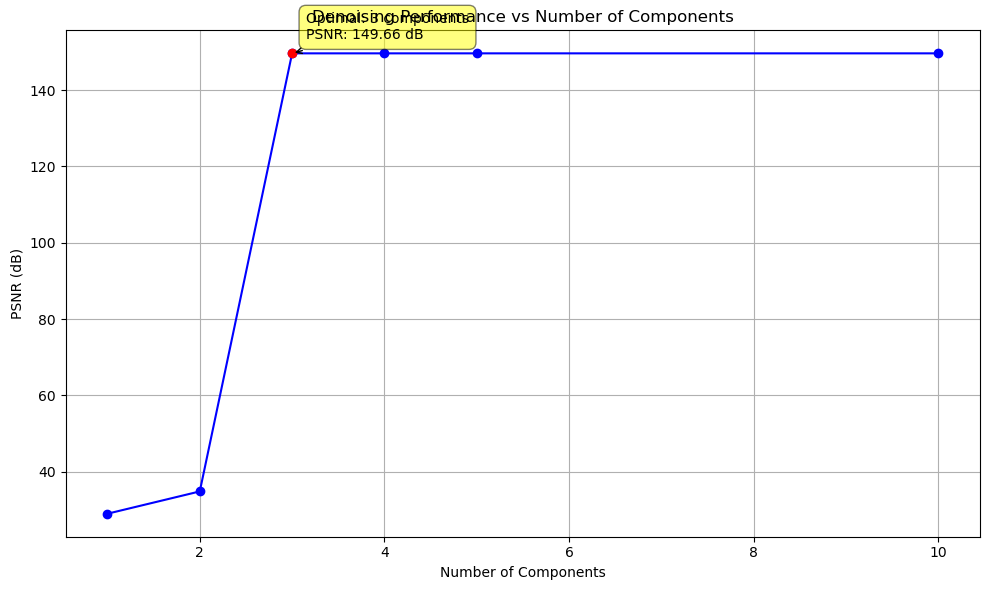


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.66 dB
PSNR improvement: 120.71 dB

Analyzing subject 49
Running component analysis...


 17%|█▋        | 1/6 [00:31<02:38, 31.67s/it]

Components: 1, PSNR: 26.689786021943867 dB, Sigma: None


 33%|███▎      | 2/6 [01:03<02:06, 31.59s/it]

Components: 2, PSNR: 30.696923235072326 dB, Sigma: None


 50%|█████     | 3/6 [01:35<01:35, 31.86s/it]

Components: 3, PSNR: 35.289240159559704 dB, Sigma: None


 67%|██████▋   | 4/6 [02:10<01:06, 33.21s/it]

Components: 4, PSNR: 146.2219137523286 dB, Sigma: None


 83%|████████▎ | 5/6 [02:45<00:33, 33.95s/it]

Components: 5, PSNR: 146.2219137523286 dB, Sigma: None


100%|██████████| 6/6 [03:25<00:00, 34.19s/it]


Components: 10, PSNR: 146.2219137523286 dB, Sigma: None


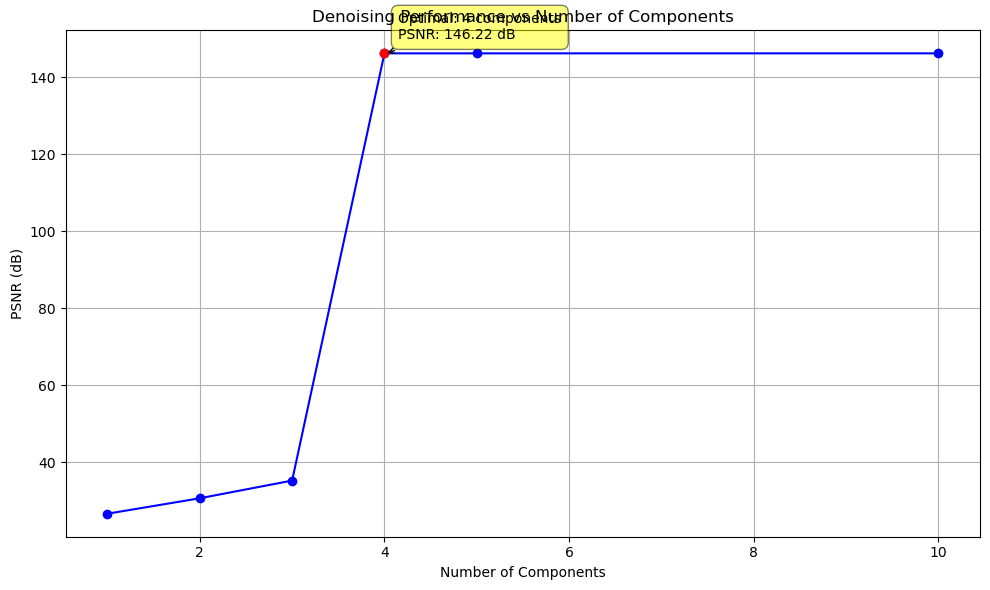


Analysis Summary:
Optimal number of components: 4
Best PSNR: 146.22 dB
PSNR improvement: 119.53 dB

Analyzing subject 96
Running component analysis...


 17%|█▋        | 1/6 [00:37<03:09, 37.94s/it]

Components: 1, PSNR: 28.526632932937737 dB, Sigma: None


 33%|███▎      | 2/6 [01:13<02:26, 36.61s/it]

Components: 2, PSNR: 33.103902617237864 dB, Sigma: None


 50%|█████     | 3/6 [01:44<01:42, 34.08s/it]

Components: 3, PSNR: 149.7407105883189 dB, Sigma: None


 67%|██████▋   | 4/6 [02:15<01:05, 32.60s/it]

Components: 4, PSNR: 149.7407105883189 dB, Sigma: None


 83%|████████▎ | 5/6 [02:46<00:32, 32.35s/it]

Components: 5, PSNR: 149.7407105883189 dB, Sigma: None


100%|██████████| 6/6 [03:27<00:00, 34.60s/it]


Components: 10, PSNR: 149.7407105883189 dB, Sigma: None


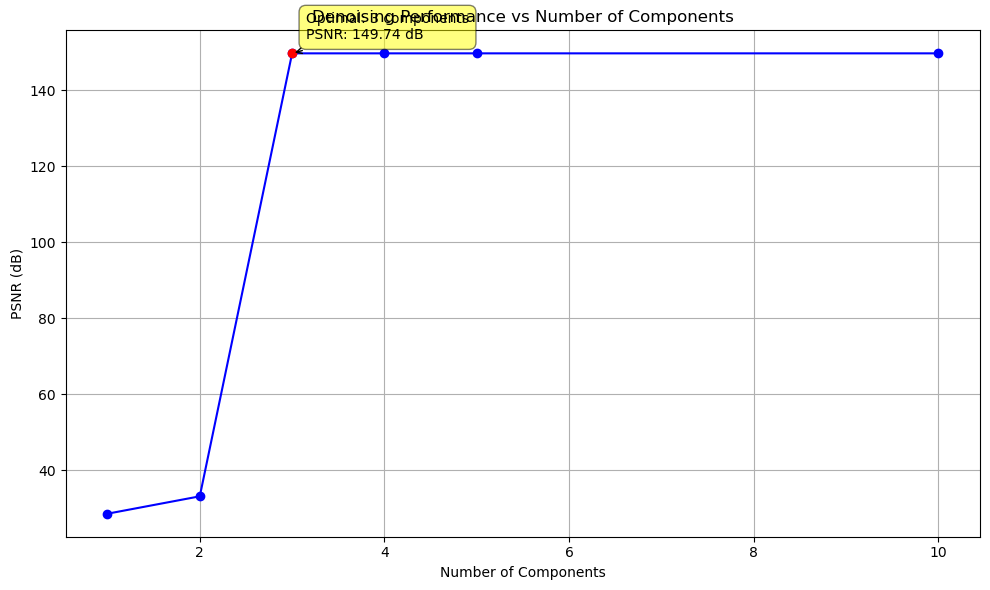


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.74 dB
PSNR improvement: 121.21 dB

Analyzing subject 83
Running component analysis...


 17%|█▋        | 1/6 [00:50<04:10, 50.03s/it]

Components: 1, PSNR: 31.480136520191977 dB, Sigma: None


 33%|███▎      | 2/6 [01:33<03:03, 45.96s/it]

Components: 2, PSNR: 36.97036249766477 dB, Sigma: None


 50%|█████     | 3/6 [02:15<02:13, 44.45s/it]

Components: 3, PSNR: 148.44058589928704 dB, Sigma: None


 67%|██████▋   | 4/6 [02:59<01:28, 44.13s/it]

Components: 4, PSNR: 148.44058589928704 dB, Sigma: None


 83%|████████▎ | 5/6 [03:43<00:44, 44.18s/it]

Components: 5, PSNR: 148.44058589928704 dB, Sigma: None


100%|██████████| 6/6 [04:28<00:00, 44.81s/it]


Components: 10, PSNR: 148.44058589928704 dB, Sigma: None


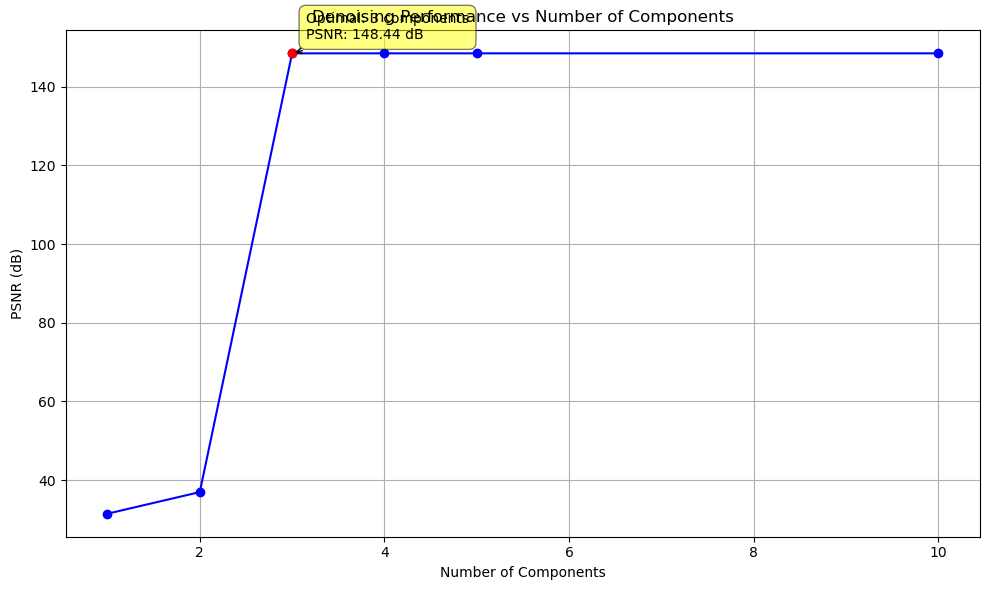


Analysis Summary:
Optimal number of components: 3
Best PSNR: 148.44 dB
PSNR improvement: 116.96 dB

Analyzing subject 86
Running component analysis...


 17%|█▋        | 1/6 [00:53<04:28, 53.79s/it]

Components: 1, PSNR: 28.3173320998491 dB, Sigma: None


 33%|███▎      | 2/6 [01:42<03:22, 50.59s/it]

Components: 2, PSNR: 33.47745570816676 dB, Sigma: None


 50%|█████     | 3/6 [02:30<02:29, 49.74s/it]

Components: 3, PSNR: 149.37422320642554 dB, Sigma: None


 67%|██████▋   | 4/6 [03:17<01:37, 48.54s/it]

Components: 4, PSNR: 149.37422320642554 dB, Sigma: None


 83%|████████▎ | 5/6 [04:00<00:46, 46.68s/it]

Components: 5, PSNR: 149.37422320642554 dB, Sigma: None


100%|██████████| 6/6 [04:45<00:00, 47.59s/it]


Components: 10, PSNR: 149.37422320642554 dB, Sigma: None


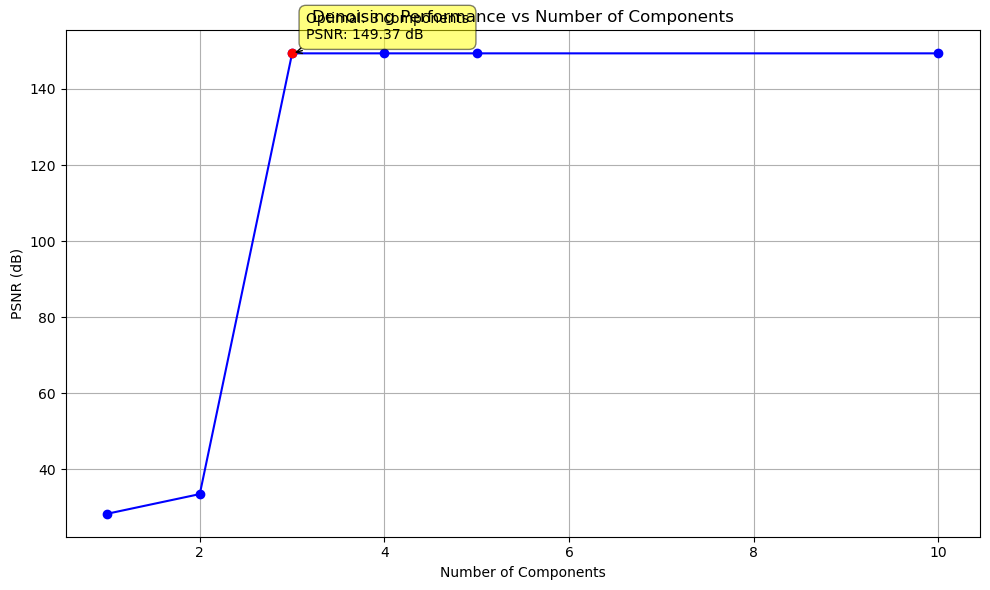


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.37 dB
PSNR improvement: 121.06 dB

Analyzing subject 72
Running component analysis...


 17%|█▋        | 1/6 [00:42<03:34, 42.95s/it]

Components: 1, PSNR: 28.531850536614968 dB, Sigma: None


 33%|███▎      | 2/6 [01:24<02:49, 42.32s/it]

Components: 2, PSNR: 33.06412508876737 dB, Sigma: None


 50%|█████     | 3/6 [02:04<02:03, 41.32s/it]

Components: 3, PSNR: 148.96311412053325 dB, Sigma: None


 67%|██████▋   | 4/6 [02:37<01:15, 37.88s/it]

Components: 4, PSNR: 148.96311412053325 dB, Sigma: None


 83%|████████▎ | 5/6 [03:11<00:36, 36.57s/it]

Components: 5, PSNR: 148.96311412053325 dB, Sigma: None


100%|██████████| 6/6 [03:44<00:00, 37.41s/it]


Components: 10, PSNR: 148.96311412053325 dB, Sigma: None


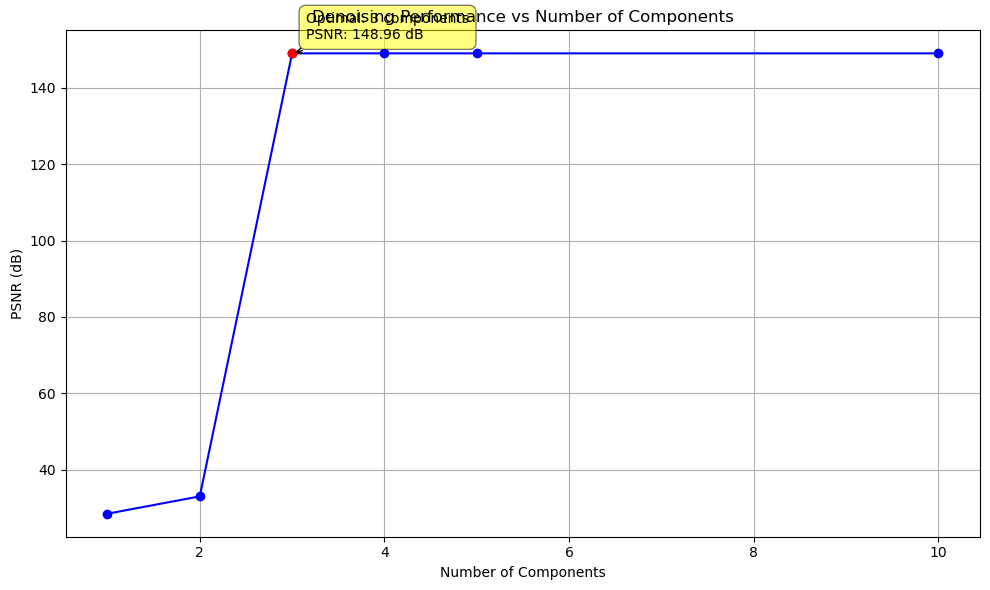


Analysis Summary:
Optimal number of components: 3
Best PSNR: 148.96 dB
PSNR improvement: 120.43 dB

Analyzing subject 48
Running component analysis...


 17%|█▋        | 1/6 [00:34<02:50, 34.07s/it]

Components: 1, PSNR: 28.25044998249315 dB, Sigma: None


 33%|███▎      | 2/6 [01:06<02:13, 33.32s/it]

Components: 2, PSNR: 32.37514001483473 dB, Sigma: None


 50%|█████     | 3/6 [01:41<01:41, 33.77s/it]

Components: 3, PSNR: 148.68836178447444 dB, Sigma: None


 67%|██████▋   | 4/6 [02:16<01:09, 34.52s/it]

Components: 4, PSNR: 148.68836178447444 dB, Sigma: None


 83%|████████▎ | 5/6 [02:53<00:35, 35.36s/it]

Components: 5, PSNR: 148.68836178447444 dB, Sigma: None


100%|██████████| 6/6 [03:29<00:00, 34.98s/it]


Components: 10, PSNR: 148.68836178447444 dB, Sigma: None


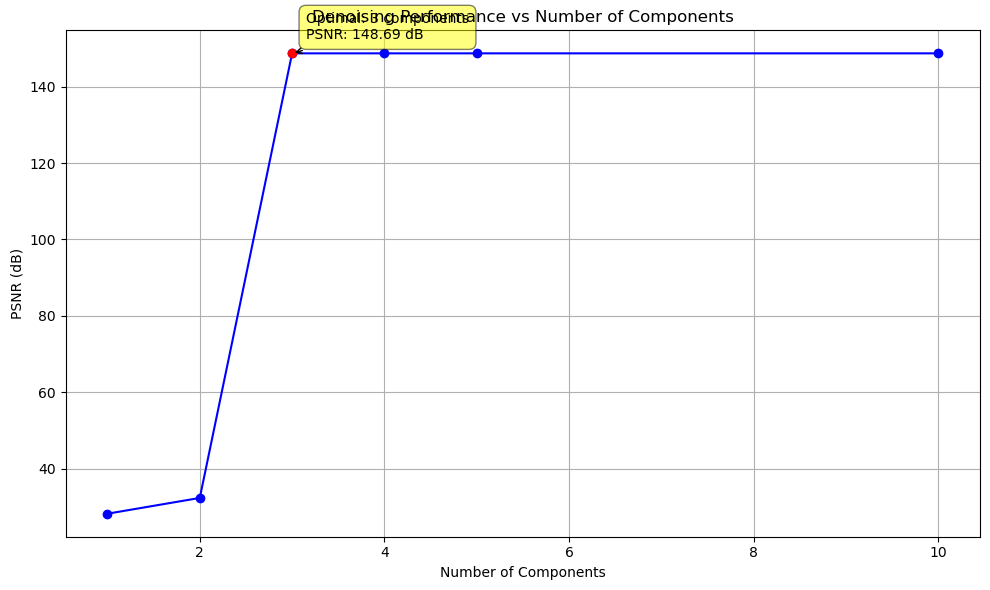


Analysis Summary:
Optimal number of components: 3
Best PSNR: 148.69 dB
PSNR improvement: 120.44 dB

Analyzing subject 93
Running component analysis...


 17%|█▋        | 1/6 [00:36<03:04, 36.87s/it]

Components: 1, PSNR: 28.223584024621996 dB, Sigma: None


 33%|███▎      | 2/6 [01:10<02:20, 35.04s/it]

Components: 2, PSNR: 32.252871841684716 dB, Sigma: None


 50%|█████     | 3/6 [01:44<01:44, 34.70s/it]

Components: 3, PSNR: 149.74181095603223 dB, Sigma: None


 67%|██████▋   | 4/6 [02:11<01:03, 31.58s/it]

Components: 4, PSNR: 149.74181095603223 dB, Sigma: None


 83%|████████▎ | 5/6 [02:35<00:28, 28.67s/it]

Components: 5, PSNR: 149.74181095603223 dB, Sigma: None


100%|██████████| 6/6 [02:59<00:00, 29.96s/it]


Components: 10, PSNR: 149.74181095603223 dB, Sigma: None


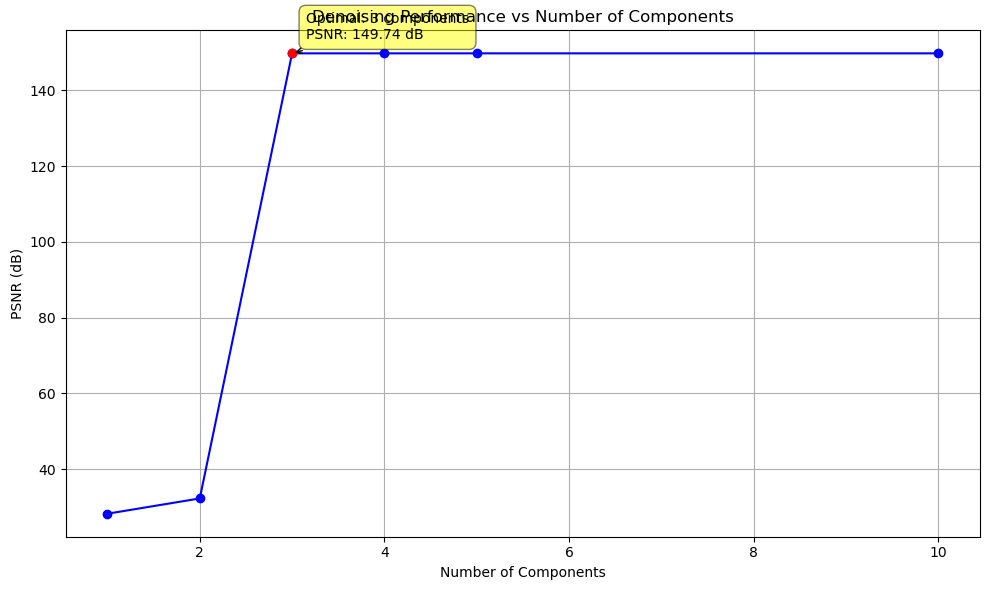


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.74 dB
PSNR improvement: 121.52 dB

Analyzing subject 90
Running component analysis...


 17%|█▋        | 1/6 [00:23<01:58, 23.63s/it]

Components: 1, PSNR: 27.827194348372952 dB, Sigma: None


 33%|███▎      | 2/6 [00:46<01:33, 23.45s/it]

Components: 2, PSNR: 30.827106518381314 dB, Sigma: None


 50%|█████     | 3/6 [01:11<01:11, 23.91s/it]

Components: 3, PSNR: 149.79185283861278 dB, Sigma: None


 67%|██████▋   | 4/6 [01:34<00:47, 23.77s/it]

Components: 4, PSNR: 149.79185283861278 dB, Sigma: None


 83%|████████▎ | 5/6 [01:58<00:23, 23.68s/it]

Components: 5, PSNR: 149.79185283861278 dB, Sigma: None


100%|██████████| 6/6 [02:22<00:00, 23.73s/it]


Components: 10, PSNR: 149.79185283861278 dB, Sigma: None


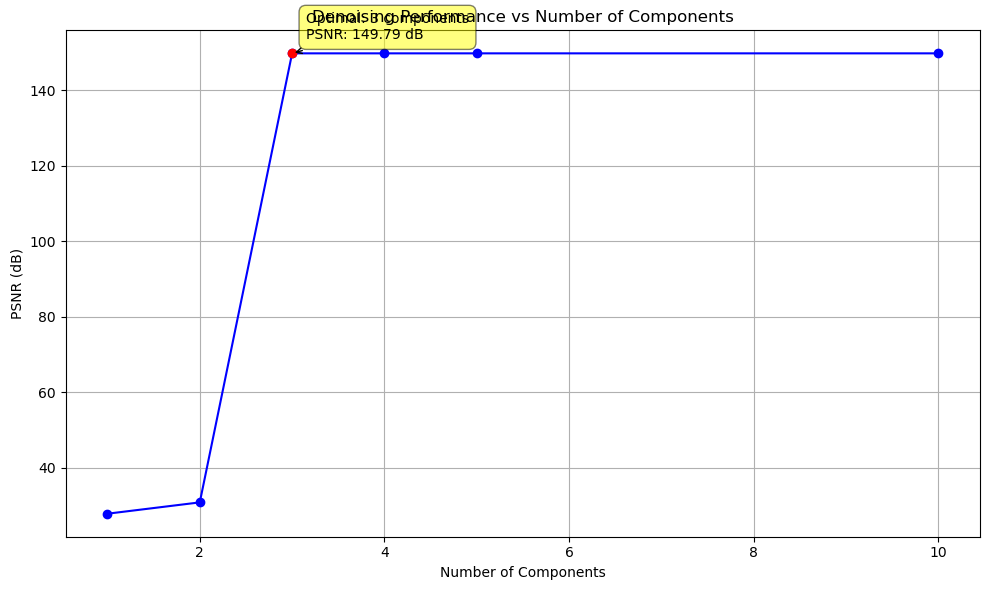


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.79 dB
PSNR improvement: 121.96 dB

Analyzing subject 71
Running component analysis...


 17%|█▋        | 1/6 [00:22<01:54, 22.97s/it]

Components: 1, PSNR: 30.58561728126936 dB, Sigma: None


 33%|███▎      | 2/6 [00:45<01:31, 22.80s/it]

Components: 2, PSNR: 35.1455335461456 dB, Sigma: None


 50%|█████     | 3/6 [01:08<01:08, 22.75s/it]

Components: 3, PSNR: 149.41747324023606 dB, Sigma: None


 67%|██████▋   | 4/6 [01:31<00:45, 22.72s/it]

Components: 4, PSNR: 149.41747324023606 dB, Sigma: None


 83%|████████▎ | 5/6 [01:53<00:22, 22.68s/it]

Components: 5, PSNR: 149.41747324023606 dB, Sigma: None


100%|██████████| 6/6 [02:16<00:00, 22.73s/it]


Components: 10, PSNR: 149.41747324023606 dB, Sigma: None


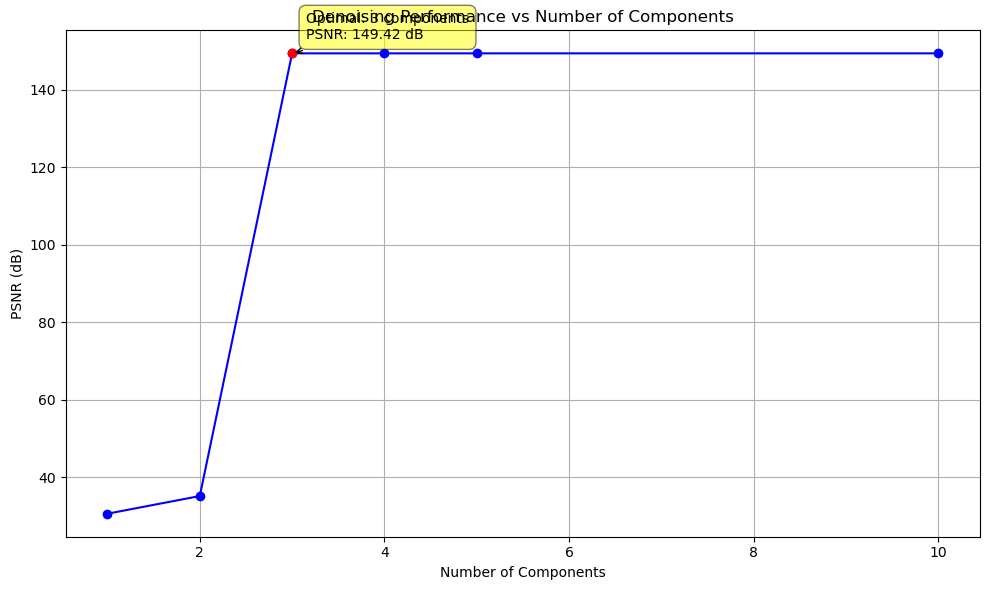


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.42 dB
PSNR improvement: 118.83 dB

Analyzing subject 99
Running component analysis...


 17%|█▋        | 1/6 [00:23<01:55, 23.11s/it]

Components: 1, PSNR: 29.905317943708347 dB, Sigma: None


 33%|███▎      | 2/6 [00:49<01:39, 24.86s/it]

Components: 2, PSNR: 35.233193006516785 dB, Sigma: None


 50%|█████     | 3/6 [01:16<01:17, 25.79s/it]

Components: 3, PSNR: 148.8365042738056 dB, Sigma: None


 67%|██████▋   | 4/6 [01:42<00:52, 26.07s/it]

Components: 4, PSNR: 148.8365042738056 dB, Sigma: None


 83%|████████▎ | 5/6 [02:09<00:26, 26.26s/it]

Components: 5, PSNR: 148.8365042738056 dB, Sigma: None


100%|██████████| 6/6 [02:34<00:00, 25.69s/it]


Components: 10, PSNR: 148.8365042738056 dB, Sigma: None


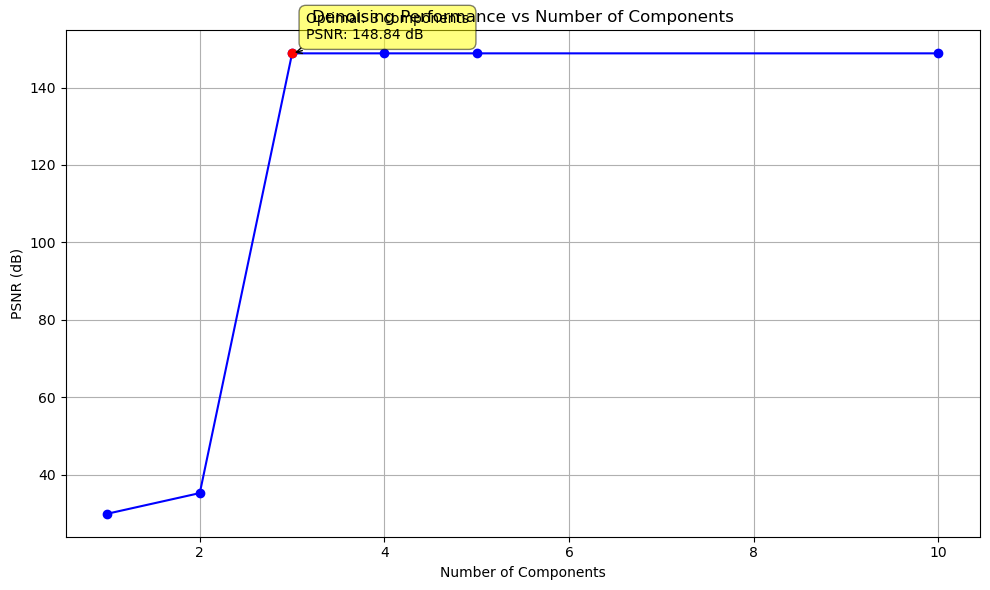


Analysis Summary:
Optimal number of components: 3
Best PSNR: 148.84 dB
PSNR improvement: 118.93 dB

Analyzing subject 78
Running component analysis...


 17%|█▋        | 1/6 [00:23<01:58, 23.64s/it]

Components: 1, PSNR: 30.900631810060485 dB, Sigma: None


 33%|███▎      | 2/6 [00:46<01:33, 23.47s/it]

Components: 2, PSNR: 35.23634819167175 dB, Sigma: None


 50%|█████     | 3/6 [01:10<01:10, 23.57s/it]

Components: 3, PSNR: 148.7463418616383 dB, Sigma: None


 67%|██████▋   | 4/6 [01:34<00:47, 23.62s/it]

Components: 4, PSNR: 148.7463418616383 dB, Sigma: None


 83%|████████▎ | 5/6 [01:58<00:23, 23.76s/it]

Components: 5, PSNR: 148.7463418616383 dB, Sigma: None


100%|██████████| 6/6 [02:21<00:00, 23.66s/it]


Components: 10, PSNR: 148.7463418616383 dB, Sigma: None


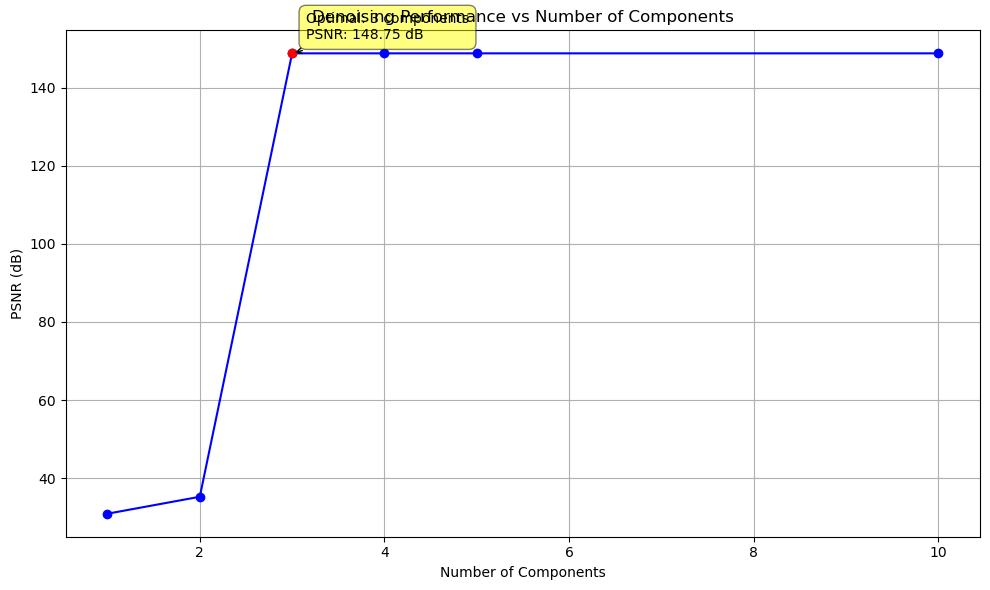


Analysis Summary:
Optimal number of components: 3
Best PSNR: 148.75 dB
PSNR improvement: 117.85 dB

Analyzing subject 85
Running component analysis...


 17%|█▋        | 1/6 [00:23<01:58, 23.71s/it]

Components: 1, PSNR: 27.21129300440355 dB, Sigma: None


 33%|███▎      | 2/6 [00:47<01:35, 23.87s/it]

Components: 2, PSNR: 30.671810107438404 dB, Sigma: None


 50%|█████     | 3/6 [01:11<01:12, 24.04s/it]

Components: 3, PSNR: 149.47776485718356 dB, Sigma: None


 67%|██████▋   | 4/6 [01:35<00:48, 24.02s/it]

Components: 4, PSNR: 149.47776485718356 dB, Sigma: None


 83%|████████▎ | 5/6 [02:00<00:24, 24.12s/it]

Components: 5, PSNR: 149.47776485718356 dB, Sigma: None


100%|██████████| 6/6 [02:24<00:00, 24.06s/it]


Components: 10, PSNR: 149.47776485718356 dB, Sigma: None


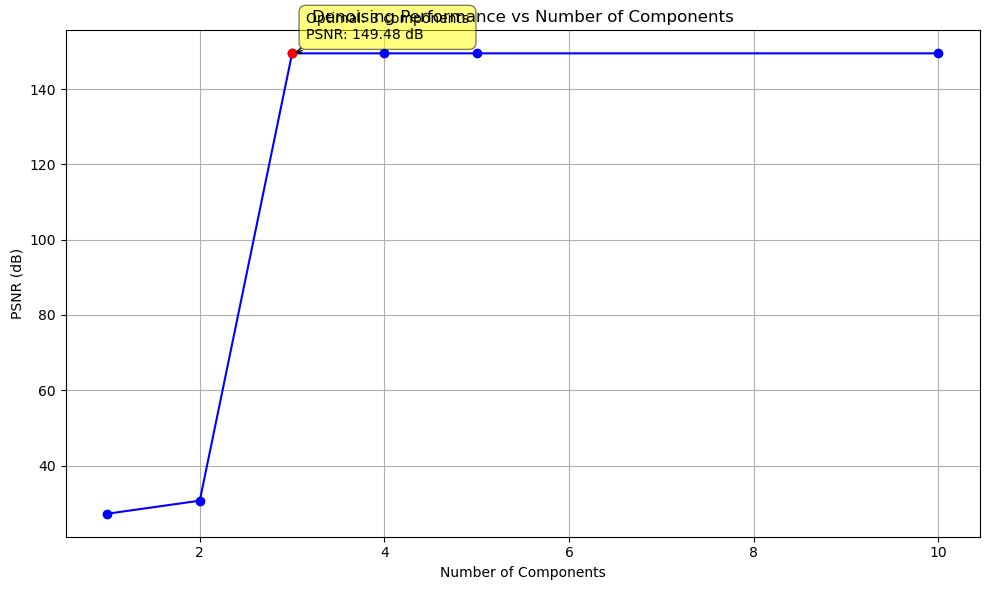


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.48 dB
PSNR improvement: 122.27 dB

Analyzing subject 80
Running component analysis...


 17%|█▋        | 1/6 [00:24<02:00, 24.07s/it]

Components: 1, PSNR: 31.889139443067243 dB, Sigma: None


 33%|███▎      | 2/6 [00:48<01:36, 24.19s/it]

Components: 2, PSNR: 38.93423274602145 dB, Sigma: None


 50%|█████     | 3/6 [01:12<01:12, 24.31s/it]

Components: 3, PSNR: 149.85405823206293 dB, Sigma: None


 67%|██████▋   | 4/6 [01:36<00:48, 24.14s/it]

Components: 4, PSNR: 149.85405823206293 dB, Sigma: None


 83%|████████▎ | 5/6 [02:00<00:23, 23.93s/it]

Components: 5, PSNR: 149.85405823206293 dB, Sigma: None


100%|██████████| 6/6 [02:24<00:00, 24.07s/it]


Components: 10, PSNR: 149.85405823206293 dB, Sigma: None


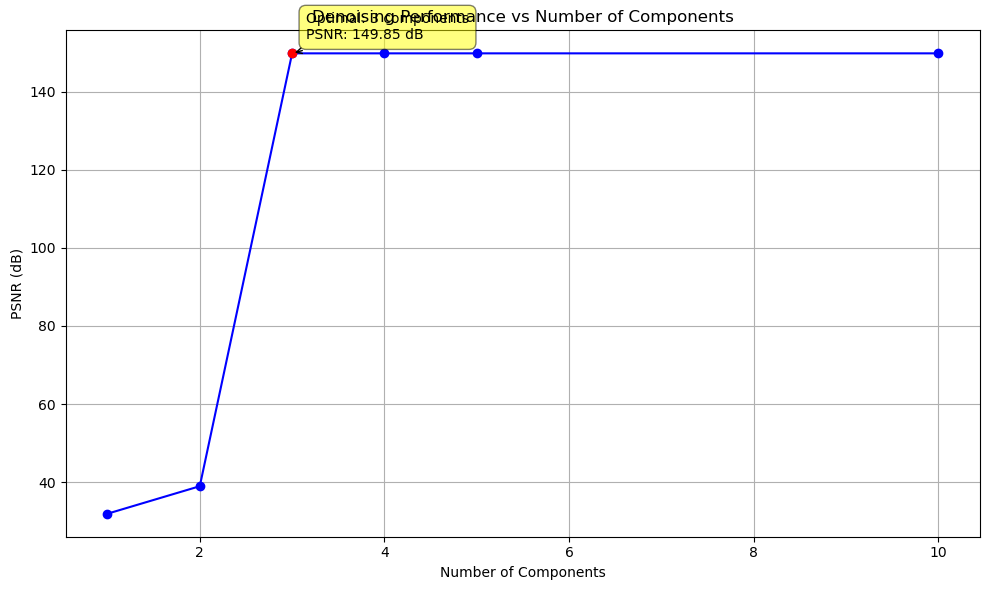


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.85 dB
PSNR improvement: 117.96 dB

Analyzing subject 95
Running component analysis...


 17%|█▋        | 1/6 [00:24<02:00, 24.07s/it]

Components: 1, PSNR: 28.009823307335367 dB, Sigma: None


 33%|███▎      | 2/6 [00:49<01:39, 24.90s/it]

Components: 2, PSNR: 32.65714218101047 dB, Sigma: None


 50%|█████     | 3/6 [01:17<01:18, 26.23s/it]

Components: 3, PSNR: 149.37017212380778 dB, Sigma: None


 67%|██████▋   | 4/6 [01:44<00:53, 26.71s/it]

Components: 4, PSNR: 149.37017212380778 dB, Sigma: None


 83%|████████▎ | 5/6 [02:13<00:27, 27.30s/it]

Components: 5, PSNR: 149.37017212380778 dB, Sigma: None


100%|██████████| 6/6 [02:39<00:00, 26.58s/it]


Components: 10, PSNR: 149.37017212380778 dB, Sigma: None


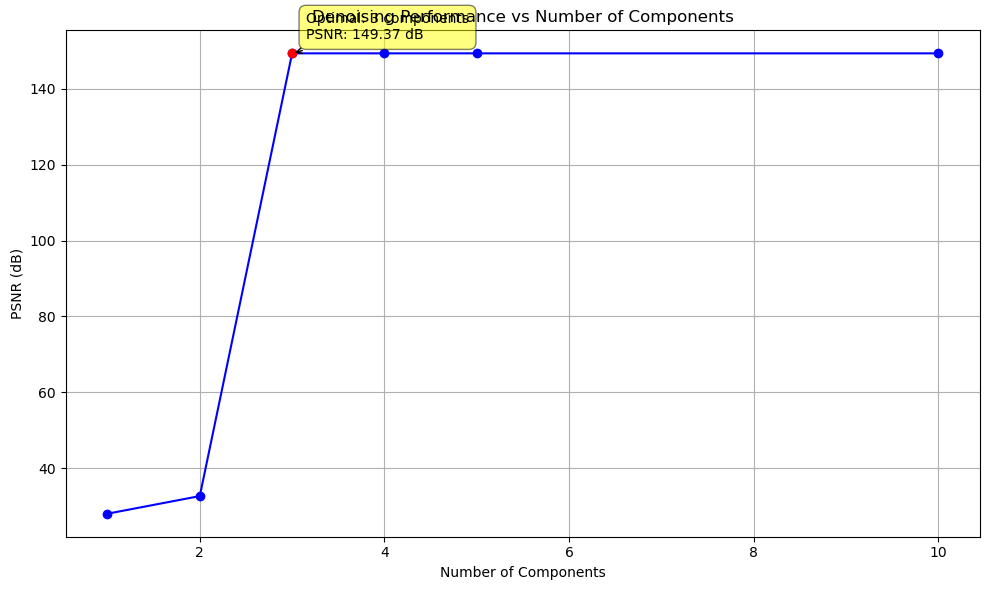


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.37 dB
PSNR improvement: 121.36 dB

Analyzing subject 52
Running component analysis...


 17%|█▋        | 1/6 [00:26<02:10, 26.01s/it]

Components: 1, PSNR: 29.897907912979555 dB, Sigma: None


 33%|███▎      | 2/6 [00:51<01:42, 25.60s/it]

Components: 2, PSNR: 34.52519014275237 dB, Sigma: None


 50%|█████     | 3/6 [01:17<01:17, 25.87s/it]

Components: 3, PSNR: 39.12097548251867 dB, Sigma: None


 67%|██████▋   | 4/6 [01:43<00:51, 25.72s/it]

Components: 4, PSNR: 146.63646726742465 dB, Sigma: None


 83%|████████▎ | 5/6 [02:09<00:25, 25.89s/it]

Components: 5, PSNR: 146.63646726742465 dB, Sigma: None


100%|██████████| 6/6 [02:35<00:00, 25.95s/it]


Components: 10, PSNR: 146.63646726742465 dB, Sigma: None


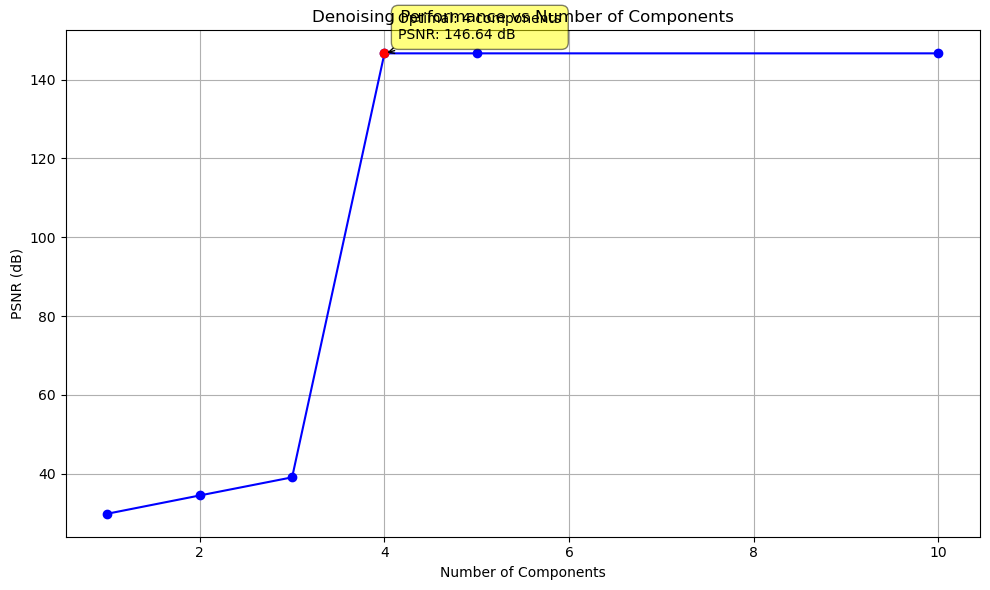


Analysis Summary:
Optimal number of components: 4
Best PSNR: 146.64 dB
PSNR improvement: 116.74 dB

Analyzing subject 74
Running component analysis...


 17%|█▋        | 1/6 [00:23<01:58, 23.64s/it]

Components: 1, PSNR: 28.833983541693733 dB, Sigma: None


 33%|███▎      | 2/6 [00:48<01:36, 24.12s/it]

Components: 2, PSNR: 33.990953281223355 dB, Sigma: None


 50%|█████     | 3/6 [01:12<01:12, 24.11s/it]

Components: 3, PSNR: 149.25667977966708 dB, Sigma: None


 67%|██████▋   | 4/6 [01:36<00:47, 24.00s/it]

Components: 4, PSNR: 149.25667977966708 dB, Sigma: None


 83%|████████▎ | 5/6 [02:00<00:24, 24.05s/it]

Components: 5, PSNR: 149.25667977966708 dB, Sigma: None


100%|██████████| 6/6 [02:23<00:00, 23.96s/it]


Components: 10, PSNR: 149.25667977966708 dB, Sigma: None


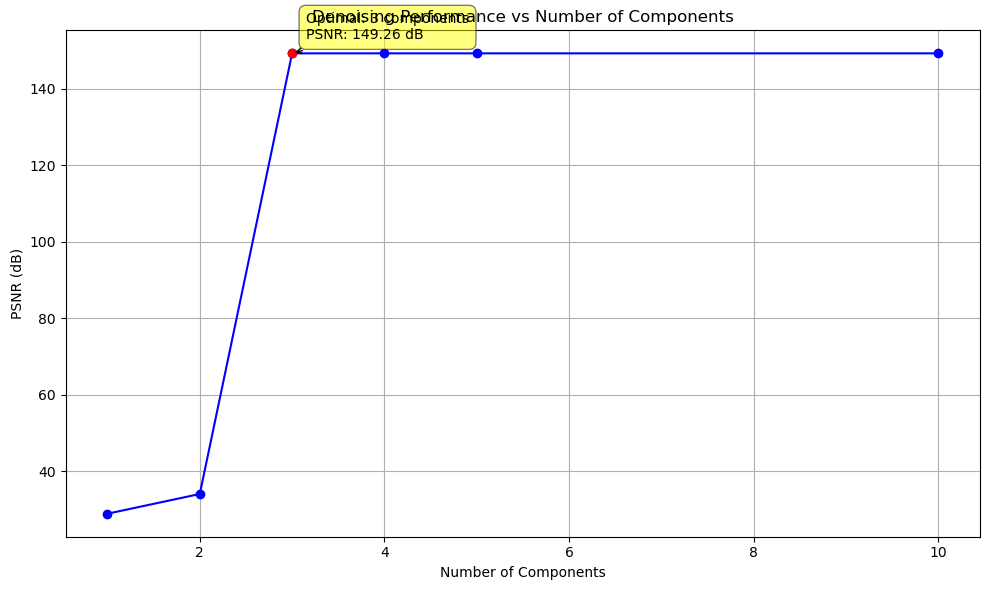


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.26 dB
PSNR improvement: 120.42 dB

Analyzing subject 89
Running component analysis...


 17%|█▋        | 1/6 [00:23<01:59, 23.91s/it]

Components: 1, PSNR: 29.589551593401133 dB, Sigma: None


 33%|███▎      | 2/6 [00:47<01:35, 23.89s/it]

Components: 2, PSNR: 35.11452839997274 dB, Sigma: None


 50%|█████     | 3/6 [01:11<01:11, 23.95s/it]

Components: 3, PSNR: 149.34405460499744 dB, Sigma: None


 67%|██████▋   | 4/6 [01:35<00:47, 23.75s/it]

Components: 4, PSNR: 149.34405460499744 dB, Sigma: None


 83%|████████▎ | 5/6 [02:00<00:24, 24.14s/it]

Components: 5, PSNR: 149.34405460499744 dB, Sigma: None


100%|██████████| 6/6 [02:25<00:00, 24.26s/it]


Components: 10, PSNR: 149.34405460499744 dB, Sigma: None


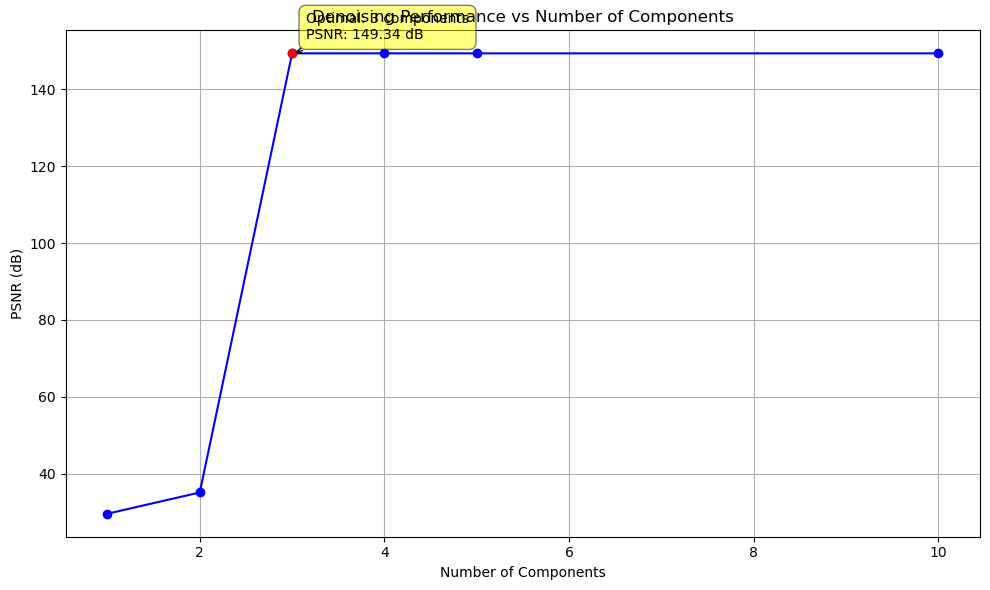


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.34 dB
PSNR improvement: 119.75 dB

Analyzing subject 92
Running component analysis...


 17%|█▋        | 1/6 [00:33<02:49, 33.94s/it]

Components: 1, PSNR: 27.487263130032417 dB, Sigma: None


 33%|███▎      | 2/6 [01:02<02:03, 30.97s/it]

Components: 2, PSNR: 31.912387909364476 dB, Sigma: None


 50%|█████     | 3/6 [01:30<01:28, 29.57s/it]

Components: 3, PSNR: 149.66638161153722 dB, Sigma: None


 67%|██████▋   | 4/6 [01:57<00:57, 28.59s/it]

Components: 4, PSNR: 149.66638161153722 dB, Sigma: None


 83%|████████▎ | 5/6 [02:24<00:27, 27.98s/it]

Components: 5, PSNR: 149.66638161153722 dB, Sigma: None


100%|██████████| 6/6 [02:49<00:00, 28.29s/it]


Components: 10, PSNR: 149.66638161153722 dB, Sigma: None


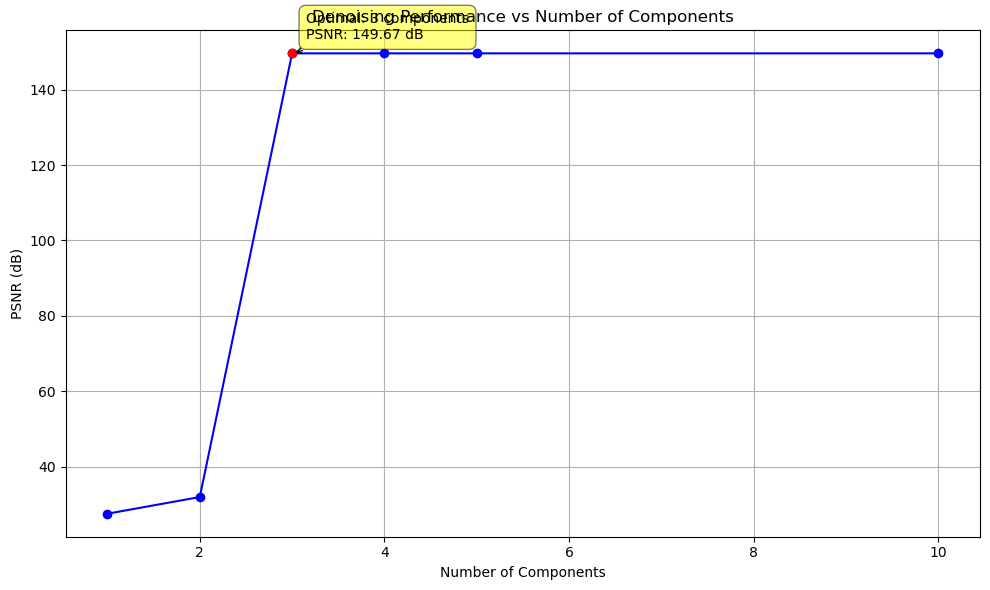


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.67 dB
PSNR improvement: 122.18 dB

Analyzing subject 73
Running component analysis...


 17%|█▋        | 1/6 [00:23<01:59, 23.98s/it]

Components: 1, PSNR: 28.37461807794907 dB, Sigma: None


 33%|███▎      | 2/6 [00:47<01:35, 23.98s/it]

Components: 2, PSNR: 32.7259383767623 dB, Sigma: None


 50%|█████     | 3/6 [01:16<01:18, 26.07s/it]

Components: 3, PSNR: 149.04255289903193 dB, Sigma: None


 67%|██████▋   | 4/6 [01:44<00:53, 26.94s/it]

Components: 4, PSNR: 149.04255289903193 dB, Sigma: None


 83%|████████▎ | 5/6 [02:07<00:25, 25.40s/it]

Components: 5, PSNR: 149.04255289903193 dB, Sigma: None


100%|██████████| 6/6 [02:31<00:00, 25.33s/it]


Components: 10, PSNR: 149.04255289903193 dB, Sigma: None


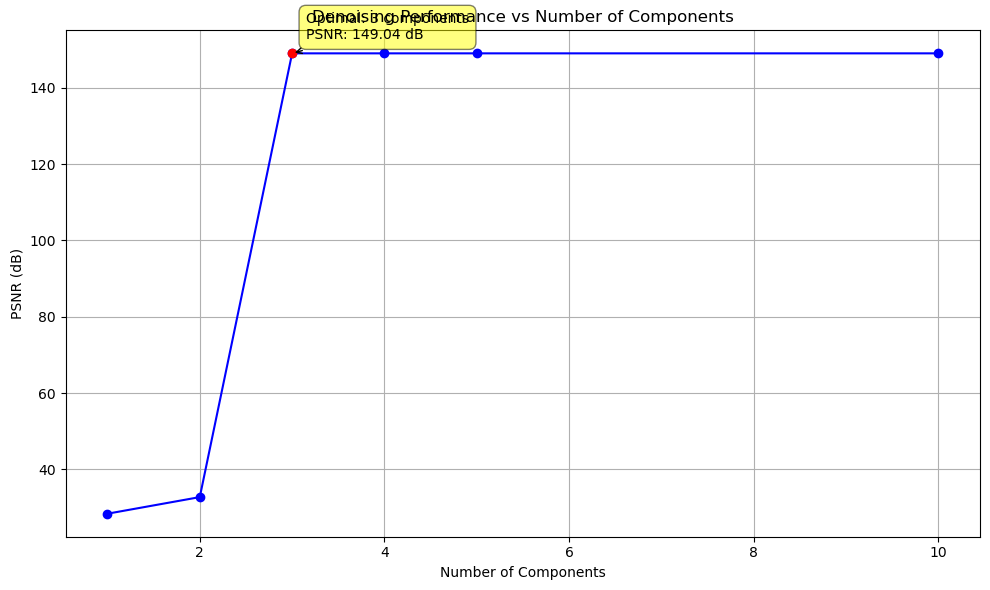


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.04 dB
PSNR improvement: 120.67 dB

Analyzing subject 51
Running component analysis...


 17%|█▋        | 1/6 [00:26<02:12, 26.47s/it]

Components: 1, PSNR: 26.822974149451014 dB, Sigma: None


 33%|███▎      | 2/6 [00:52<01:44, 26.00s/it]

Components: 2, PSNR: 29.757815143847036 dB, Sigma: None


 50%|█████     | 3/6 [01:18<01:18, 26.15s/it]

Components: 3, PSNR: 33.57170185231289 dB, Sigma: None


 67%|██████▋   | 4/6 [01:46<00:54, 27.03s/it]

Components: 4, PSNR: 146.09994803293176 dB, Sigma: None


 83%|████████▎ | 5/6 [02:15<00:27, 27.67s/it]

Components: 5, PSNR: 146.09994803293176 dB, Sigma: None


100%|██████████| 6/6 [02:46<00:00, 27.82s/it]


Components: 10, PSNR: 146.09994803293176 dB, Sigma: None


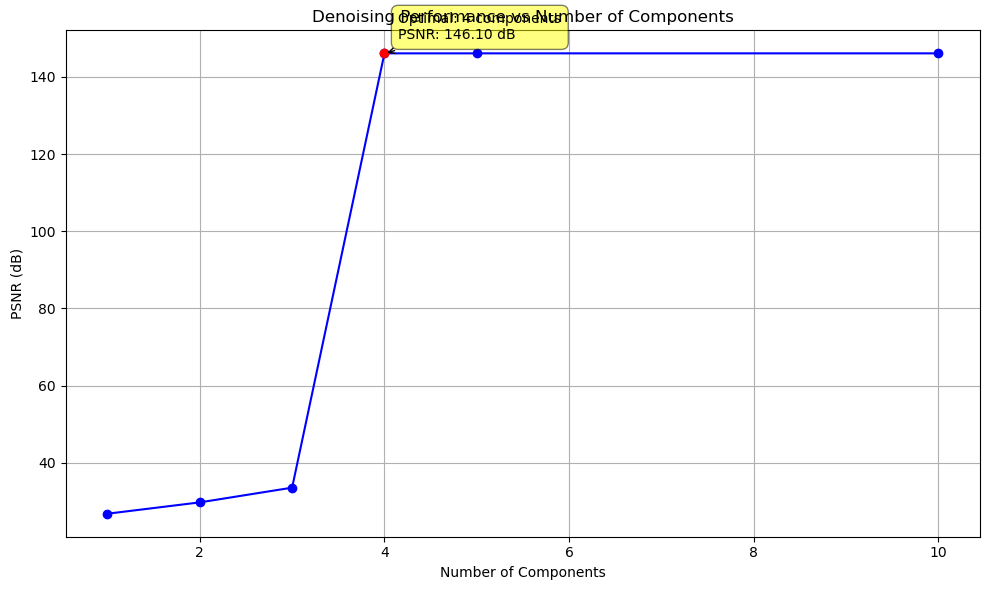


Analysis Summary:
Optimal number of components: 4
Best PSNR: 146.10 dB
PSNR improvement: 119.28 dB

Analyzing subject 87
Running component analysis...


 17%|█▋        | 1/6 [00:28<02:22, 28.58s/it]

Components: 1, PSNR: 28.385791629539234 dB, Sigma: None


 33%|███▎      | 2/6 [00:52<01:42, 25.63s/it]

Components: 2, PSNR: 33.1893680974499 dB, Sigma: None


 50%|█████     | 3/6 [01:15<01:13, 24.61s/it]

Components: 3, PSNR: 149.87594214812003 dB, Sigma: None


 67%|██████▋   | 4/6 [01:38<00:47, 23.89s/it]

Components: 4, PSNR: 149.87594214812003 dB, Sigma: None


 83%|████████▎ | 5/6 [02:02<00:23, 23.89s/it]

Components: 5, PSNR: 149.87594214812003 dB, Sigma: None


100%|██████████| 6/6 [02:29<00:00, 24.88s/it]


Components: 10, PSNR: 149.87594214812003 dB, Sigma: None


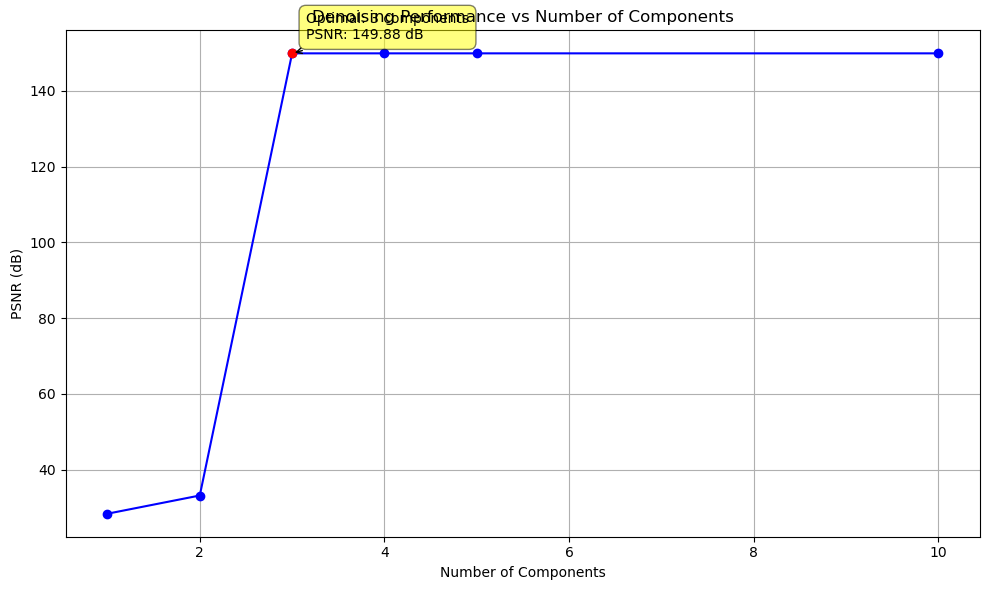


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.88 dB
PSNR improvement: 121.49 dB

Analyzing subject 82
Running component analysis...


 17%|█▋        | 1/6 [00:26<02:13, 26.70s/it]

Components: 1, PSNR: 28.26499868855358 dB, Sigma: None


 33%|███▎      | 2/6 [00:52<01:44, 26.15s/it]

Components: 2, PSNR: 32.47364788763605 dB, Sigma: None


 50%|█████     | 3/6 [01:18<01:18, 26.06s/it]

Components: 3, PSNR: 149.18641929359492 dB, Sigma: None


 67%|██████▋   | 4/6 [01:45<00:52, 26.31s/it]

Components: 4, PSNR: 149.18641929359492 dB, Sigma: None


 83%|████████▎ | 5/6 [02:08<00:25, 25.43s/it]

Components: 5, PSNR: 149.18641929359492 dB, Sigma: None


100%|██████████| 6/6 [02:32<00:00, 25.35s/it]


Components: 10, PSNR: 149.18641929359492 dB, Sigma: None


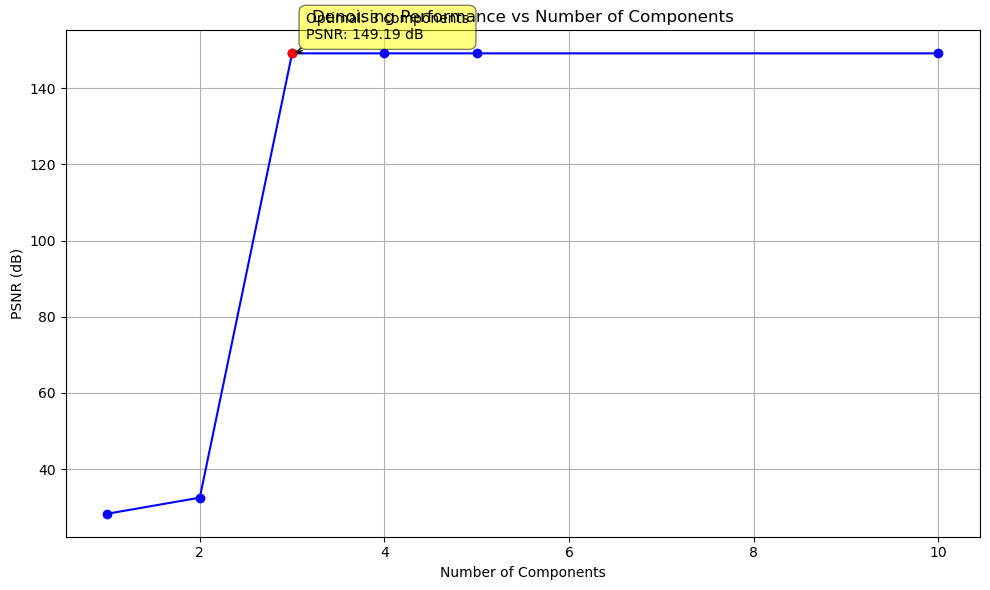


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.19 dB
PSNR improvement: 120.92 dB

Analyzing subject 50
Running component analysis...


 17%|█▋        | 1/6 [00:25<02:07, 25.56s/it]

Components: 1, PSNR: 30.090541840878032 dB, Sigma: None


 33%|███▎      | 2/6 [00:51<01:42, 25.60s/it]

Components: 2, PSNR: 32.383024327251334 dB, Sigma: None


 50%|█████     | 3/6 [01:16<01:16, 25.61s/it]

Components: 3, PSNR: 36.02727727113887 dB, Sigma: None


 67%|██████▋   | 4/6 [01:42<00:51, 25.54s/it]

Components: 4, PSNR: 146.99918175070042 dB, Sigma: None


 83%|████████▎ | 5/6 [02:08<00:25, 25.66s/it]

Components: 5, PSNR: 146.99918175070042 dB, Sigma: None


100%|██████████| 6/6 [02:33<00:00, 25.64s/it]


Components: 10, PSNR: 146.99918175070042 dB, Sigma: None


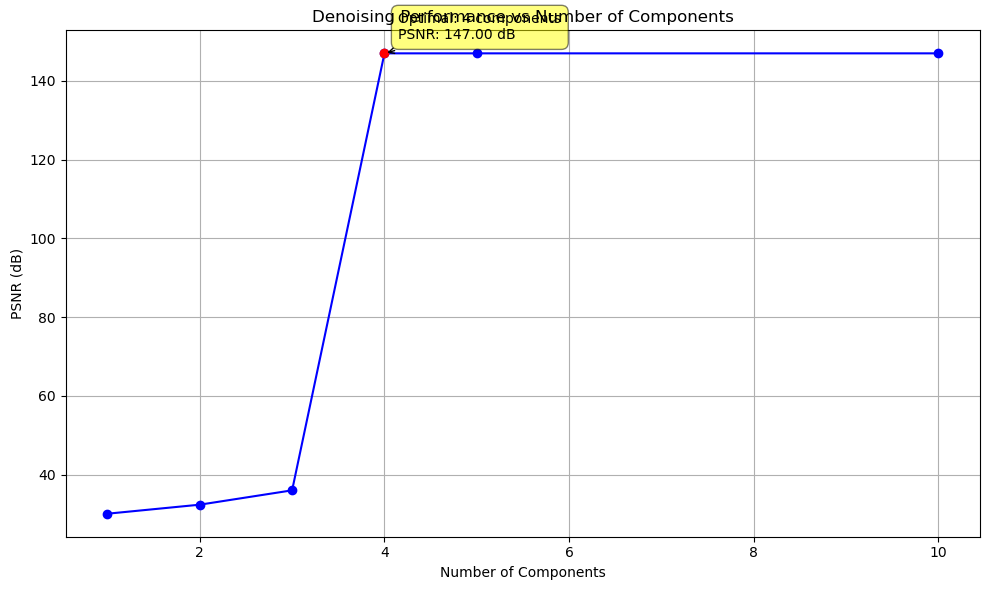


Analysis Summary:
Optimal number of components: 4
Best PSNR: 147.00 dB
PSNR improvement: 116.91 dB

Analyzing subject 97
Running component analysis...


 17%|█▋        | 1/6 [00:23<01:56, 23.26s/it]

Components: 1, PSNR: 28.020286869534083 dB, Sigma: None


 33%|███▎      | 2/6 [00:46<01:32, 23.02s/it]

Components: 2, PSNR: 32.35079845294272 dB, Sigma: None


 50%|█████     | 3/6 [01:09<01:09, 23.05s/it]

Components: 3, PSNR: 148.78543345368303 dB, Sigma: None


 67%|██████▋   | 4/6 [01:32<00:46, 23.12s/it]

Components: 4, PSNR: 148.78543345368303 dB, Sigma: None


 83%|████████▎ | 5/6 [01:55<00:23, 23.15s/it]

Components: 5, PSNR: 148.78543345368303 dB, Sigma: None


100%|██████████| 6/6 [02:19<00:00, 23.24s/it]


Components: 10, PSNR: 148.78543345368303 dB, Sigma: None


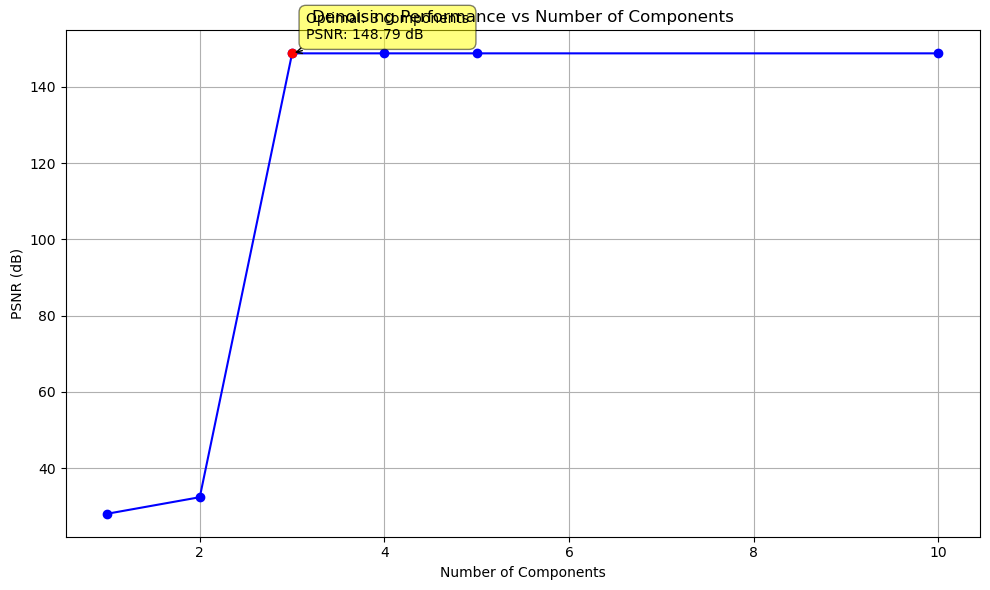


Analysis Summary:
Optimal number of components: 3
Best PSNR: 148.79 dB
PSNR improvement: 120.77 dB

Analyzing subject 76
Running component analysis...


 17%|█▋        | 1/6 [00:27<02:16, 27.30s/it]

Components: 1, PSNR: 30.185679300350806 dB, Sigma: None


 33%|███▎      | 2/6 [00:52<01:43, 25.95s/it]

Components: 2, PSNR: 34.66375890154956 dB, Sigma: None


 50%|█████     | 3/6 [01:16<01:15, 25.11s/it]

Components: 3, PSNR: 149.88811265733085 dB, Sigma: None


 67%|██████▋   | 4/6 [01:42<00:51, 25.52s/it]

Components: 4, PSNR: 149.88811265733085 dB, Sigma: None


 83%|████████▎ | 5/6 [02:11<00:26, 26.58s/it]

Components: 5, PSNR: 149.88811265733085 dB, Sigma: None


100%|██████████| 6/6 [02:38<00:00, 26.44s/it]


Components: 10, PSNR: 149.88811265733085 dB, Sigma: None


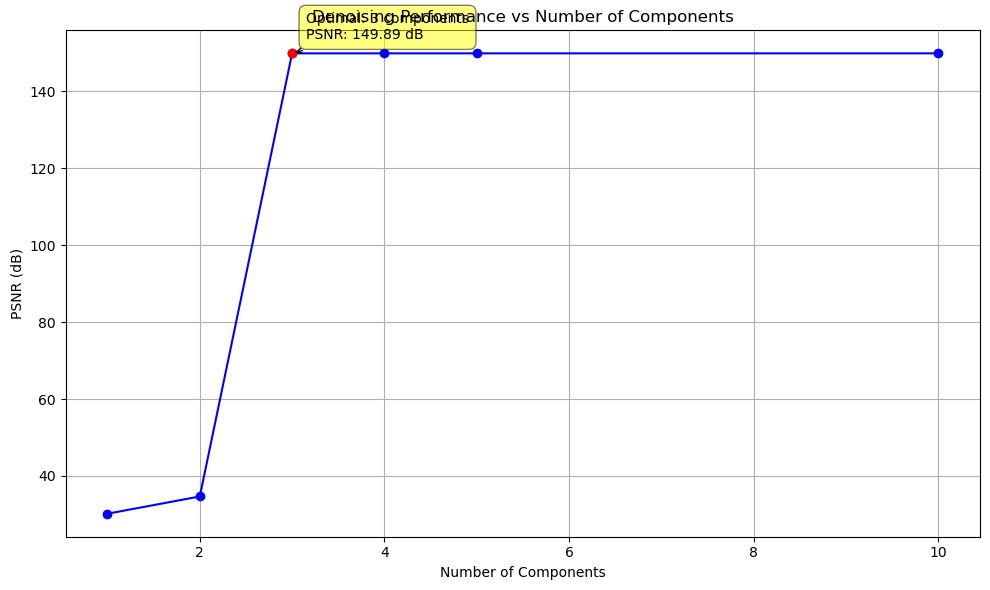


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.89 dB
PSNR improvement: 119.70 dB

Analyzing subject 88
Running component analysis...


 17%|█▋        | 1/6 [00:27<02:18, 27.67s/it]

Components: 1, PSNR: 27.245135950819005 dB, Sigma: None


 33%|███▎      | 2/6 [00:58<01:57, 29.28s/it]

Components: 2, PSNR: 32.17166380054971 dB, Sigma: None


 50%|█████     | 3/6 [01:26<01:26, 28.96s/it]

Components: 3, PSNR: 148.8742453198347 dB, Sigma: None


 67%|██████▋   | 4/6 [01:52<00:55, 27.54s/it]

Components: 4, PSNR: 148.8742453198347 dB, Sigma: None


 83%|████████▎ | 5/6 [02:16<00:26, 26.40s/it]

Components: 5, PSNR: 148.8742453198347 dB, Sigma: None


100%|██████████| 6/6 [02:40<00:00, 26.77s/it]


Components: 10, PSNR: 148.8742453198347 dB, Sigma: None


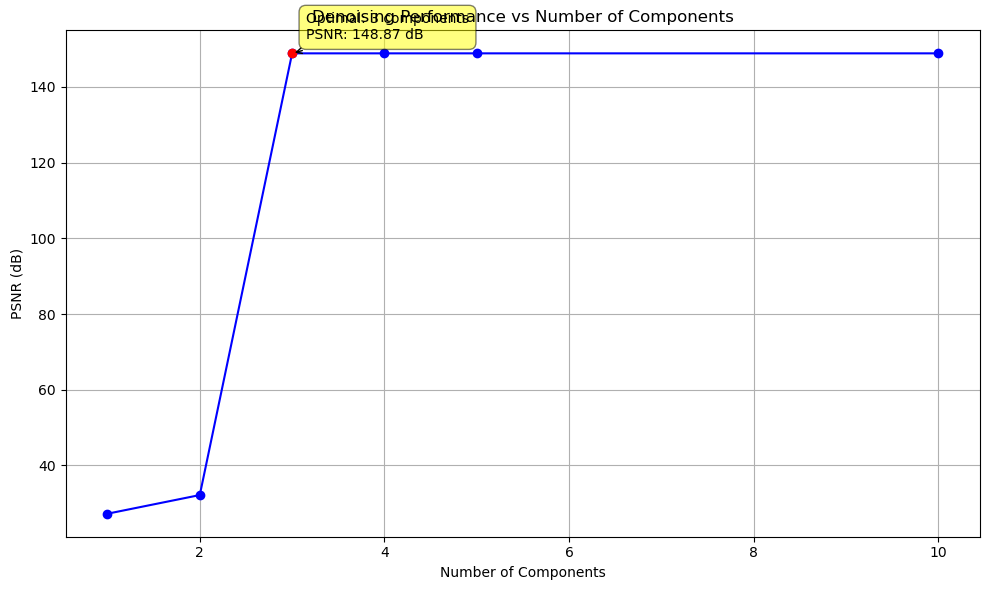


Analysis Summary:
Optimal number of components: 3
Best PSNR: 148.87 dB
PSNR improvement: 121.63 dB

Analyzing subject 75
Running component analysis...


 17%|█▋        | 1/6 [00:23<01:56, 23.35s/it]

Components: 1, PSNR: 30.339924788630693 dB, Sigma: None


 33%|███▎      | 2/6 [00:47<01:34, 23.70s/it]

Components: 2, PSNR: 34.575705660799684 dB, Sigma: None


 50%|█████     | 3/6 [01:11<01:11, 23.97s/it]

Components: 3, PSNR: 149.19798279907695 dB, Sigma: None


 67%|██████▋   | 4/6 [01:35<00:47, 23.88s/it]

Components: 4, PSNR: 149.19798279907695 dB, Sigma: None


 83%|████████▎ | 5/6 [01:59<00:24, 24.03s/it]

Components: 5, PSNR: 149.19798279907695 dB, Sigma: None


100%|██████████| 6/6 [02:24<00:00, 24.07s/it]


Components: 10, PSNR: 149.19798279907695 dB, Sigma: None


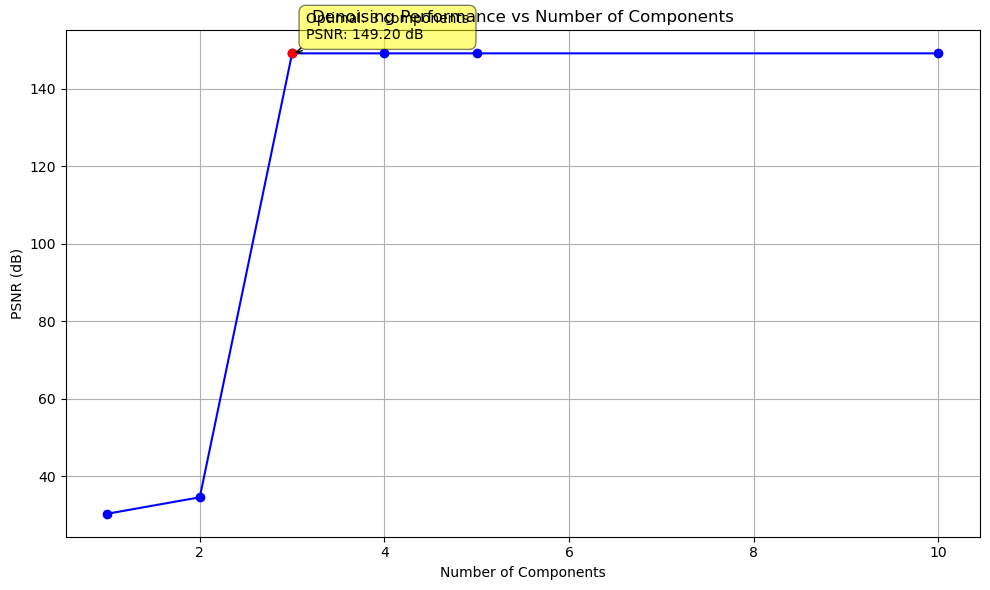


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.20 dB
PSNR improvement: 118.86 dB

Analyzing subject 94
Running component analysis...


 17%|█▋        | 1/6 [00:24<02:00, 24.12s/it]

Components: 1, PSNR: 29.349125832505976 dB, Sigma: None


 33%|███▎      | 2/6 [00:49<01:38, 24.60s/it]

Components: 2, PSNR: 35.19543502872855 dB, Sigma: None


 50%|█████     | 3/6 [01:13<01:13, 24.63s/it]

Components: 3, PSNR: 148.9471126609725 dB, Sigma: None


 67%|██████▋   | 4/6 [01:37<00:48, 24.28s/it]

Components: 4, PSNR: 148.9471126609725 dB, Sigma: None


 83%|████████▎ | 5/6 [02:02<00:24, 24.60s/it]

Components: 5, PSNR: 148.9471126609725 dB, Sigma: None


100%|██████████| 6/6 [02:27<00:00, 24.56s/it]


Components: 10, PSNR: 148.9471126609725 dB, Sigma: None


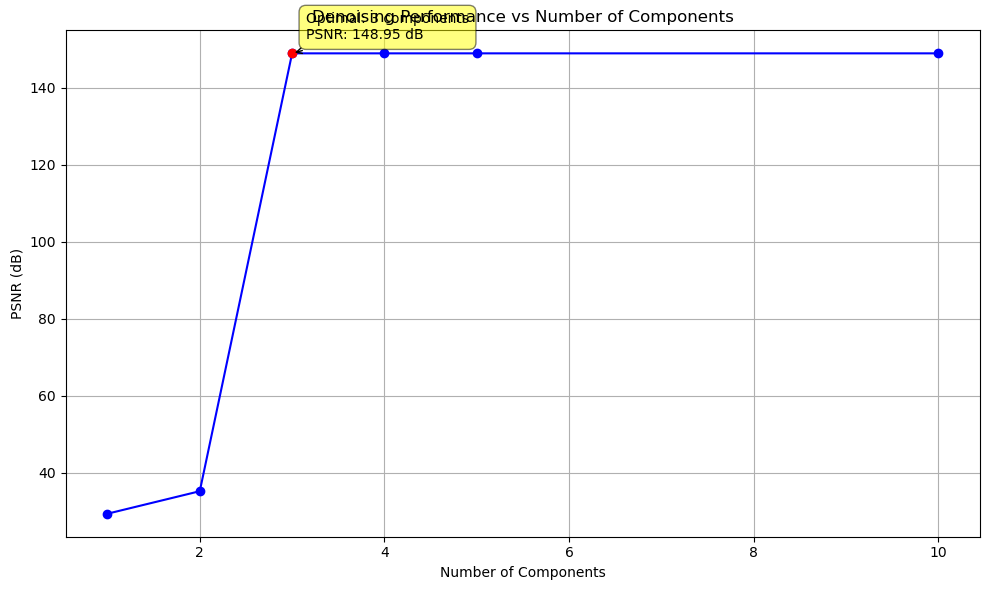


Analysis Summary:
Optimal number of components: 3
Best PSNR: 148.95 dB
PSNR improvement: 119.60 dB

Analyzing subject 81
Running component analysis...


 17%|█▋        | 1/6 [00:23<01:57, 23.46s/it]

Components: 1, PSNR: 29.27769828124316 dB, Sigma: None


 33%|███▎      | 2/6 [00:49<01:40, 25.25s/it]

Components: 2, PSNR: 34.48636989201522 dB, Sigma: None


 50%|█████     | 3/6 [01:13<01:13, 24.58s/it]

Components: 3, PSNR: 150.05600059886925 dB, Sigma: None


 67%|██████▋   | 4/6 [01:37<00:48, 24.19s/it]

Components: 4, PSNR: 150.05600059886925 dB, Sigma: None


 83%|████████▎ | 5/6 [02:03<00:24, 24.75s/it]

Components: 5, PSNR: 150.05600059886925 dB, Sigma: None


100%|██████████| 6/6 [02:30<00:00, 25.13s/it]


Components: 10, PSNR: 150.05600059886925 dB, Sigma: None


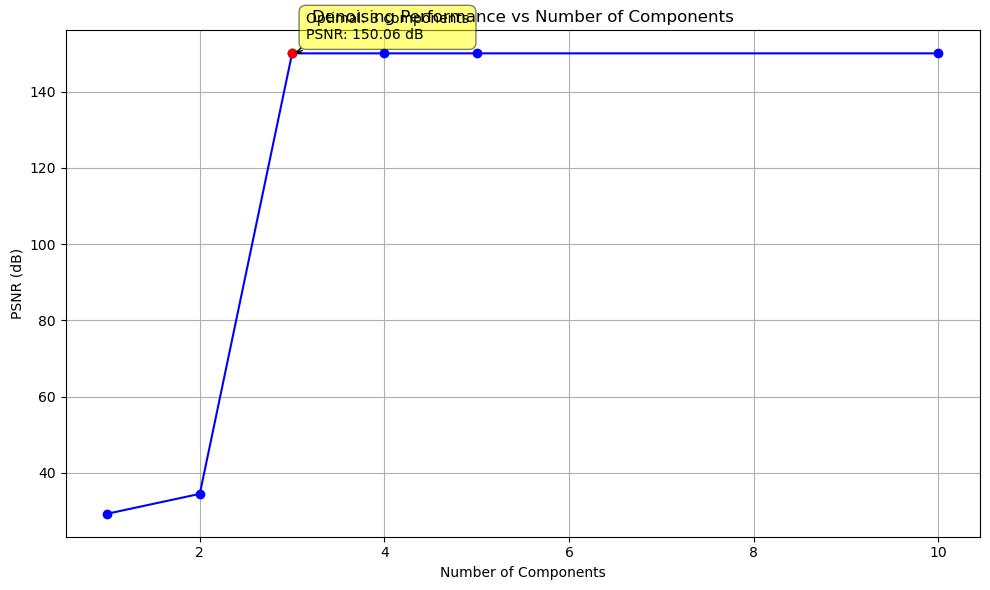


Analysis Summary:
Optimal number of components: 3
Best PSNR: 150.06 dB
PSNR improvement: 120.78 dB

Analyzing subject 84
Running component analysis...


 17%|█▋        | 1/6 [00:34<02:51, 34.36s/it]

Components: 1, PSNR: 31.248265980550016 dB, Sigma: None


 33%|███▎      | 2/6 [01:04<02:08, 32.04s/it]

Components: 2, PSNR: 36.73530862838595 dB, Sigma: None


 50%|█████     | 3/6 [01:33<01:31, 30.49s/it]

Components: 3, PSNR: 148.92384490160944 dB, Sigma: None


 67%|██████▋   | 4/6 [02:00<00:58, 29.10s/it]

Components: 4, PSNR: 148.92384490160944 dB, Sigma: None


 83%|████████▎ | 5/6 [02:24<00:27, 27.27s/it]

Components: 5, PSNR: 148.92384490160944 dB, Sigma: None


100%|██████████| 6/6 [02:49<00:00, 28.17s/it]


Components: 10, PSNR: 148.92384490160944 dB, Sigma: None


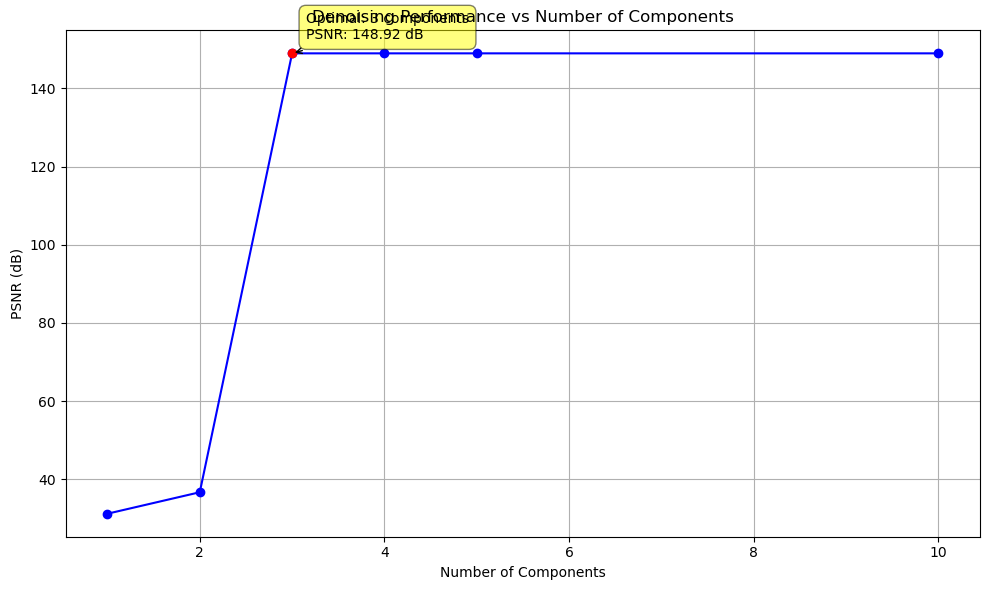


Analysis Summary:
Optimal number of components: 3
Best PSNR: 148.92 dB
PSNR improvement: 117.68 dB

Analyzing subject 79
Running component analysis...


 17%|█▋        | 1/6 [00:24<02:03, 24.72s/it]

Components: 1, PSNR: 26.95505516555493 dB, Sigma: None


 33%|███▎      | 2/6 [00:48<01:35, 23.88s/it]

Components: 2, PSNR: 31.014849808729732 dB, Sigma: None


 50%|█████     | 3/6 [01:12<01:12, 24.06s/it]

Components: 3, PSNR: 149.2013126302669 dB, Sigma: None


 67%|██████▋   | 4/6 [01:35<00:47, 23.91s/it]

Components: 4, PSNR: 149.2013126302669 dB, Sigma: None


 83%|████████▎ | 5/6 [01:57<00:22, 22.93s/it]

Components: 5, PSNR: 149.2013126302669 dB, Sigma: None


100%|██████████| 6/6 [02:18<00:00, 23.01s/it]


Components: 10, PSNR: 149.2013126302669 dB, Sigma: None


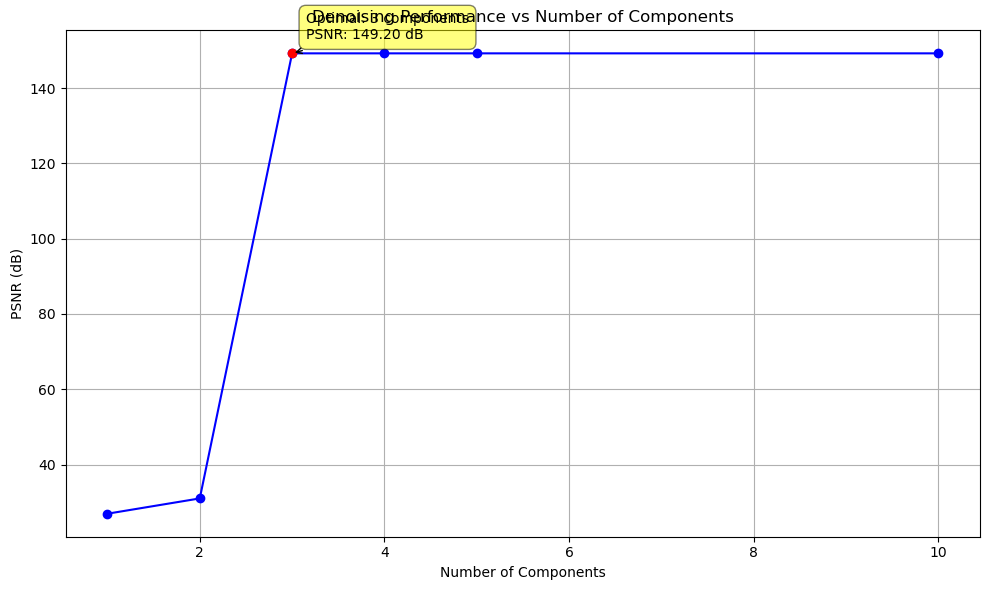


Analysis Summary:
Optimal number of components: 3
Best PSNR: 149.20 dB
PSNR improvement: 122.25 dB

Analyzing subject 98
Running component analysis...


 17%|█▋        | 1/6 [00:15<01:19, 15.85s/it]

Components: 1, PSNR: 158.38968988398477 dB, Sigma: None


 33%|███▎      | 2/6 [00:31<01:03, 15.89s/it]

Components: 2, PSNR: 158.38968988398477 dB, Sigma: None


 50%|█████     | 3/6 [00:47<00:47, 15.97s/it]

Components: 3, PSNR: 158.38968988398477 dB, Sigma: None


 67%|██████▋   | 4/6 [01:03<00:31, 15.81s/it]

Components: 4, PSNR: 158.38968988398477 dB, Sigma: None


 83%|████████▎ | 5/6 [01:19<00:15, 15.80s/it]

Components: 5, PSNR: 158.38968988398477 dB, Sigma: None


100%|██████████| 6/6 [01:34<00:00, 15.78s/it]


Components: 10, PSNR: 158.38968988398477 dB, Sigma: None


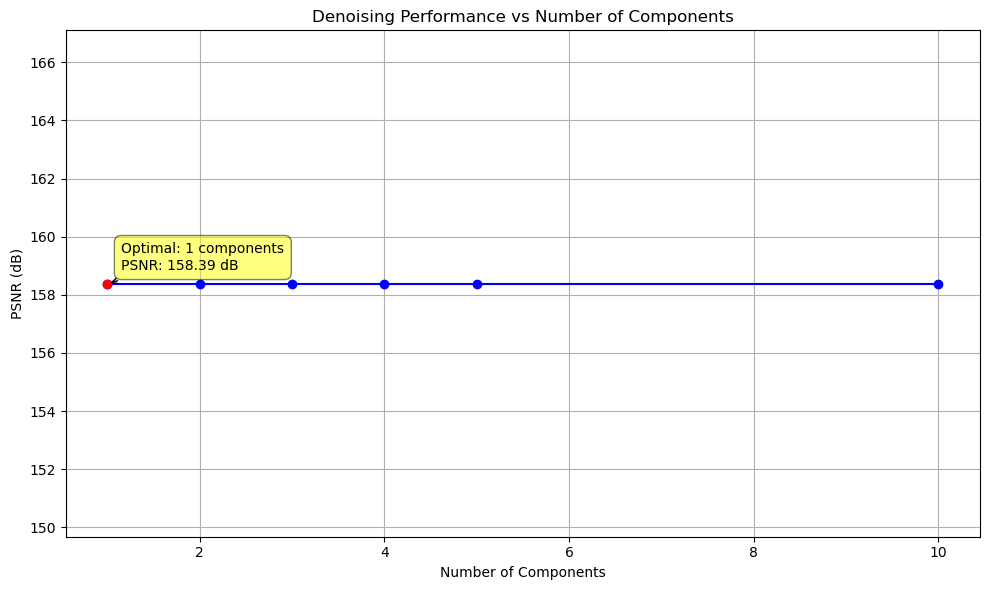


Analysis Summary:
Optimal number of components: 1
Best PSNR: 158.39 dB
PSNR improvement: 0.00 dB

Analyzing subject 70
Running component analysis...


 17%|█▋        | 1/6 [00:21<01:46, 21.40s/it]

Components: 1, PSNR: 28.628340996696608 dB, Sigma: None


 33%|███▎      | 2/6 [00:42<01:24, 21.24s/it]

Components: 2, PSNR: 34.00285675741699 dB, Sigma: None


 50%|█████     | 3/6 [01:03<01:03, 21.27s/it]

Components: 3, PSNR: 150.11362618508042 dB, Sigma: None


 67%|██████▋   | 4/6 [01:25<00:42, 21.26s/it]

Components: 4, PSNR: 150.11362618508042 dB, Sigma: None


 83%|████████▎ | 5/6 [01:46<00:21, 21.26s/it]

Components: 5, PSNR: 150.11362618508042 dB, Sigma: None


100%|██████████| 6/6 [02:07<00:00, 21.25s/it]


Components: 10, PSNR: 150.11362618508042 dB, Sigma: None


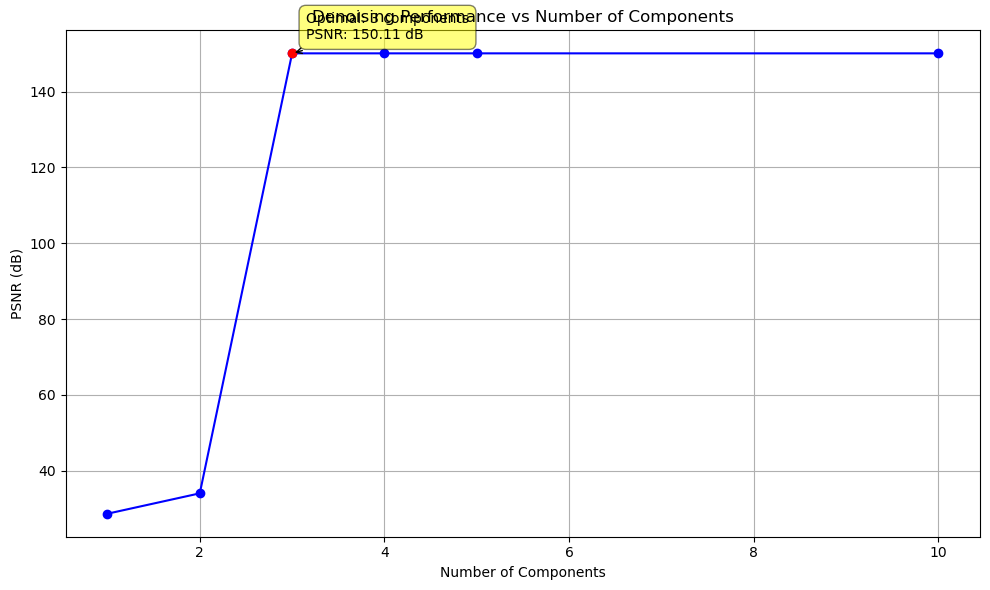


Analysis Summary:
Optimal number of components: 3
Best PSNR: 150.11 dB
PSNR improvement: 121.49 dB

Analyzing subject 91
Running component analysis...


 17%|█▋        | 1/6 [00:21<01:47, 21.45s/it]

Components: 1, PSNR: 27.046099960973354 dB, Sigma: None


 33%|███▎      | 2/6 [00:42<01:25, 21.30s/it]

Components: 2, PSNR: 31.410445933756524 dB, Sigma: None


 50%|█████     | 3/6 [01:04<01:04, 21.53s/it]

Components: 3, PSNR: 148.78216736605674 dB, Sigma: None


 67%|██████▋   | 4/6 [01:27<00:44, 22.14s/it]

Components: 4, PSNR: 148.78216736605674 dB, Sigma: None


 83%|████████▎ | 5/6 [01:50<00:22, 22.36s/it]

Components: 5, PSNR: 148.78216736605674 dB, Sigma: None


100%|██████████| 6/6 [02:12<00:00, 22.10s/it]


Components: 10, PSNR: 148.78216736605674 dB, Sigma: None


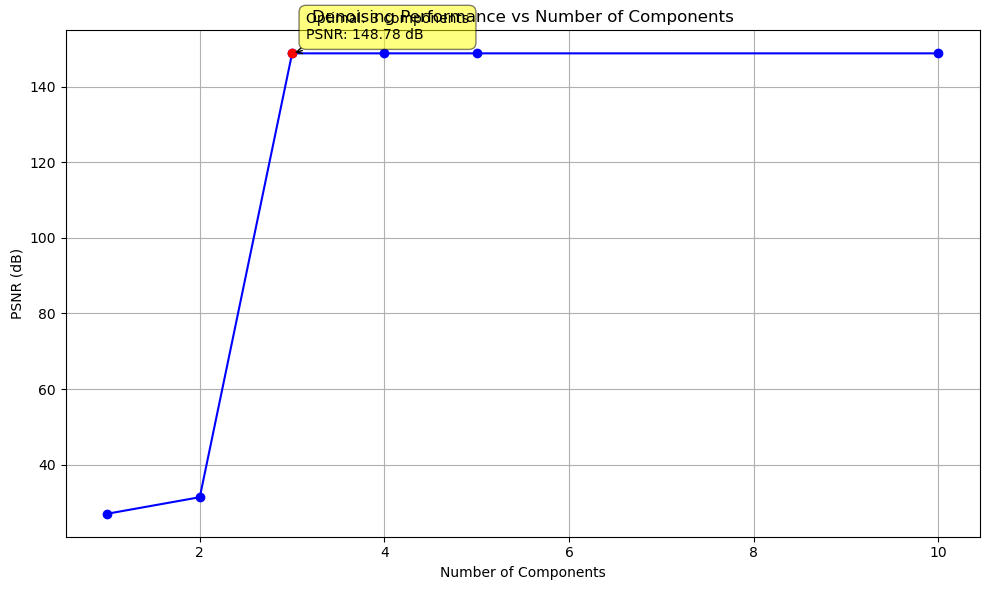


Analysis Summary:
Optimal number of components: 3
Best PSNR: 148.78 dB
PSNR improvement: 121.74 dB


In [85]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy import ndimage
import matplotlib.pyplot as plt
from tqdm import tqdm

def analyze_component_numbers(image_data, patch_radius=2, max_components=10):
    """Analyze denoising performance for different numbers of components."""
    
    # Create brain mask for PSNR calculation
    middle_slice = np.abs(image_data[:, :, image_data.shape[2]//2, 0])
    threshold = np.mean(middle_slice) + 0.5 * np.std(middle_slice)
    mask = middle_slice > threshold  # Uncomment this - you need a mask
    
    components = [1,2,3,4,5,10]
    psnr_scores = []
    
    # Reference image (using real part, not magnitude)
    reference = image_data.real  # Changed from abs to real
    
    for n_comp in tqdm(components):
        # Denoise with current number of components
        denoised, sigma, _ = improved_mppca(image_data, 
                                          patch_radius=patch_radius, 
                                          n_components=n_comp)
        
        # Calculate PSNR using real parts
        slice_psnrs = []
        for z in range(image_data.shape[2]):
            # Apply mask to both reference and denoised
            ref_slice = reference[:, :, z, 0] * mask
            den_slice = denoised[:, :, z, 0].real * mask  # Use real part
            
            if np.any(mask):
                slice_psnr = psnr(ref_slice, den_slice, 
                                data_range=ref_slice.max())
                slice_psnrs.append(slice_psnr)
        
        avg_psnr = np.mean(slice_psnrs)
        psnr_scores.append(avg_psnr)
        
        print(f"Components: {n_comp}, PSNR: {avg_psnr} dB, Sigma: {sigma}")
    
    return components, psnr_scores

def run_component_analysis(data, patch_radius=2, max_components=10):
    """Run complete analysis pipeline with improved output."""
    print("Running component analysis...")
    
    components, psnr_scores = analyze_component_numbers(
        data, 
        patch_radius=patch_radius,
        max_components=max_components
    )
    
    # Plot results
    plot_component_analysis(components, psnr_scores)
    
    # Additional analysis
    optimal_idx = np.argmax(psnr_scores)
    print("\nAnalysis Summary:")
    print(f"Optimal number of components: {components[optimal_idx]}")
    print(f"Best PSNR: {psnr_scores[optimal_idx]:.2f} dB")
    print(f"PSNR improvement: {psnr_scores[optimal_idx] - psnr_scores[0]:.2f} dB")
    
    return components, psnr_scores

# Example usage:
for subject_id in pat_dict_corrected_provided.keys():
    print(f"\nAnalyzing subject {subject_id}")
    data = pat_dict_corrected_provided[subject_id]
    components, scores = run_component_analysis(data, max_components=7)

100%|██████████| 64/64 [00:32<00:00,  1.99it/s]


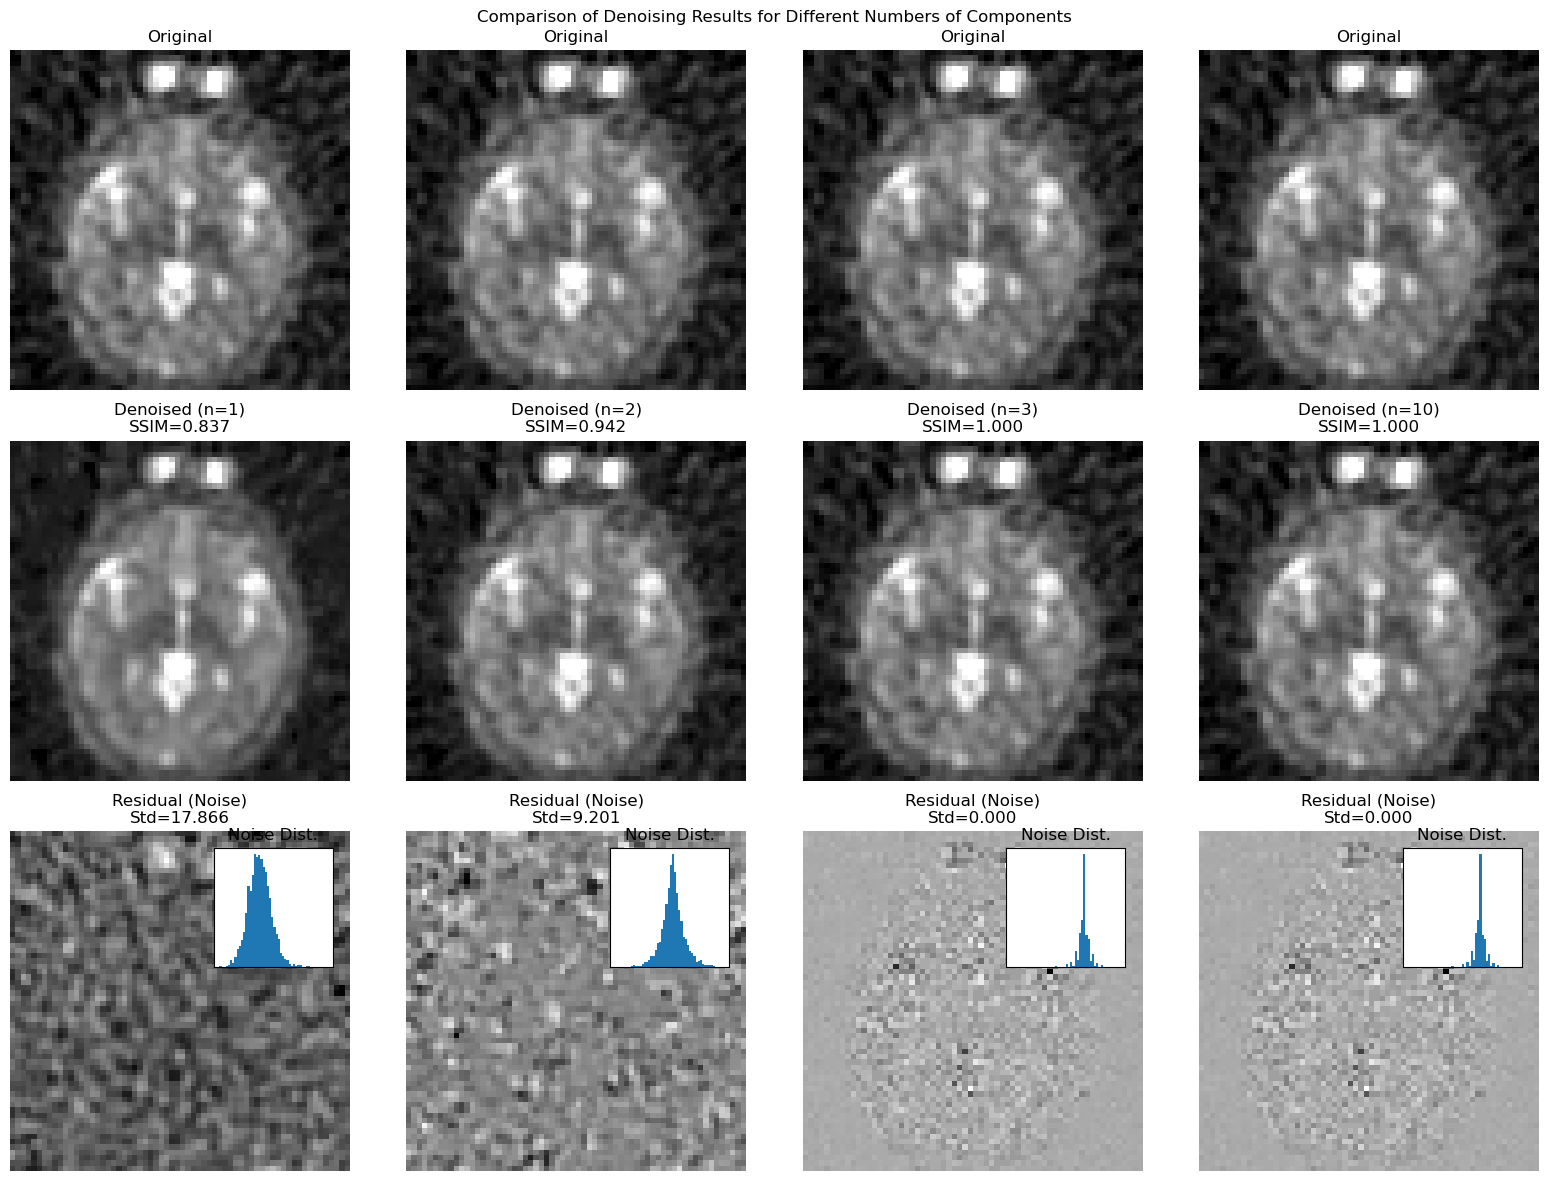

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from scipy import stats

def compare_components(image_data, components_to_test=[1, 2, 3, 10], patch_radius=2):
    """
    Compare denoising results for different numbers of components side by side.
    """
    # Select middle slice
    slice_idx = image_data.shape[2] // 2
    reference = image_data[slice_idx, :, :, 0].real

    # Create figure
    fig, axes = plt.subplots(3, len(components_to_test), figsize=(16, 12))
    plt.suptitle('Comparison of Denoising Results for Different Numbers of Components')

    # Set display range
    vmax = np.percentile(reference, 99)
    vmin = np.percentile(reference, 1)

    # Plot original images in top row
    for idx in range(len(components_to_test)):
        axes[0, idx].imshow(reference, cmap='gray', vmax=vmax, vmin=vmin)
        axes[0, idx].set_title('Original')
        axes[0, idx].axis('off')

    # Process each component number
    for idx, n_comp in enumerate(components_to_test):
        # Denoise with current number of components
        denoised = improved_mppca(image_data, patch_radius=patch_radius, n_components=n_comp)[0]
        denoised_slice = denoised[slice_idx, :, :, 0].real
        
        # Calculate residual and metrics
        residual = reference - denoised_slice
        ssim_score = ssim(reference, denoised_slice, data_range=reference.max())
        noise_std = np.std(residual)

        # Plot denoised image
        axes[1, idx].imshow(denoised_slice, cmap='gray', vmax=vmax, vmin=vmin)
        axes[1, idx].set_title(f'Denoised (n={n_comp})\nSSIM={ssim_score:.3f}')
        axes[1, idx].axis('off')

        # Plot residual and noise distribution
        axes[2, idx].imshow(residual, cmap='gray')
        axes[2, idx].set_title(f'Residual (Noise)\nStd={noise_std:.3f}')
        axes[2, idx].axis('off')

        # Add inset noise distribution histogram
        ax_hist = axes[2, idx].inset_axes([0.6, 0.6, 0.35, 0.35])
        ax_hist.hist(residual.flatten(), bins=50, density=True)
        ax_hist.set_title('Noise Dist.')
        ax_hist.set_xticks([])
        ax_hist.set_yticks([])

    plt.tight_layout()
    return fig

# Example usage
data = pat_dict_corrected_provided["77"]
fig = compare_components(data, components_to_test=[1, 2, 3, 10], patch_radius=2)
plt.show()

100%|██████████| 64/64 [00:40<00:00,  1.59it/s]


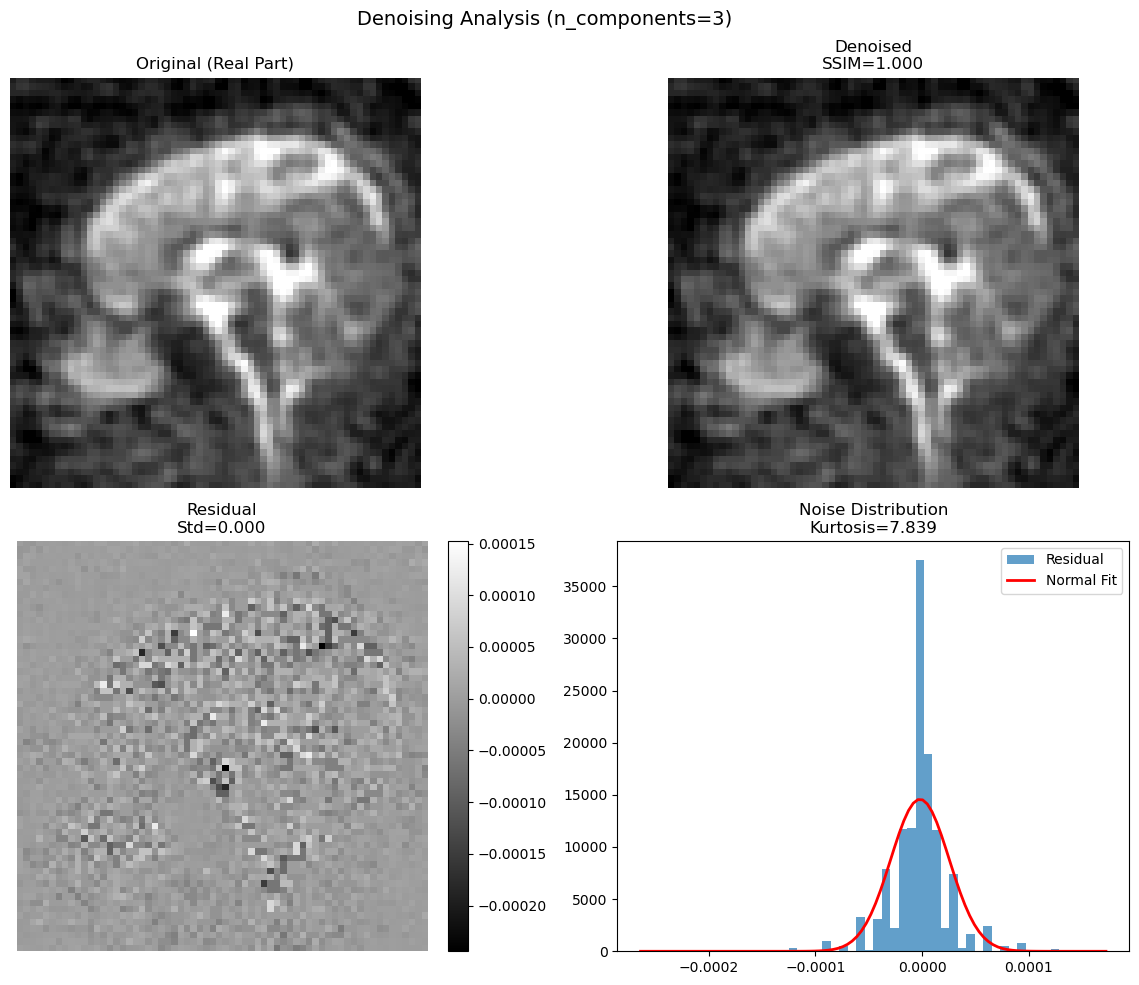


Metrics:
ssim: 1.000
noise_std: 0.000
noise_kurtosis: 7.839


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from scipy import stats

def analyze_single_subject(image_data, n_components=3, patch_radius=2):
    """
    Analyze denoising results for a single subject using real part of data.
    
    Parameters:
    -----------
    image_data : ndarray
        Input 4D array of shape [x, y, z, N]
    n_components : int
        Number of components to use for denoising
    patch_radius : int
        Radius of patch for local PCA
    """
    # Select middle slice for visualization
    slice_idx = image_data.shape[2] // 2
    
    # Get reference image (real part)
    reference = image_data[:, :, slice_idx, 0].real
    
    # Denoise with specified number of components
    denoised = improved_mppca(image_data, patch_radius=patch_radius, n_components=n_components)[0]
    denoised_slice = denoised[:, :, slice_idx, 0].real
    
    # Calculate residual
    residual = reference - denoised_slice
    
    # Calculate metrics
    ssim_score = ssim(reference, denoised_slice, data_range=reference.max())
    noise_std = np.std(residual)
    noise_kurtosis = stats.kurtosis(residual.flatten())
    
    # Create plot
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    plt.suptitle(f'Denoising Analysis (n_components={n_components})', fontsize=14)
    
    # Plot original
    vmax = np.percentile(reference, 99)
    vmin = np.percentile(reference, 1)
    axes[0, 0].imshow(reference, cmap='gray', vmax=vmax, vmin=vmin)
    axes[0, 0].set_title('Original (Real Part)')
    axes[0, 0].axis('off')
    
    # Plot denoised
    axes[0, 1].imshow(denoised_slice, cmap='gray', vmax=vmax, vmin=vmin)
    axes[0, 1].set_title(f'Denoised\nSSIM={ssim_score:.3f}')
    axes[0, 1].axis('off')
    
    # Plot residual
    im = axes[1, 0].imshow(residual, cmap='gray')
    axes[1, 0].set_title(f'Residual\nStd={noise_std:.3f}')
    axes[1, 0].axis('off')
    plt.colorbar(im, ax=axes[1, 0], fraction=0.046, pad=0.04)
    
    # Plot noise histogram with fitted normal distribution
    residual_flat = residual.flatten()
    axes[1, 1].hist(residual_flat, bins=50, density=True, alpha=0.7, label='Residual')
    
    # Fit normal distribution
    mu, std = np.mean(residual_flat), np.std(residual_flat)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    axes[1, 1].plot(x, p, 'r-', lw=2, label='Normal Fit')
    axes[1, 1].set_title(f'Noise Distribution\nKurtosis={noise_kurtosis:.3f}')
    axes[1, 1].legend()
    
    plt.tight_layout()
    return fig, {
        'ssim': ssim_score,
        'noise_std': noise_std,
        'noise_kurtosis': noise_kurtosis
    }

# Example usage
data = pat_dict_corrected_provided["77"]
fig, metrics = analyze_single_subject(data, n_components=3, patch_radius=2)
plt.show()
print("\nMetrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.3f}")

  0%|          | 0/64 [00:00<?, ?it/s]

100%|██████████| 64/64 [00:30<00:00,  2.12it/s]


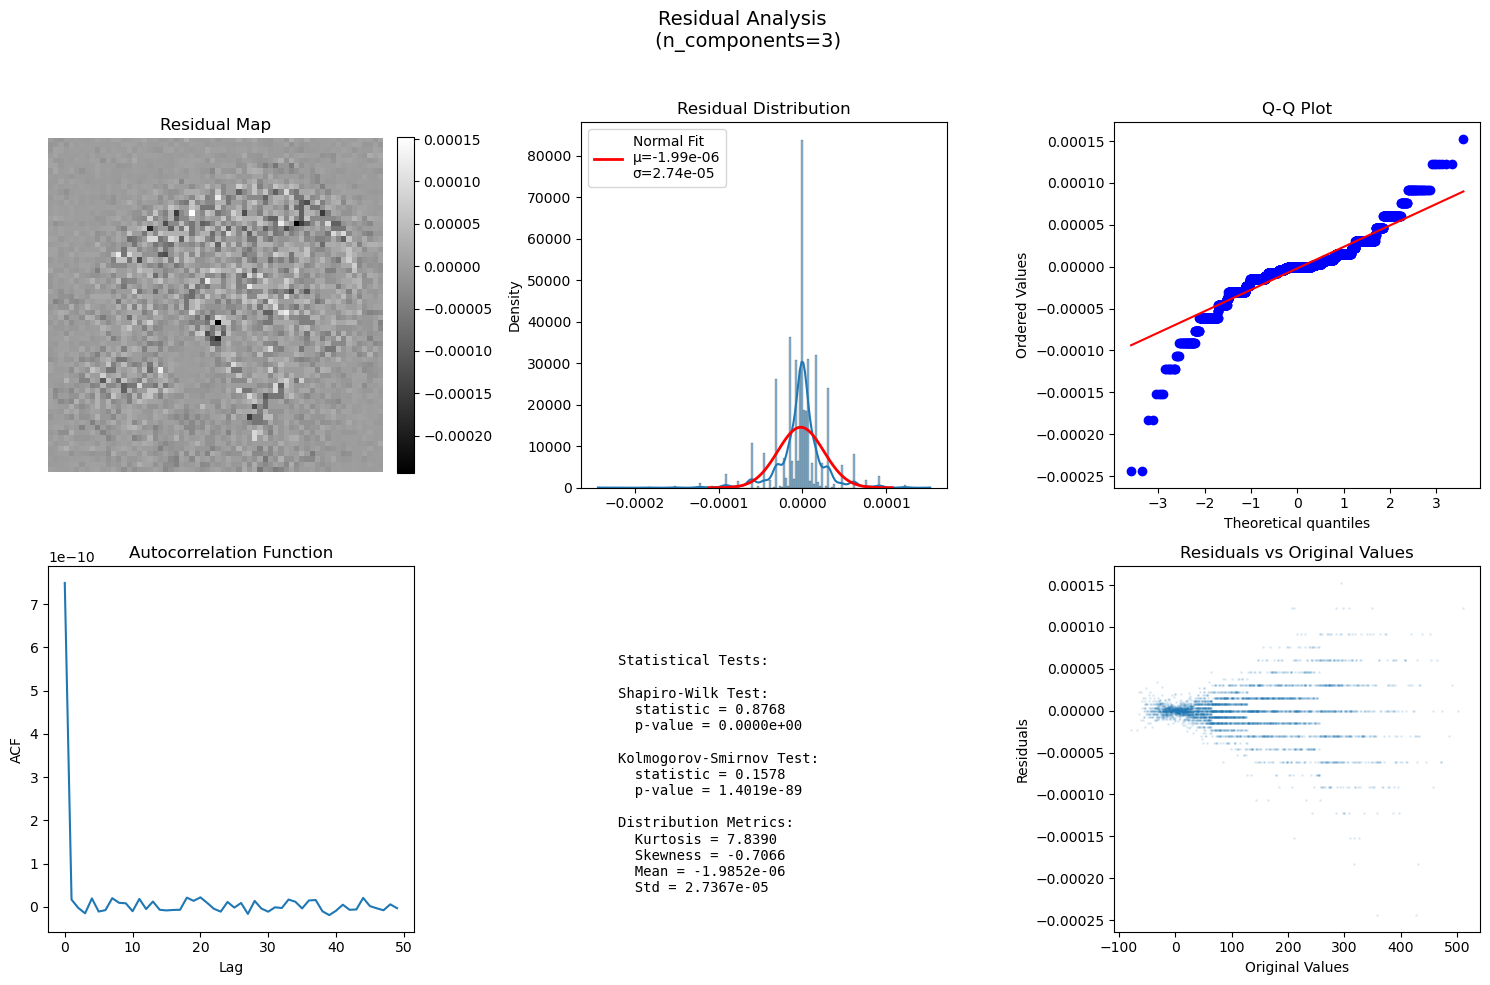


Analysis Metrics:
mean: -0.000002
std: 0.000027
kurtosis: 7.839020
skewness: -0.706573
shapiro_p: 0.000000
kstest_p: 0.000000


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from skimage.metrics import structural_similarity as ssim
import seaborn as sns

def analyze_residuals_comprehensive(original, denoised, title="Residual Analysis"):
    """
    Comprehensive analysis of denoising residuals with multiple plots.
    
    Parameters:
    -----------
    original : ndarray
        Original image data
    denoised : ndarray
        Denoised image data
    title : str
        Title for the plot
    """
    # Calculate residual
    residual = original - denoised
    residual_flat = residual.flatten()
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(15, 10))
    gs = plt.GridSpec(2, 3, figure=fig)
    fig.suptitle(title, fontsize=14, y=0.98)
    
    # 1. Residual Image
    ax1 = fig.add_subplot(gs[0, 0])
    im = ax1.imshow(residual, cmap='gray')
    ax1.set_title('Residual Map')
    plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
    ax1.axis('off')
    
    # 2. Histogram with Normal Fit
    ax2 = fig.add_subplot(gs[0, 1])
    sns.histplot(residual_flat, stat='density', kde=True, ax=ax2)
    mu, std = np.mean(residual_flat), np.std(residual_flat)
    x = np.linspace(mu - 4*std, mu + 4*std, 100)
    p = stats.norm.pdf(x, mu, std)
    ax2.plot(x, p, 'r-', lw=2, label=f'Normal Fit\nμ={mu:.2e}\nσ={std:.2e}')
    ax2.set_title('Residual Distribution')
    ax2.legend()
    
    # 3. Q-Q Plot
    ax3 = fig.add_subplot(gs[0, 2])
    stats.probplot(residual_flat, dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot')
    
    # 4. Autocorrelation Plot
    ax4 = fig.add_subplot(gs[1, 0])
    lags = 50
    acf = np.correlate(residual_flat - np.mean(residual_flat), 
                      residual_flat - np.mean(residual_flat), 
                      mode='full') / len(residual_flat)
    acf = acf[len(acf)//2:]
    ax4.plot(range(lags), acf[:lags])
    ax4.set_title('Autocorrelation Function')
    ax4.set_xlabel('Lag')
    ax4.set_ylabel('ACF')
    
    # 5. Statistical Tests Results
    ax5 = fig.add_subplot(gs[1, 1])
    ax5.axis('off')
    
    # Perform statistical tests
    shapiro_stat, shapiro_p = stats.shapiro(residual_flat)
    kstest_stat, kstest_p = stats.kstest(residual_flat, 'norm', 
                                        args=(np.mean(residual_flat), 
                                              np.std(residual_flat)))
    kurtosis = stats.kurtosis(residual_flat)
    skew = stats.skew(residual_flat)
    
    stats_text = (
        f"Statistical Tests:\n\n"
        f"Shapiro-Wilk Test:\n"
        f"  statistic = {shapiro_stat:.4f}\n"
        f"  p-value = {shapiro_p:.4e}\n\n"
        f"Kolmogorov-Smirnov Test:\n"
        f"  statistic = {kstest_stat:.4f}\n"
        f"  p-value = {kstest_p:.4e}\n\n"
        f"Distribution Metrics:\n"
        f"  Kurtosis = {kurtosis:.4f}\n"
        f"  Skewness = {skew:.4f}\n"
        f"  Mean = {mu:.4e}\n"
        f"  Std = {std:.4e}"
    )
    ax5.text(0.1, 0.1, stats_text, fontfamily='monospace', 
             verticalalignment='bottom')
    
    # 6. Scatter plot of residuals vs original values
    ax6 = fig.add_subplot(gs[1, 2])
    ax6.scatter(original.flatten(), residual_flat, alpha=0.1, s=1)
    ax6.set_xlabel('Original Values')
    ax6.set_ylabel('Residuals')
    ax6.set_title('Residuals vs Original Values')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  
    return fig, {
        'mean': mu,
        'std': std,
        'kurtosis': kurtosis,
        'skewness': skew,
        'shapiro_p': shapiro_p,
        'kstest_p': kstest_p
    }

def run_residual_analysis(image_data, n_components=3, patch_radius=2):
    """
    Run residual analysis on a single slice of data.
    """
    # Get middle slice
    slice_idx = image_data.shape[2] // 2
    original = image_data[:, :, slice_idx, 0].real
    
    # Denoise
    denoised = improved_mppca(image_data, patch_radius=patch_radius, 
                             n_components=n_components)[0]
    denoised_slice = denoised[:, :, slice_idx, 0].real
    
    # Run analysis
    fig, metrics = analyze_residuals_comprehensive(
        original, 
        denoised_slice,
        title=f'Residual Analysis \n (n_components={n_components})'
    )
    
    return fig, metrics

# Example usage
data = pat_dict_corrected_provided["77"]
fig, metrics = run_residual_analysis(data, n_components=3, patch_radius=2)
plt.show()

print("\nAnalysis Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.6f}")

In [83]:


def analyze_component_numbers(image_data, patch_radius=2, max_components=10):
    """
    Analyze denoising performance for different numbers of components.
    
    Parameters:
    -----------
    image_data : ndarray
        Input 4D array of shape [x, y, z, N]
    patch_radius : int
        Radius of patch for local PCA
    max_components : int
        Maximum number of components to test
        
    Returns:
    --------
    components : list
        List of component numbers tested
    psnr_scores : list
        PSNR scores for each number of components
    """
    # Create brain mask for PSNR calculation
    middle_slice = np.abs(image_data[:, :, image_data.shape[2]//2, 0])
    # threshold = np.mean(middle_slice) + 0.5 * np.std(middle_slice)
    # mask = middle_slice > threshold
    

    
    # Lists to store results
    components = list(range(1, max_components + 1))
    psnr_scores = []
    
    # Reference image (using magnitude)
    reference = np.abs(image_data)
    
    # Test each number of components
    for n_comp in tqdm(components):
        # Denoise with current number of components
        denoised = improved_mppca(image_data, patch_radius=patch_radius, n_components=n_comp)[0]
        denoised_mag = np.abs(denoised)
        
        # Calculate PSNR for each slice
        slice_psnrs = []
        for z in range(image_data.shape[2]):
            # Apply mask to both reference and denoised
            ref_slice = reference[:, :, z, 0] * mask
            den_slice = denoised_mag[:, :, z, 0] * mask
            
            # Calculate PSNR
            if np.any(mask):  # Only calculate if mask has True values
                slice_psnr = psnr(ref_slice, den_slice, data_range=ref_slice.max())
                slice_psnrs.append(slice_psnr)
        
        # Average PSNR across slices
        avg_psnr = np.mean(slice_psnrs)
        psnr_scores.append(avg_psnr)
    
    return components, psnr_scores

def plot_component_analysis(components, psnr_scores):
    """Plot the results of component analysis."""
    plt.figure(figsize=(10, 6))
    plt.plot(components, psnr_scores, 'b-o')
    plt.grid(True)
    plt.xlabel('Number of Components')
    plt.ylabel('PSNR (dB)')
    plt.title('Denoising Performance vs Number of Components')
    
    # Find and mark the optimal point
    optimal_idx = np.argmax(psnr_scores)
    optimal_components = components[optimal_idx]
    optimal_psnr = psnr_scores[optimal_idx]
    
    plt.plot(optimal_components, optimal_psnr, 'ro')
    plt.annotate(f'Optimal: {optimal_components} components\nPSNR: {optimal_psnr:.2f} dB',
                xy=(optimal_components, optimal_psnr),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    plt.tight_layout()
    plt.show()

# Example usage
def run_component_analysis(data):
    """Run the complete analysis pipeline."""
    print("Running component analysis...")
    components, psnr_scores = analyze_component_numbers(data, patch_radius=2, max_components=10)
    
    print("\nResults:")
    for n_comp, score in zip(components, psnr_scores):
        print(f"Components: {n_comp}, PSNR: {score:.2f} dB")
    
    print("\nPlotting results...")
    plot_component_analysis(components, psnr_scores)
    
    return components, psnr_scores

Running component analysis...


100%|██████████| 10/10 [03:56<00:00, 23.60s/it]



Results:
Components: 1, PSNR: 28.65 dB
Components: 2, PSNR: 32.88 dB
Components: 3, PSNR: 148.11 dB
Components: 4, PSNR: 148.11 dB
Components: 5, PSNR: 148.11 dB
Components: 6, PSNR: 148.11 dB
Components: 7, PSNR: 148.11 dB
Components: 8, PSNR: 148.11 dB
Components: 9, PSNR: 148.11 dB
Components: 10, PSNR: 148.11 dB

Plotting results...


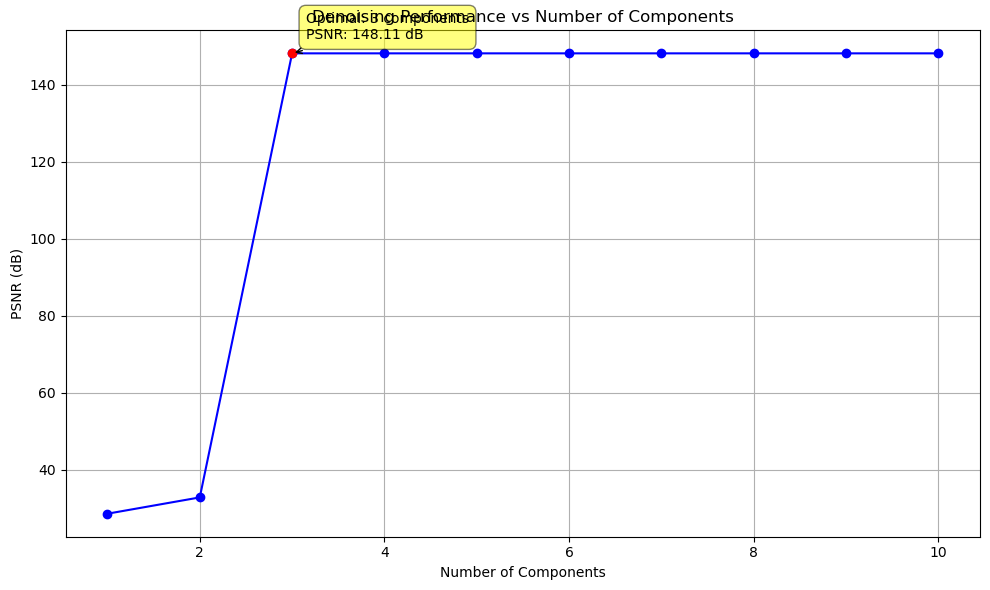

In [29]:
# Load your data
for sub in pat_dict_corrected_provided.keys():
    X = pat_dict_corrected_provided[sub]
    components, psnr_scores = run_component_analysis(X)

100%|██████████| 64/64 [00:40<00:00,  1.58it/s]



Noise Analysis Results:

Components: 1
Noise STD: 16.148
Noise Kurtosis: 0.110
SSIM: 0.883

Components: 2
Noise STD: 10.355
Noise Kurtosis: 0.864
SSIM: 0.949

Components: 3
Noise STD: 0.000
Noise Kurtosis: 19.153
SSIM: 1.000

Components: 10
Noise STD: 0.000
Noise Kurtosis: 19.153
SSIM: 1.000


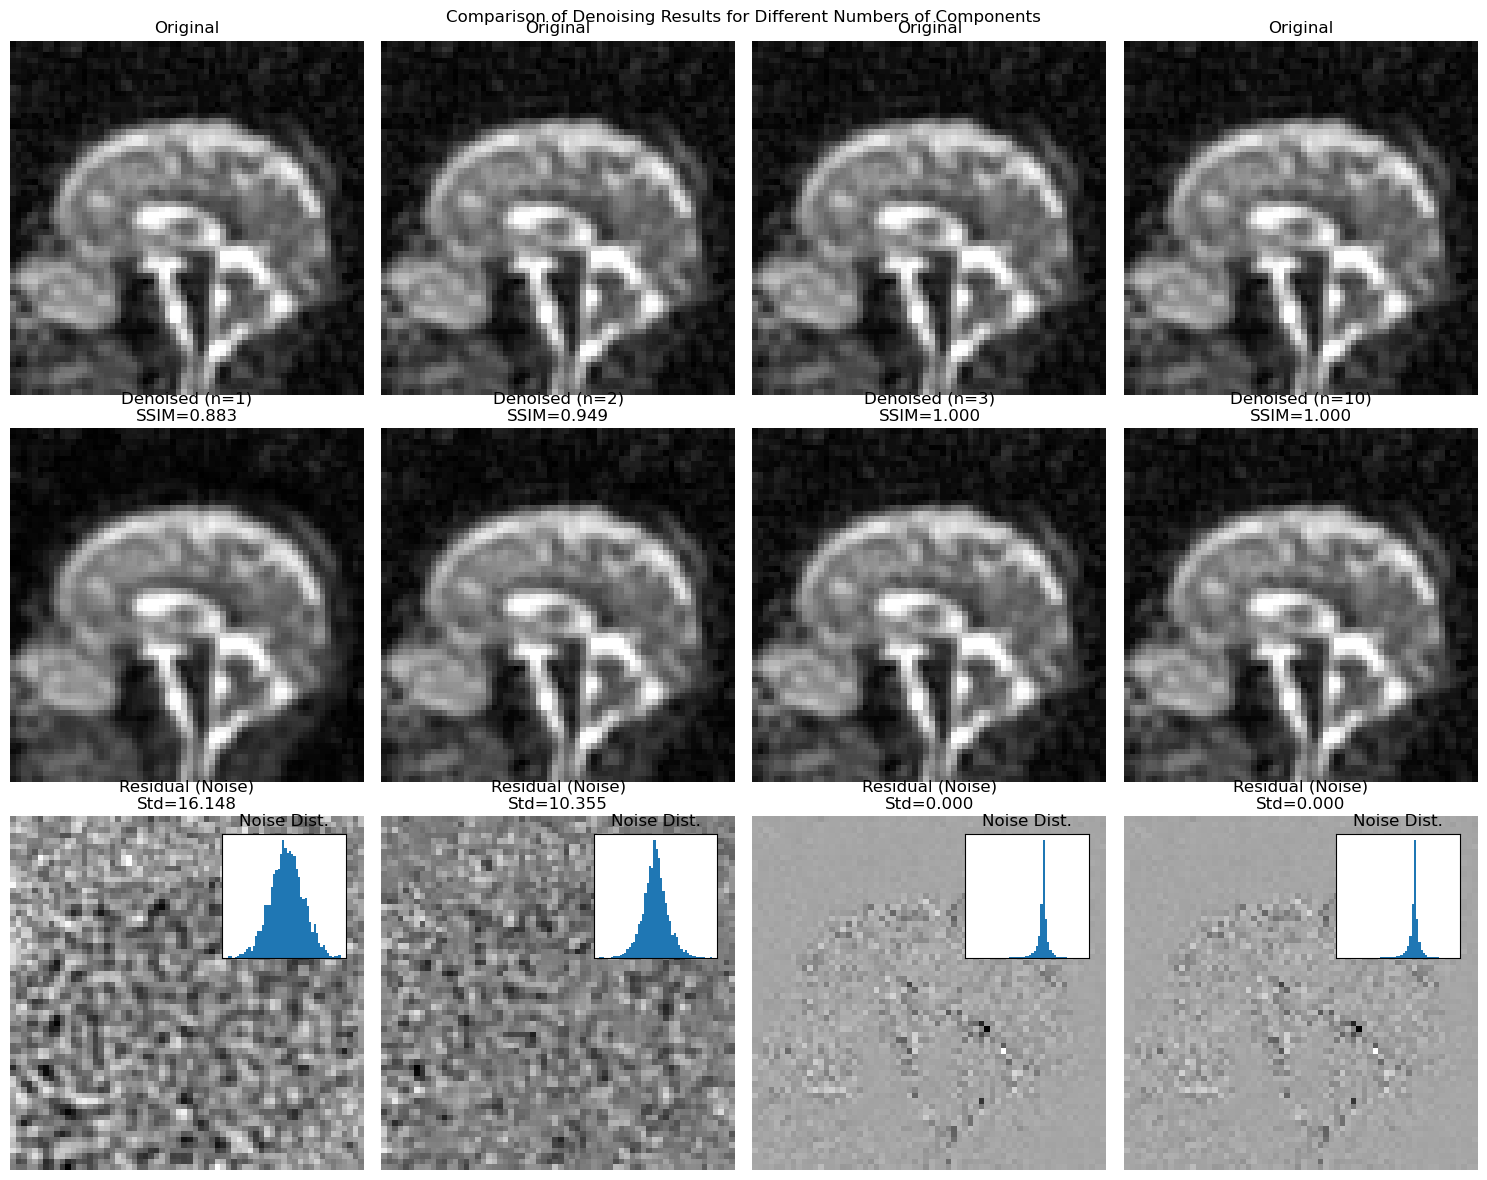

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from scipy import stats

def compare_denoising_components(image_data, components_to_test=[1, 3, 10], patch_radius=2):
    """
    Compare denoising results across different numbers of components.
    
    Parameters:
    -----------
    image_data : ndarray
        Input 4D array of shape [x, y, z, N]
    components_to_test : list
        List of component numbers to compare
    patch_radius : int
        Radius of patch for local PCA
    """
    # Select middle slice for visualization
    slice_idx = image_data.shape[2] // 2
    
    # Create figure
    fig, axes = plt.subplots(3, len(components_to_test), figsize=(15, 12))
    plt.suptitle('Comparison of Denoising Results for Different Numbers of Components')
    
    # Get reference image magnitude
    reference = np.abs(image_data[:, :, slice_idx, 0])
    vmax = np.percentile(reference, 99)
    
    for idx, n_comp in enumerate(components_to_test):
        # Denoise with current number of components
        denoised = improved_mppca(image_data, patch_radius=patch_radius, n_components=n_comp)[0]
        denoised_mag = np.abs(denoised[:, :, slice_idx, 0])
        
        # Calculate residual (noise)
        residual = reference - denoised_mag
        
        # Calculate metrics
        ssim_score = ssim(reference, denoised_mag, data_range=reference.max())
        noise_std = np.std(residual)
        
        # Plot original, denoised, and residual
        axes[0, idx].imshow(reference, cmap='gray', vmax=vmax)
        axes[0, idx].set_title(f'Original')
        axes[0, idx].axis('off')
        
        axes[1, idx].imshow(denoised_mag, cmap='gray', vmax=vmax)
        axes[1, idx].set_title(f'Denoised (n={n_comp})\nSSIM={ssim_score:.3f}')
        axes[1, idx].axis('off')
        
        axes[2, idx].imshow(residual, cmap='gray')
        axes[2, idx].set_title(f'Residual (Noise)\nStd={noise_std:.3f}')
        axes[2, idx].axis('off')
        
        # Add histogram of residual noise
        ax_hist = axes[2, idx].inset_axes([0.6, 0.6, 0.35, 0.35])
        ax_hist.hist(residual.flatten(), bins=50, density=True)
        ax_hist.set_title('Noise Dist.')
        ax_hist.set_xticks([])
        ax_hist.set_yticks([])
    
    plt.tight_layout()
    return fig

def analyze_noise_characteristics(image_data, components_to_test=[1, 3, 10], patch_radius=2):
    """
    Analyze noise characteristics for different numbers of components.
    """
    slice_idx = image_data.shape[2] // 2
    reference = np.abs(image_data[:, :, slice_idx, 0])
    
    results = []
    for n_comp in components_to_test:
        denoised = improved_mppca(image_data, patch_radius=patch_radius, n_components=n_comp)[0]
        denoised_mag = np.abs(denoised[:, :, slice_idx, 0])
        residual = reference - denoised_mag
        
        results.append({
            'components': n_comp,
            'noise_std': np.std(residual),
            'noise_kurtosis': stats.kurtosis(residual.flatten()),
            'ssim': ssim(reference, denoised_mag, data_range=reference.max())
        })
    
    return results

# Example usage
def run_comprehensive_analysis(data):
    """Run both visual and numerical analysis."""
    components_to_test = [1, 2, 3, 10]
    
    # Generate comparison figure
    fig = compare_denoising_components(data, components_to_test)
    
    # Analyze noise characteristics
    noise_results = analyze_noise_characteristics(data, components_to_test)
    
    print("\nNoise Analysis Results:")
    for result in noise_results:
        print(f"\nComponents: {result['components']}")
        print(f"Noise STD: {result['noise_std']:.3f}")
        print(f"Noise Kurtosis: {result['noise_kurtosis']:.3f}")
        print(f"SSIM: {result['ssim']:.3f}")
    
    return fig, noise_results


data = pat_dict_corrected_provided["Das_H048_v2"]
fig, results = run_comprehensive_analysis(data)

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

def calc_snr_metrics(image):
    """
    Calculate SNR using oval ROI method for brain and noise regions.
    
    Parameters:
    -----------
    image : ndarray
        2D image slice
    """
    # Define the center and radii of the ovals
    center_x, center_y = image.shape[0]//2, image.shape[1]//2
    major_radius1, minor_radius1 = 15, 20  # Signal region
    major_radius2, minor_radius2 = 25, 30  # Noise region
    
    # Create mesh grids
    x, y = np.meshgrid(np.arange(image.shape[0]), np.arange(image.shape[1]))
    
    # Create masks
    signal_mask = ((x - center_x) ** 2) / (major_radius1 ** 2) + ((y - center_y) ** 2) / (minor_radius1 ** 2) <= 1
    noise_mask = ~(((x - center_x) ** 2) / (major_radius2 ** 2) + ((y - center_y) ** 2) / (minor_radius2 ** 2) <= 1)
    
    # Calculate metrics
    mean_signal = np.mean(image[signal_mask])
    std_noise = np.std(image[noise_mask])
    snr = mean_signal / std_noise if std_noise != 0 else 0
    
    return snr, mean_signal, std_noise, signal_mask, noise_mask

def analyze_subject(subject_data, n_components_list, patch_radius=2):
    """
    Analyze a single subject across different numbers of components.
    """
    slice_idx = subject_data.shape[1] // 2  # Middle slice
    results = []
    
    # Original image metrics
    orig_slice = subject_data[:, slice_idx, :, 0].real
    orig_snr, orig_mean, orig_std, signal_mask, noise_mask = calc_snr_metrics(orig_slice)
    
    for n_comp in n_components_list:
        # Denoise with current number of components
        denoised = fixed_mppca(subject_data, patch_radius=patch_radius, n_components=n_comp)
        denoised_slice = denoised[:, slice_idx, :, 0].real
        
        # Calculate SNR for denoised image
        den_snr, den_mean, den_std, _, _ = calc_snr_metrics(denoised_slice)
        
        # Calculate residuals
        residual = orig_slice - denoised_slice
        residual_mean = np.mean(residual)
        residual_std = np.std(residual)
        
        # Store results
        results.append({
            'n_components': n_comp,
            'orig_snr': orig_snr,
            'denoised_snr': den_snr,
            'snr_improvement': (den_snr - orig_snr) / orig_snr * 100,
            'residual_mean': residual_mean,
            'residual_std': residual_std,
            'residual': residual,
            'denoised_slice': denoised_slice
        })
    
    return results, signal_mask, noise_mask

def plot_comprehensive_results(all_subjects_results, n_components_list):
    """
    Create comprehensive plots of results across subjects.
    """
    # Initialize arrays for aggregate metrics
    n_subjects = len(all_subjects_results)
    snr_improvements = np.zeros((n_subjects, len(n_components_list)))
    residual_stds = np.zeros((n_subjects, len(n_components_list)))
    
    # Collect metrics
    for i, subject_results in enumerate(all_subjects_results):
        for j, result in enumerate(subject_results[0]):  # [0] because analyze_subject returns (results, mask1, mask2)
            snr_improvements[i,j] = result['snr_improvement']
            residual_stds[i,j] = result['residual_std']
    
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot SNR improvement
    ax = axes[0,0]
    mean_snr_imp = np.mean(snr_improvements, axis=0)
    std_snr_imp = np.std(snr_improvements, axis=0)
    ax.plot(n_components_list, mean_snr_imp, 'b-o')
    ax.fill_between(n_components_list, 
                   mean_snr_imp - std_snr_imp,
                   mean_snr_imp + std_snr_imp,
                   alpha=0.2)
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('SNR Improvement (%)')
    ax.set_title('SNR Improvement vs Components')
    ax.grid(True)
    
    # Plot residual standard deviations
    ax = axes[0,1]
    mean_res_std = np.mean(residual_stds, axis=0)
    std_res_std = np.std(residual_stds, axis=0)
    ax.plot(n_components_list, mean_res_std, 'r-o')
    ax.fill_between(n_components_list,
                   mean_res_std - std_res_std,
                   mean_res_std + std_res_std,
                   alpha=0.2)
    ax.set_xlabel('Number of Components')
    ax.set_ylabel('Residual STD')
    ax.set_title('Residual Standard Deviation')
    ax.grid(True)
    
    # Plot residual distributions for a sample case
    ax = axes[1,0]
    # Take middle component number as example
    mid_comp_idx = len(n_components_list) // 2
    residuals = [subject_results[0][mid_comp_idx]['residual'].flatten() 
                for subject_results in all_subjects_results]
    
    for residual in residuals:
        mean_res = np.mean(residual)
        std_res = np.std(residual)
        x = np.linspace(mean_res - 3*std_res, mean_res + 3*std_res, 100)
        ax.plot(x, norm.pdf(x, mean_res, std_res), alpha=0.3)
    
    ax.set_xlabel('Residual Value')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'Residual Distributions\n(n_components={n_components_list[mid_comp_idx]})')
    ax.grid(True)
    
    plt.tight_layout()
    return fig

# Example usage:

# Analyze multiple subjects
n_components_list = [1, 2, 3, 5, 10]
all_results = []

for subject_data in pat_dict_corrected_provided.keys():
    results = analyze_subject(pat_dict_corrected_provided[subject_data], n_components_list)
    all_results.append(results)

# Plot comprehensive results
fig = plot_comprehensive_results(all_results, n_components_list)
plt.show()

KeyboardInterrupt: 

In [39]:
# Setup component numbers to test
n_components_list = [1, 2, 3, 5, 10]

# Analyze all subjects
all_results = []
for subject_id in pat_dict_corrected_provided.keys():
    subject_data = pat_dict_corrected_provided[subject_id]
    results = analyze_subject(subject_data, n_components_list)
    all_results.append(results)

# Create comprehensive plots
fig = plot_comprehensive_results(all_results, n_components_list)
plt.show()

NameError: name 'plot_denoised_comparison' is not defined

In [47]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from skimage.metrics import structural_similarity as ssim
from pathlib import Path
import pandas as pd
from tqdm import tqdm
from readNaImage import read_na_image
from mppca_implementations.mppca_controlled import test_mp_pca_controlled
from mppca_implementations.improved_mppca import improved_mppca

In [48]:

class MPPCAAnalyzer:
    """Complete analysis pipeline for MPPCA denoising"""
    
    def __init__(self, output_dir='mppca_results'):
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(exist_ok=True)
        
    def create_roi_masks(self, image):
        """Create signal and noise ROI masks"""
        x, y = np.ogrid[:image.shape[0], :image.shape[1]]
        center_x, center_y = image.shape[0]//2, image.shape[1]//2
        
        signal_mask = ((x - center_x)**2/(15**2) + 
                      (y - center_y)**2/(20**2) <= 1)
        noise_mask = ((x - center_x)**2/(25**2) + 
                     (y - center_y)**2/(30**2) > 1)
        
        return signal_mask, noise_mask
    
    def analyze_noise_characteristics(self, residual, mask):
        """Analyze noise distribution"""
        data = residual[mask].flatten()
        
        # Normality tests
        shapiro_stat, shapiro_p = stats.shapiro(data)
        dagostino_stat, dagostino_p = stats.normaltest(data)
        
        # Distribution characteristics
        skewness = stats.skew(data)
        kurtosis = stats.kurtosis(data)
        
        return {
            'shapiro_test': (shapiro_stat, shapiro_p),
            'dagostino_test': (dagostino_stat, dagostino_p),
            'skewness': skewness,
            'kurtosis': kurtosis,
            'std': np.std(data),
            'mean': np.mean(data)
        }
    
    def denoise_volume(self, data, method='improved', patch_radius=2, n_components=None):
        """Apply specified denoising method"""
        if method == 'controlled':
            return MP_PCA_controlled(data, n_components)
        elif method == 'fixed':
            return fixed_mppca(data, patch_radius, n_components)
        else:  # improved
            return improved_mppca(data, patch_radius, n_components)
    
    def analyze_slice(self, original, denoised, slice_idx=None):
        """Analyze a single slice"""
        if slice_idx is None:
            slice_idx = original.shape[2] // 2
            
        orig_slice = original[:, :, slice_idx, 0].real
        den_slice = denoised[:, :, slice_idx, 0].real
        residual = orig_slice - den_slice
        
        signal_mask, noise_mask = self.create_roi_masks(orig_slice)
        
        signal_stats = self.analyze_noise_characteristics(residual, signal_mask)
        noise_stats = self.analyze_noise_characteristics(residual, noise_mask)
        
        snr = (np.mean(np.abs(den_slice[signal_mask])) / 
               np.std(residual[noise_mask]))
        
        return {
            'residual': residual,
            'signal_stats': signal_stats,
            'noise_stats': noise_stats,
            'snr': snr,
            'masks': (signal_mask, noise_mask)
        }
    
    def plot_analysis(self, analysis_results, title=""):
        """Create comprehensive visualization"""
        residual = analysis_results['residual']
        signal_mask, noise_mask = analysis_results['masks']
        
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle(title)
        
        # Residual map
        im = axes[0,0].imshow(residual, cmap='gray')
        axes[0,0].set_title('Residual Map')
        plt.colorbar(im, ax=axes[0,0])
        
        # Signal region histogram
        sns.histplot(residual[signal_mask].flatten(), kde=True, ax=axes[0,1])
        axes[0,1].set_title('Signal Region Residuals')
        
        # Noise region histogram
        sns.histplot(residual[noise_mask].flatten(), kde=True, ax=axes[0,2])
        axes[0,2].set_title('Noise Region Residuals')
        
        # Q-Q plots
        stats.probplot(residual[signal_mask].flatten(), dist="norm", plot=axes[1,0])
        axes[1,0].set_title('Signal Region Q-Q Plot')
        
        stats.probplot(residual[noise_mask].flatten(), dist="norm", plot=axes[1,1])
        axes[1,1].set_title('Noise Region Q-Q Plot')
        
        # ROI visualization
        mask_viz = np.zeros_like(residual)
        mask_viz[signal_mask] = 1
        mask_viz[noise_mask] = 2
        axes[1,2].imshow(mask_viz, cmap='viridis')
        axes[1,2].set_title('ROI Masks')
        
        plt.tight_layout()
        return fig
    
    def process_subject(self, subject_id, data, methods=['improved'], 
                       patch_radii=[2], n_components_list=[None]):
        """Process single subject with multiple parameter combinations"""
        results = {}
        
        for method in methods:
            for radius in patch_radii:
                for n_comp in n_components_list:
                    key = f"{method}_p{radius}_c{n_comp}"
                    
                    # Denoise
                    denoised = self.denoise_volume(data, method, radius, n_comp)
                    
                    # Analyze
                    analysis = self.analyze_slice(data, denoised)
                    
                    # Create plots
                    fig = self.plot_analysis(analysis, 
                                           f"Subject {subject_id} - {key}")
                    
                    results[key] = {
                        'denoised': denoised,
                        'analysis': analysis,
                        'figure': fig
                    }
        
        return results
    
    def process_all_subjects(self, subject_dict, methods=['improved'], 
                           patch_radii=[2], n_components_list=[None]):
        """Process all subjects"""
        all_results = {}
        summary_stats = []
        
        for subject_id, data in tqdm(subject_dict.items()):
            results = self.process_subject(subject_id, data, methods, 
                                        patch_radii, n_components_list)
            all_results[subject_id] = results
            
            # Collect summary statistics
            for key, result in results.items():
                method, params = key.split('_p')
                patch_rad, n_comp = params.split('_c')
                
                stats_dict = {
                    'subject_id': subject_id,
                    'method': method,
                    'patch_radius': int(patch_rad),
                    'n_components': n_comp,
                    'snr': result['analysis']['snr'],
                    'signal_gaussianity_p': result['analysis']['signal_stats']['shapiro_test'][1],
                    'noise_gaussianity_p': result['analysis']['noise_stats']['shapiro_test'][1],
                    'signal_kurtosis': result['analysis']['signal_stats']['kurtosis'],
                    'noise_kurtosis': result['analysis']['noise_stats']['kurtosis'],
                    'signal_std': result['analysis']['signal_stats']['std'],
                    'noise_std': result['analysis']['noise_stats']['std']
                }
                summary_stats.append(stats_dict)
                
                # Save individual subject plots
                result['figure'].savefig(
                    self.output_dir / f"{subject_id}_{key}_analysis.png"
                )
                plt.close(result['figure'])
        
        # Convert summary stats to DataFrame
        summary_df = pd.DataFrame(summary_stats)
        return all_results, summary_df
    
    def create_summary_report(self, summary_df):
        """Create comprehensive summary report"""
        # Group statistics
        grouped_stats = summary_df.groupby(['method', 'patch_radius', 'n_components']).agg({
            'snr': ['mean', 'std'],
            'signal_gaussianity_p': ['mean', 'std'],
            'noise_gaussianity_p': ['mean', 'std'],
            'signal_kurtosis': ['mean', 'std'],
            'noise_kurtosis': ['mean', 'std'],
            'signal_std': ['mean', 'std'],
            'noise_std': ['mean', 'std']
        })
        
        # Create summary plots
        figs = {}
        
        # SNR comparison
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.boxplot(data=summary_df, x='method', y='snr', hue='n_components')
        ax.set_title('SNR Comparison Across Methods')
        figs['snr'] = fig
        
        # Gaussianity tests
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        sns.boxplot(data=summary_df, x='method', y='signal_gaussianity_p', 
                   hue='n_components', ax=ax1)
        ax1.set_title('Signal Region Gaussianity')
        ax1.axhline(y=0.05, color='r', linestyle='--')
        
        sns.boxplot(data=summary_df, x='method', y='noise_gaussianity_p', 
                   hue='n_components', ax=ax2)
        ax2.set_title('Noise Region Gaussianity')
        ax2.axhline(y=0.05, color='r', linestyle='--')
        figs['gaussianity'] = fig
        
        # Kurtosis comparison
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        sns.boxplot(data=summary_df, x='method', y='signal_kurtosis', 
                   hue='n_components', ax=ax1)
        ax1.set_title('Signal Region Kurtosis')
        
        sns.boxplot(data=summary_df, x='method', y='noise_kurtosis', 
                   hue='n_components', ax=ax2)
        ax2.set_title('Noise Region Kurtosis')
        figs['kurtosis'] = fig
        
        # Save all figures
        for name, fig in figs.items():
            fig.savefig(self.output_dir / f"group_{name}_comparison.png")
            plt.close(fig)
        
        return grouped_stats, figs


In [60]:

"""Main execution function"""
# Initialize analyzer
analyzer = MPPCAAnalyzer()

# Load your data
_, subject_dict = get_4d_complex_data_provided(24)


H077_v2_tpiRecon
H077_v2_tpiRecon
H077_v2_tpiRecon
Das_H049_v2
Das_H049_v2
Das_H049_v2
Das_H049_v2
H096_v2_tpiRecon
Error reading file scaled for H096_v2_tpiRecon
H096_v2_tpiRecon
Error reading file scaled for H096_v2_tpiRecon
H096_v2_tpiRecon
Error reading file scaled for H096_v2_tpiRecon
H083_v2_tpiRecon
H083_v2_tpiRecon
H083_v2_tpiRecon
H086_v2_tpiRecon
H086_v2_tpiRecon
H086_v2_tpiRecon
H072_v2_tpiRecon
H072_v2_tpiRecon
H072_v2_tpiRecon
Das_H048_v2
Das_H048_v2
Das_H048_v2
H093_v2_tpiRecon
Error reading file scaled for H093_v2_tpiRecon
H093_v2_tpiRecon
Error reading file scaled for H093_v2_tpiRecon
H093_v2_tpiRecon
Error reading file scaled for H093_v2_tpiRecon
H090_v2_tpiRecon
H090_v2_tpiRecon
H090_v2_tpiRecon
H071_v2_tpiRecon
H071_v2_tpiRecon
H071_v2_tpiRecon
H099_v2_tpiRecon
H099_v2_tpiRecon
H099_v2_tpiRecon
H078_v2_tpiRecon
H078_v2_tpiRecon
H078_v2_tpiRecon
H085_v2_tpiRecon
H085_v2_tpiRecon
H085_v2_tpiRecon
H080_v2_tpiRecon
H080_v2_tpiRecon
H080_v2_tpiRecon
H095_v2_tpiRecon
Error

  0%|          | 0/35 [16:04<?, ?it/s]


TypeError: tuple indices must be integers or slices, not tuple

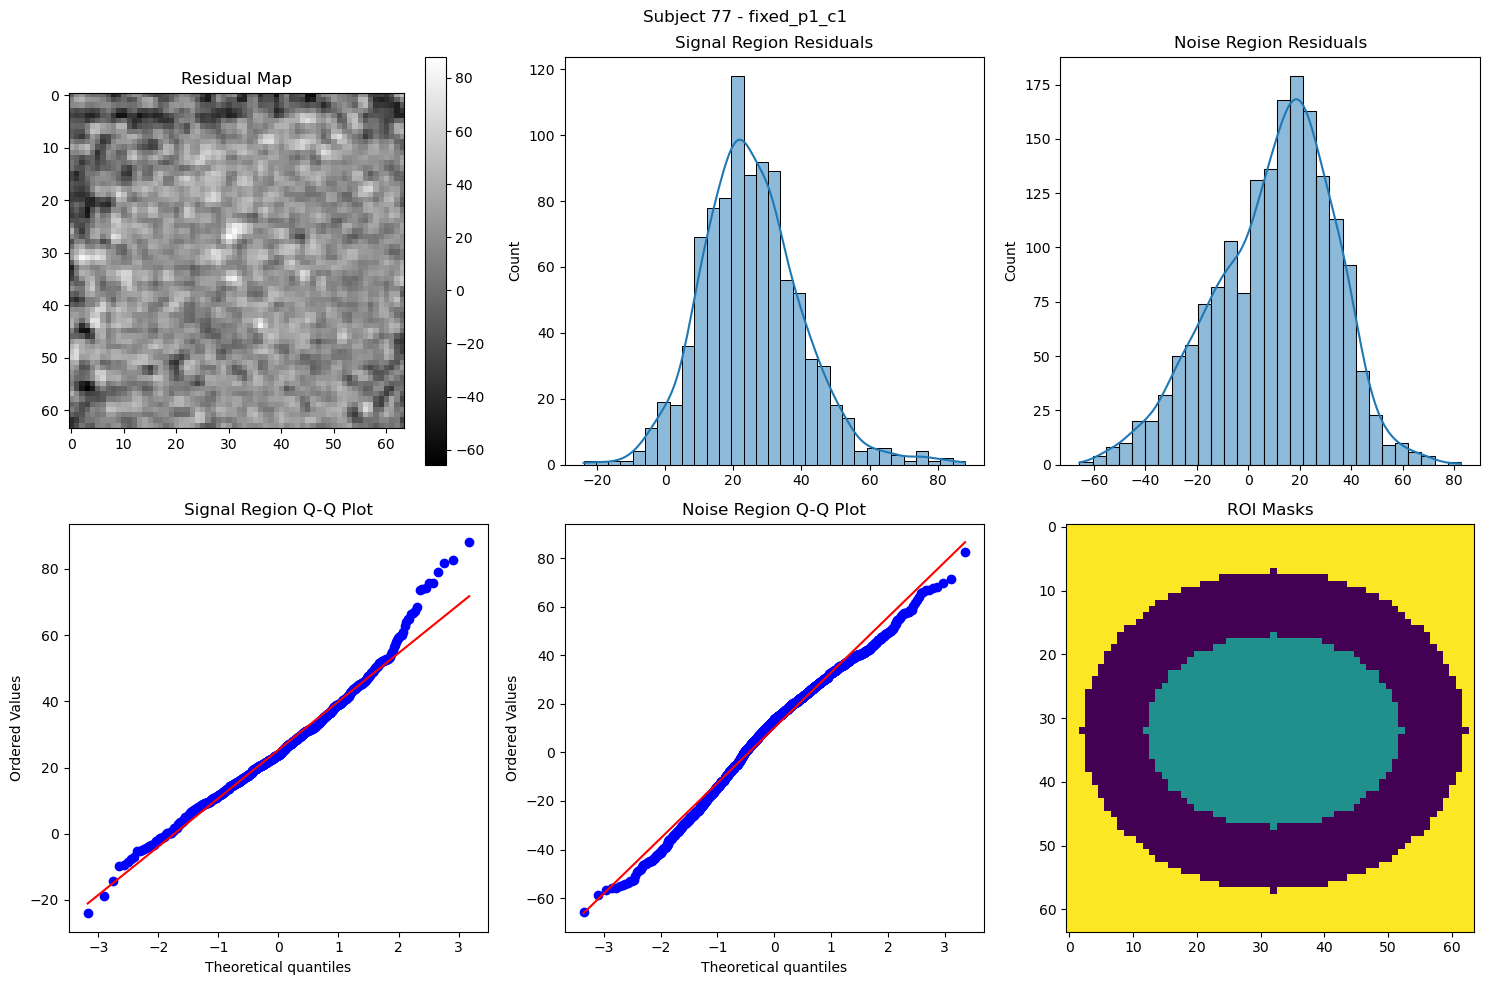

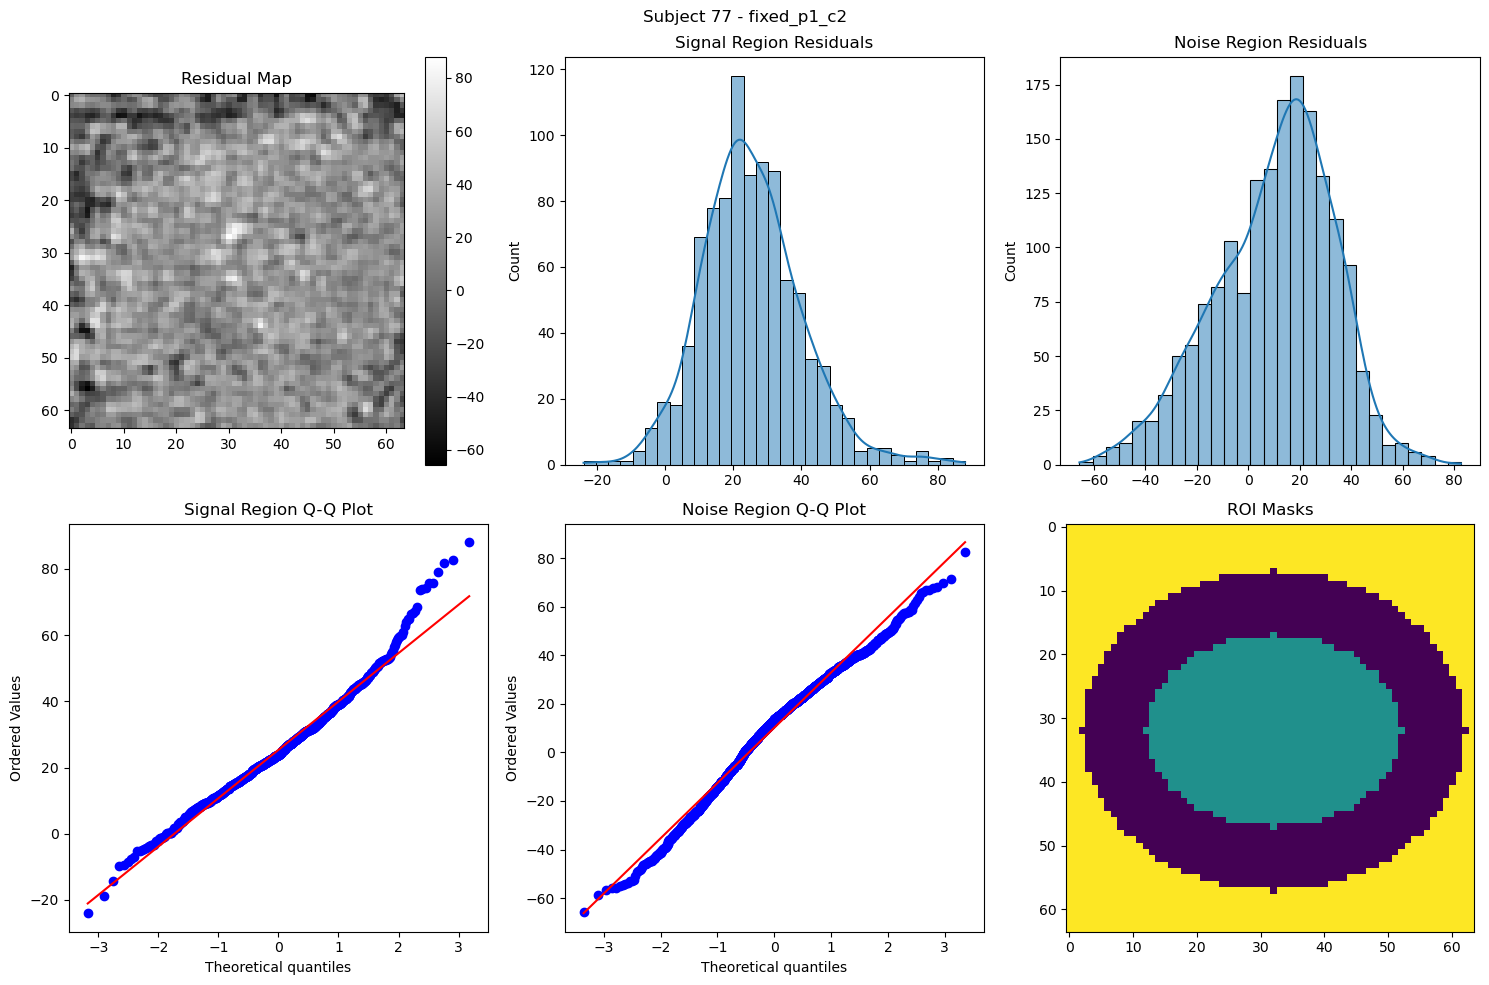

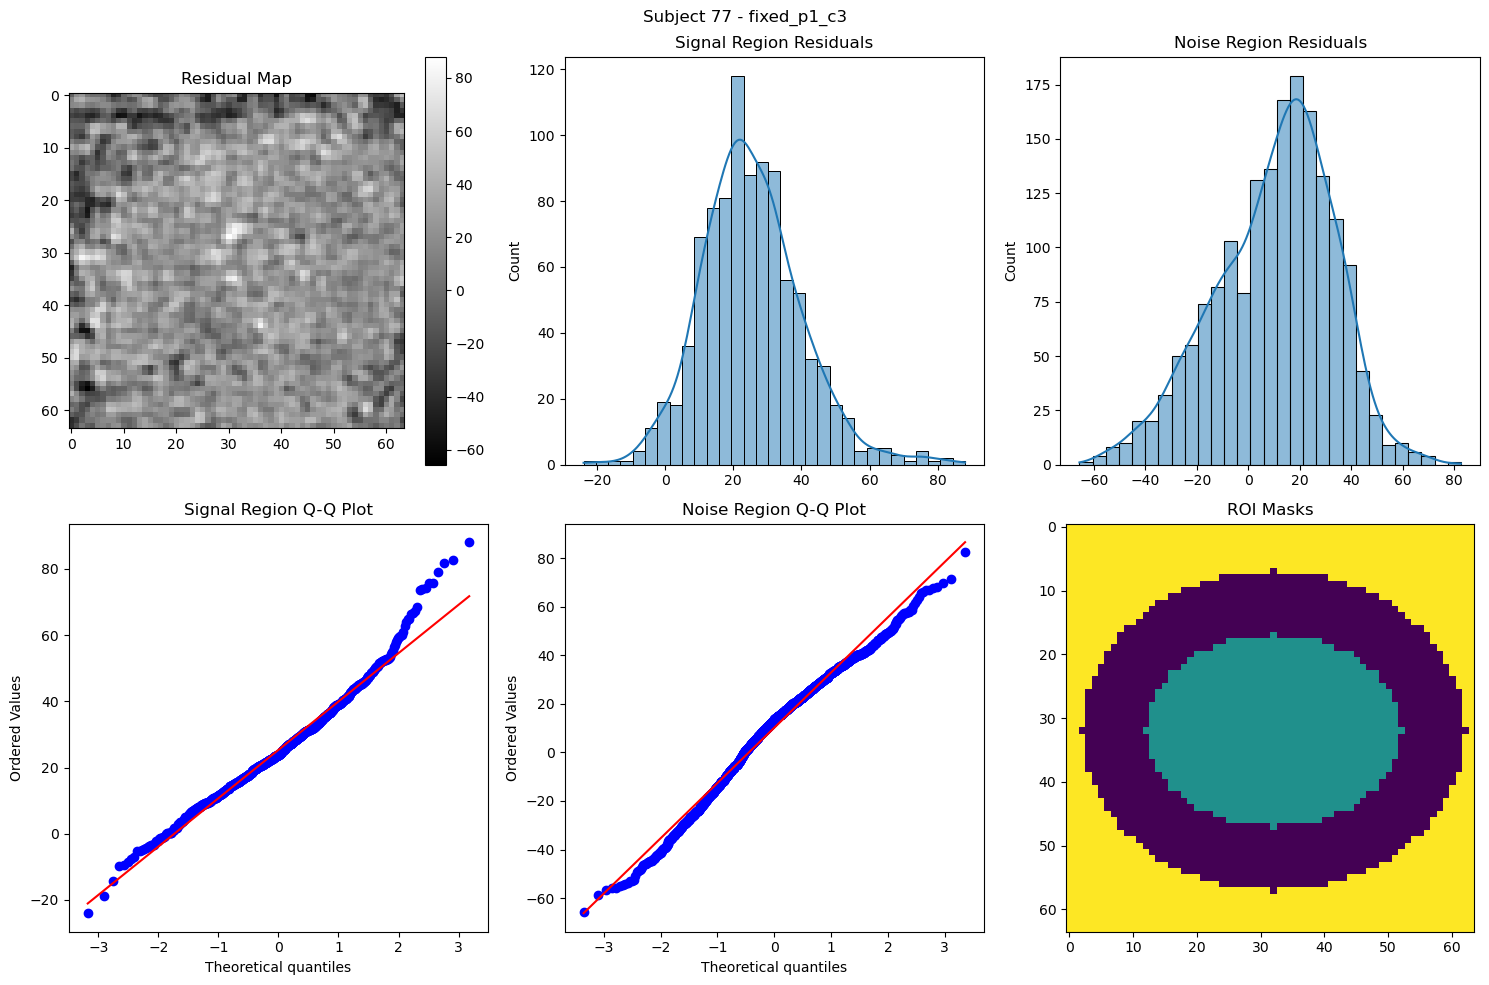

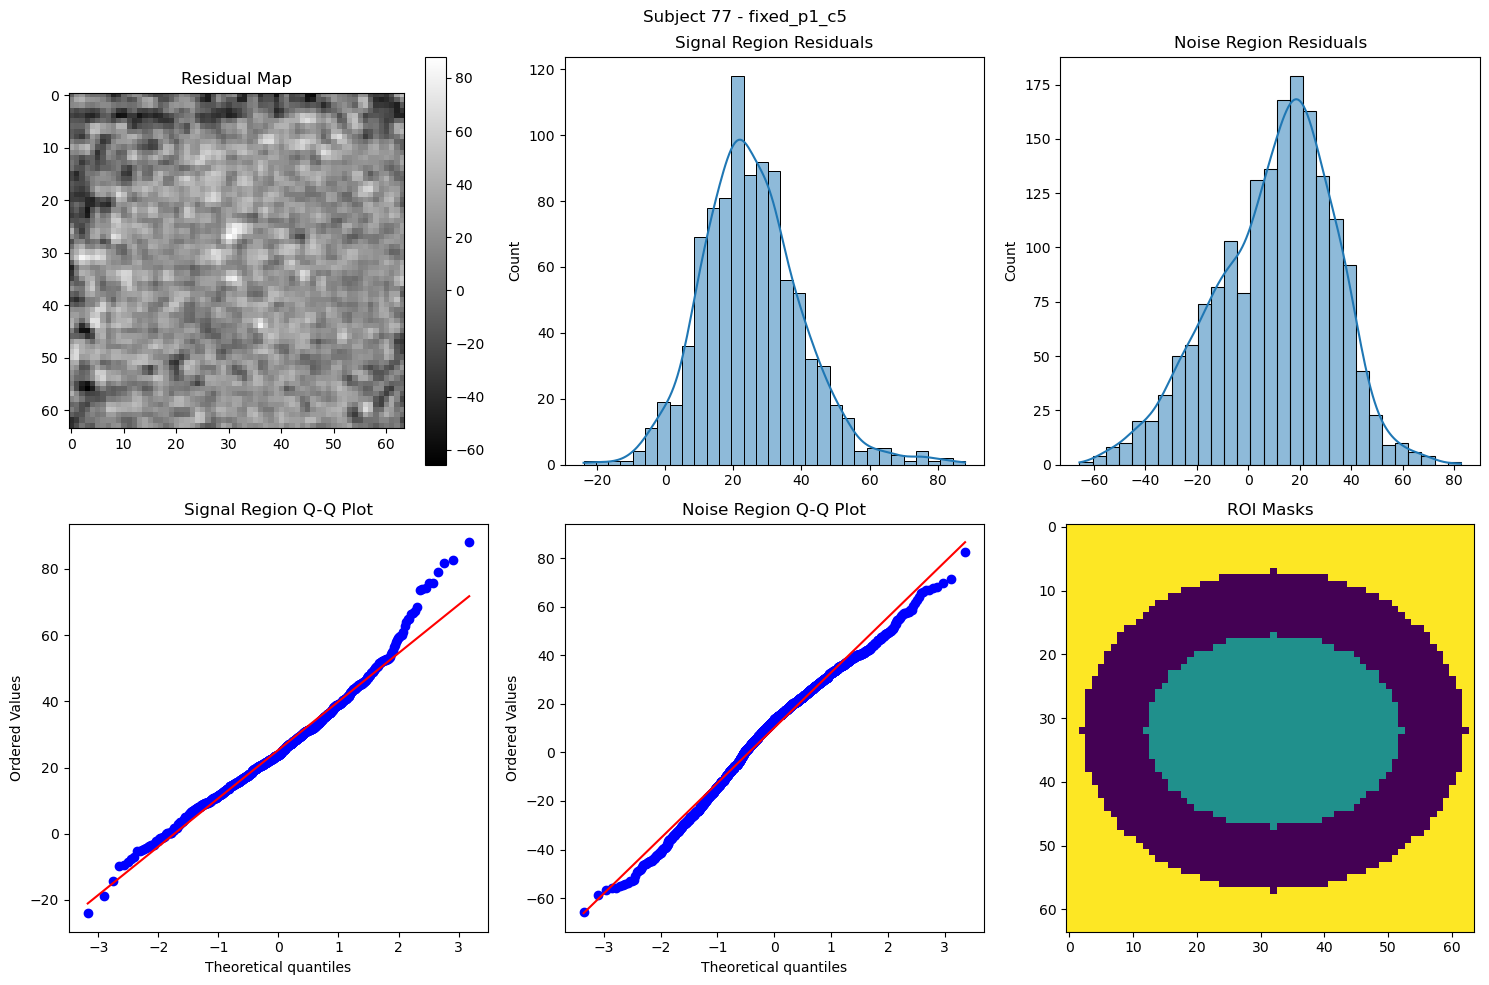

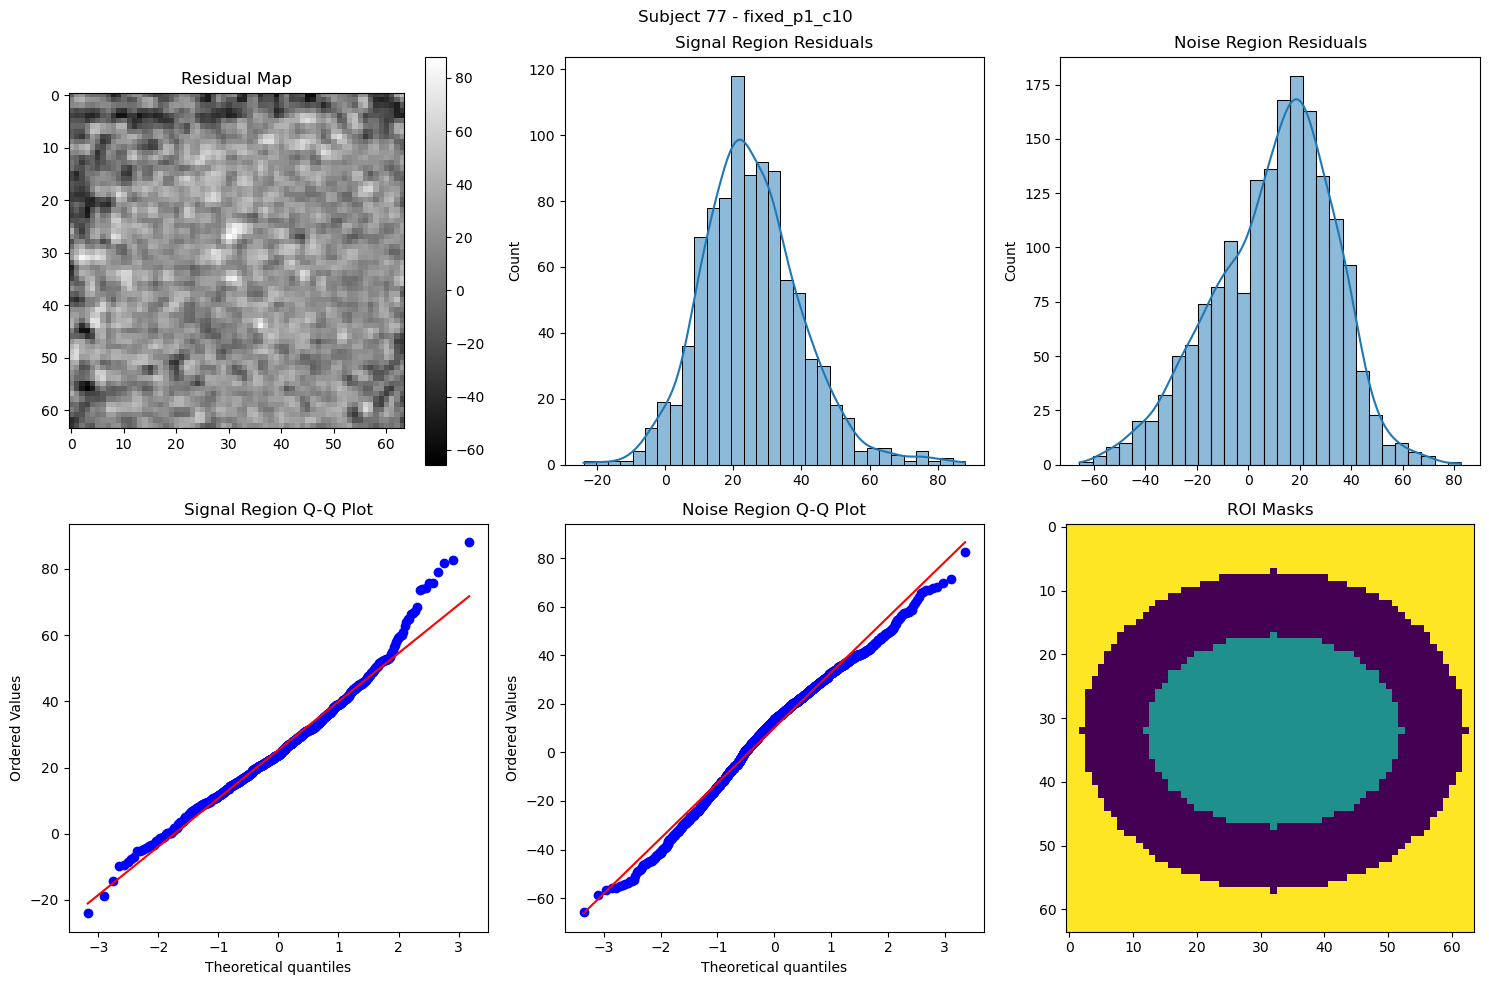

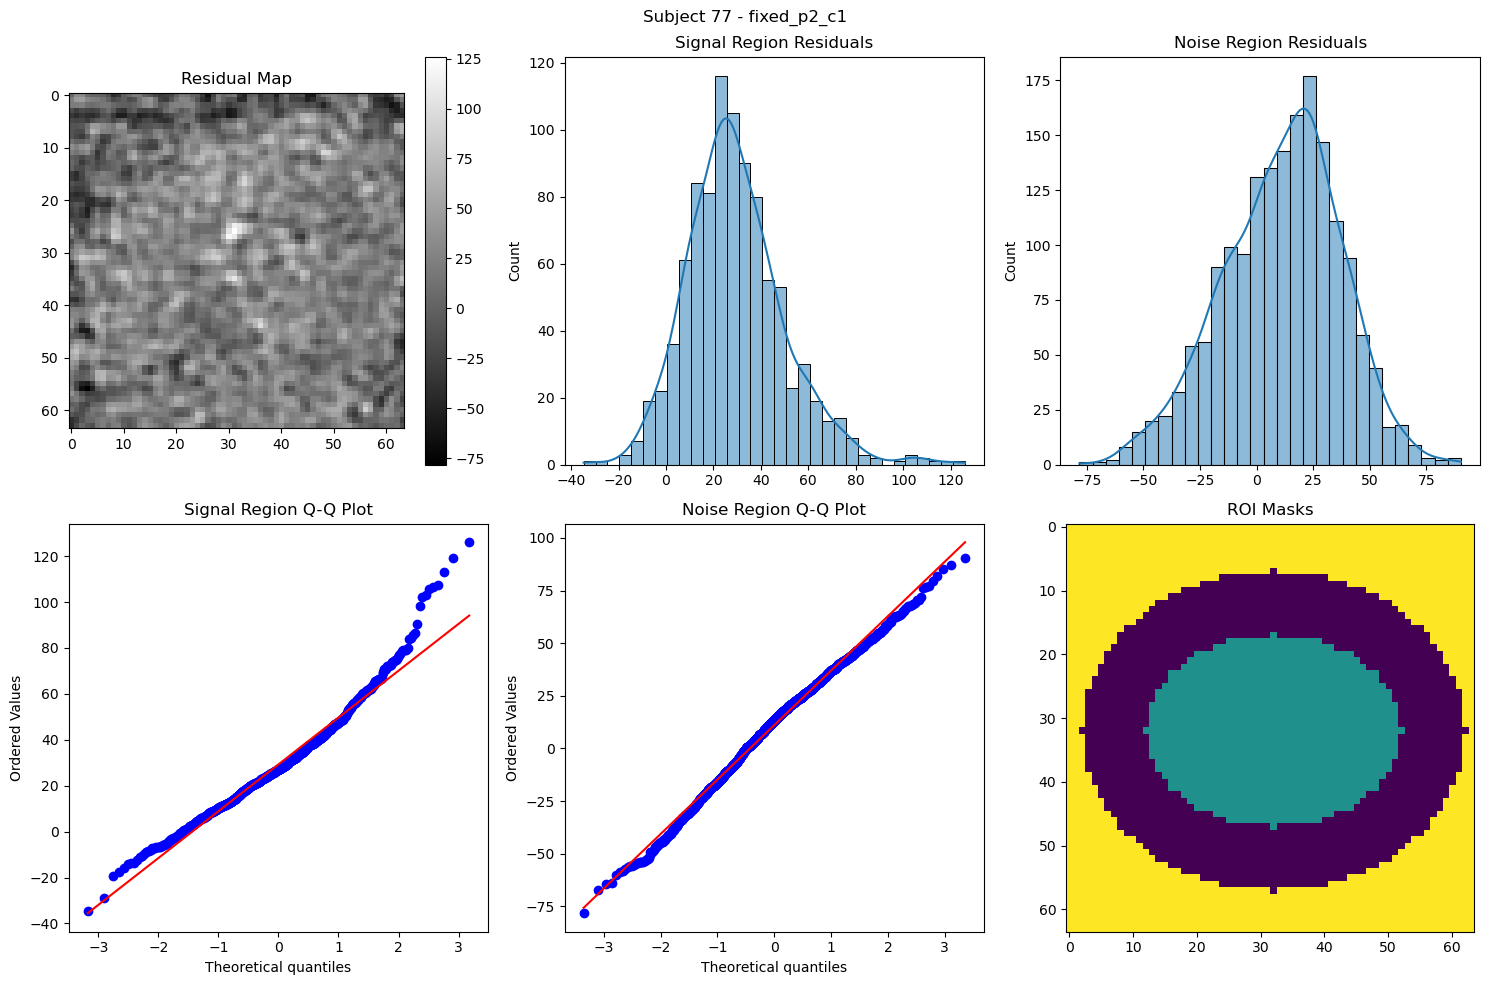

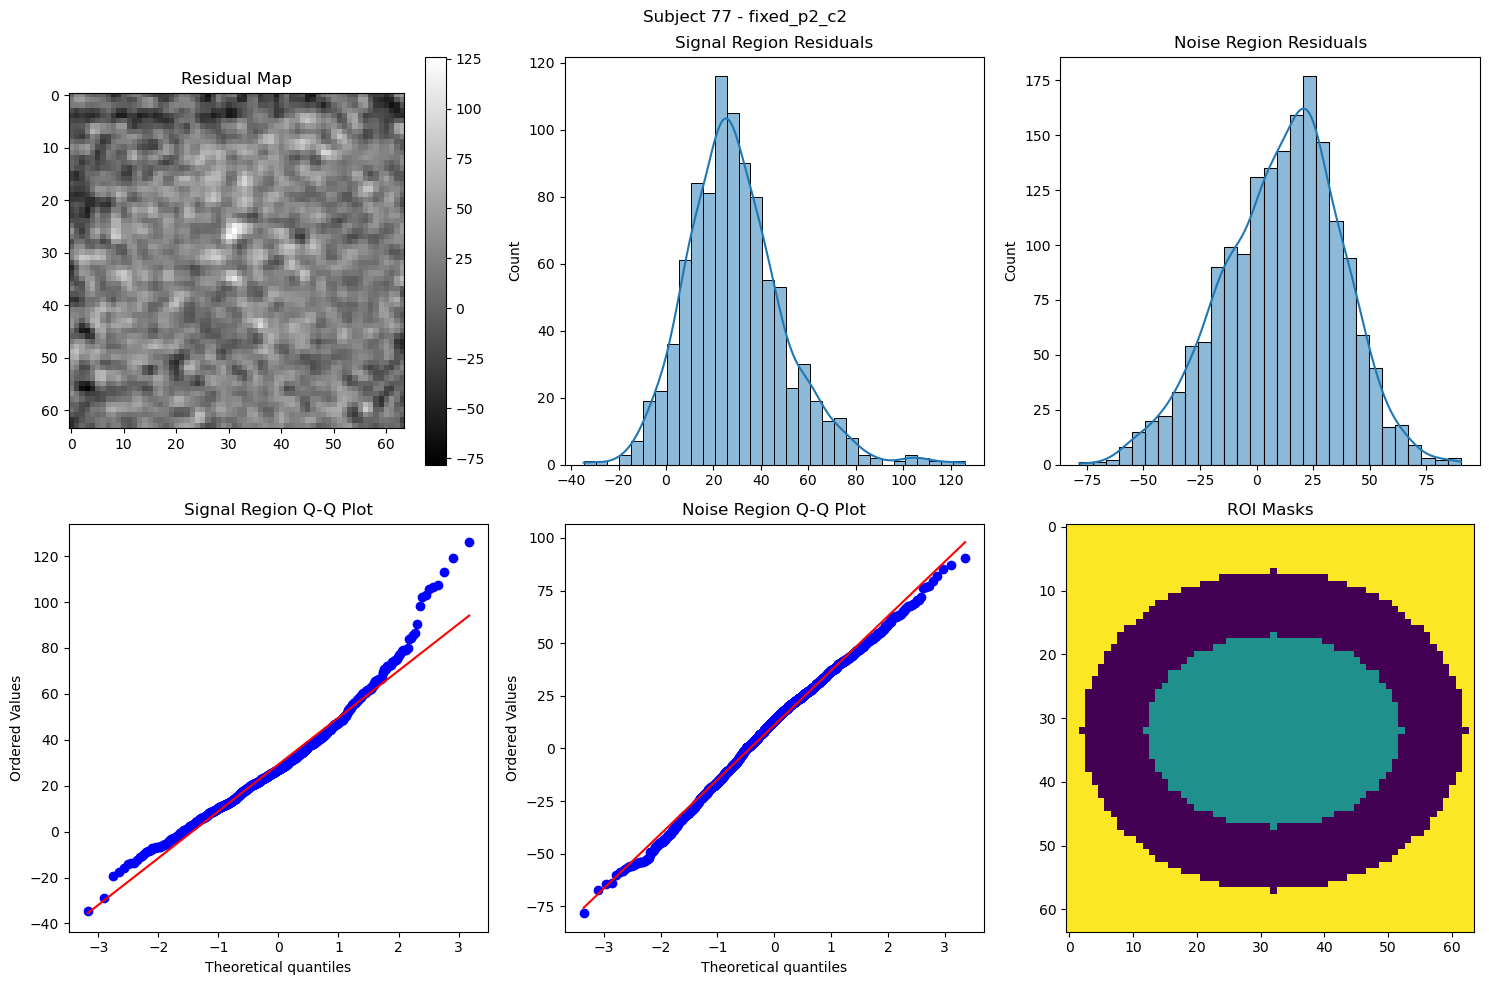

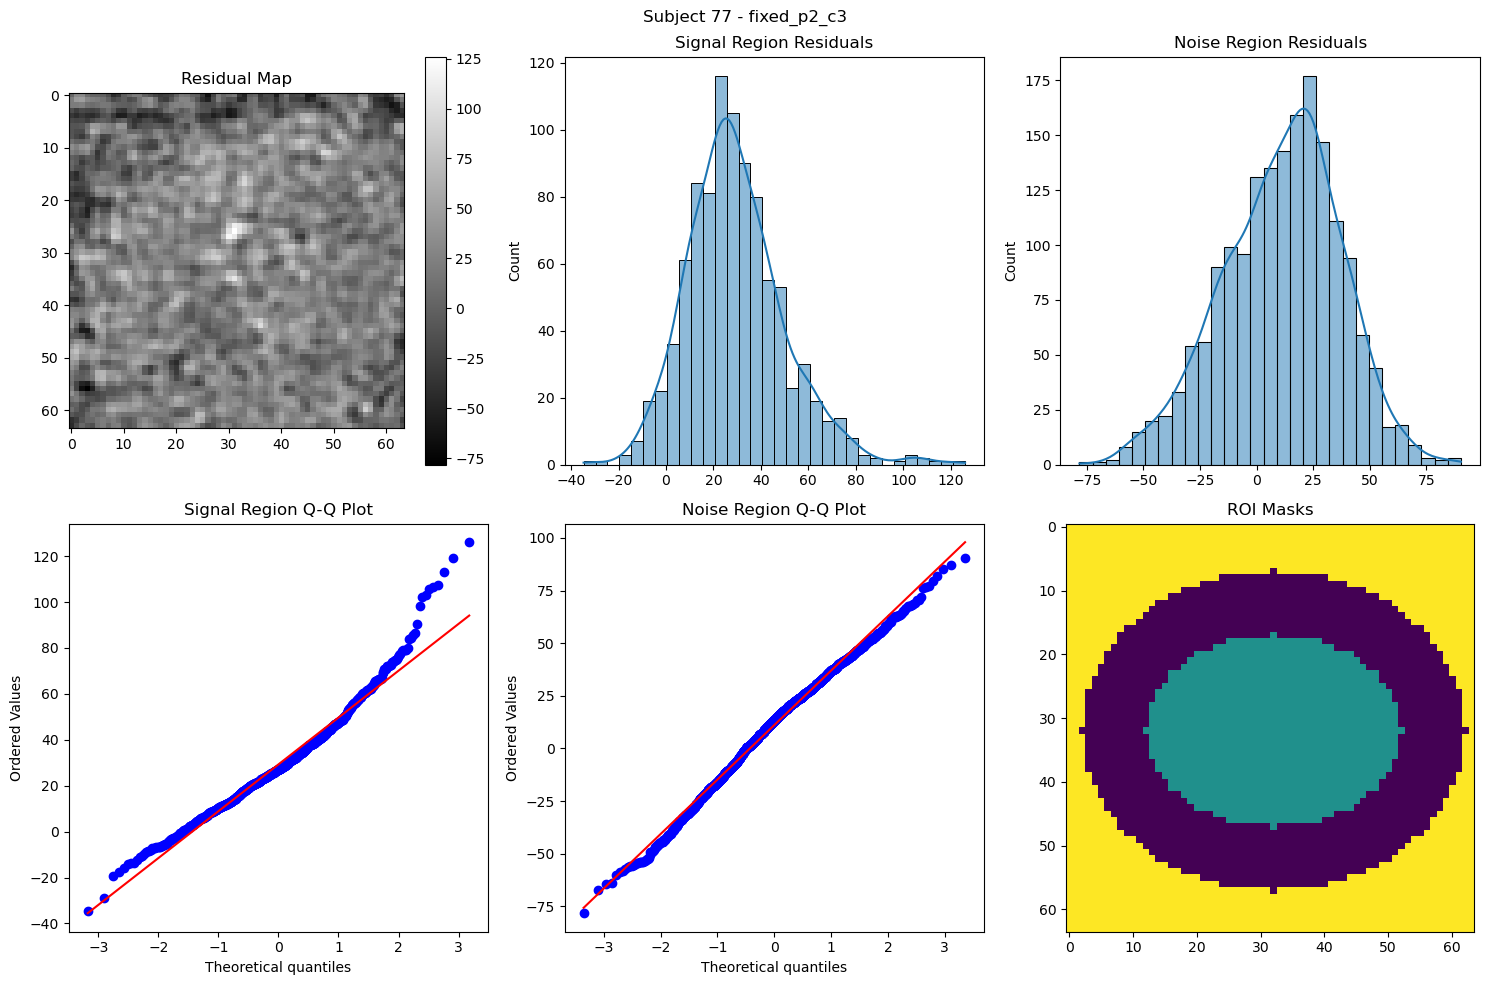

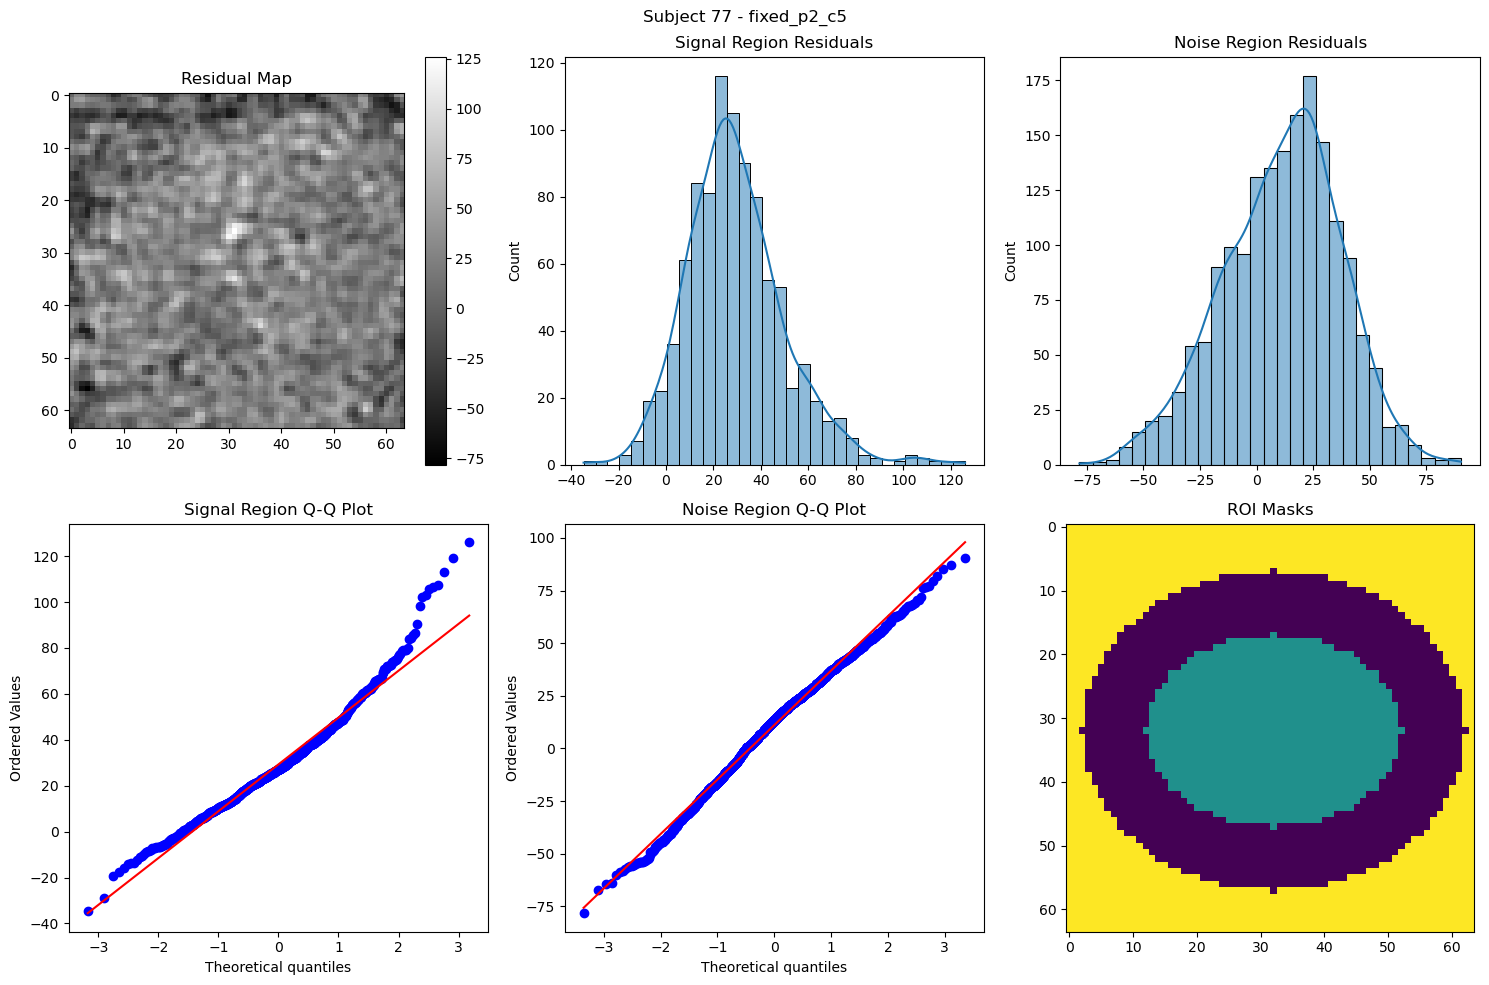

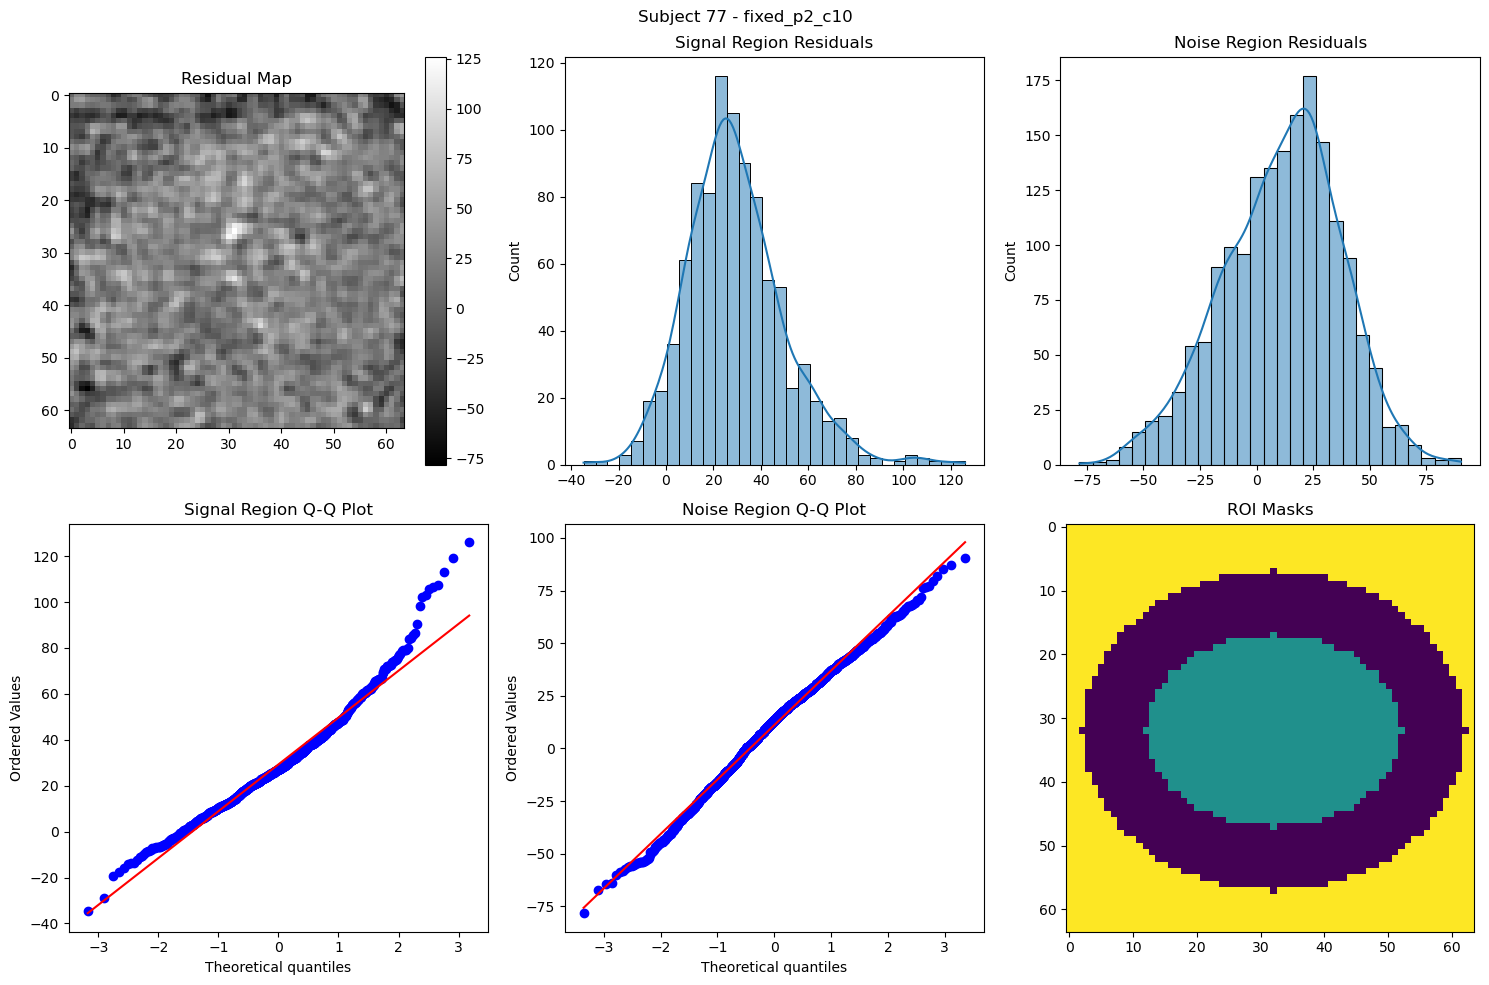

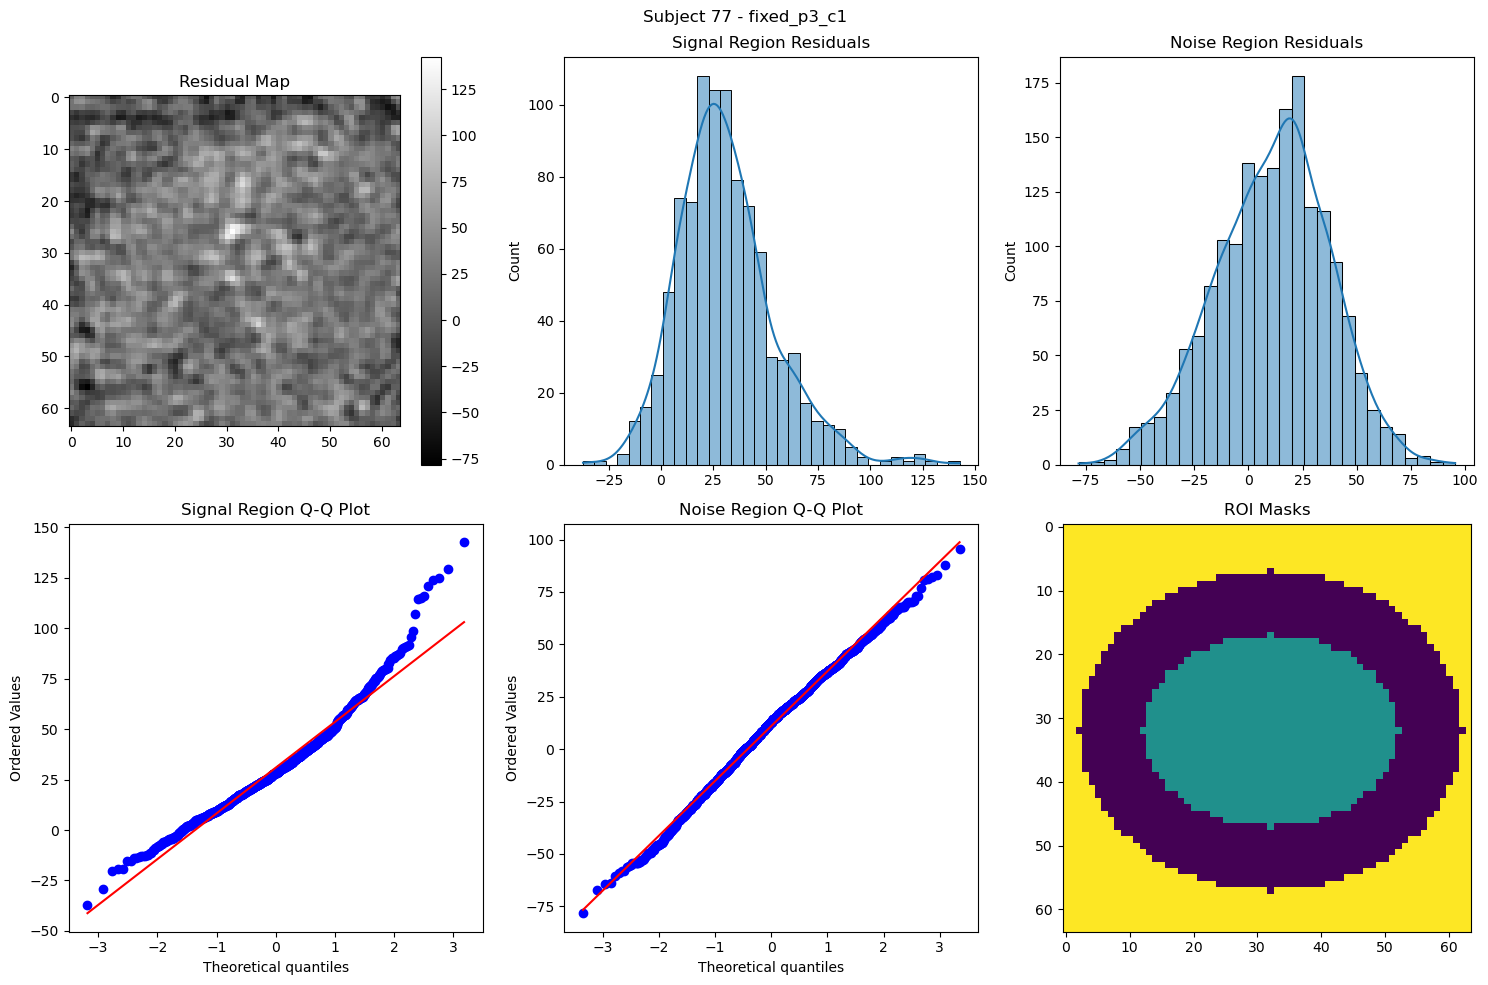

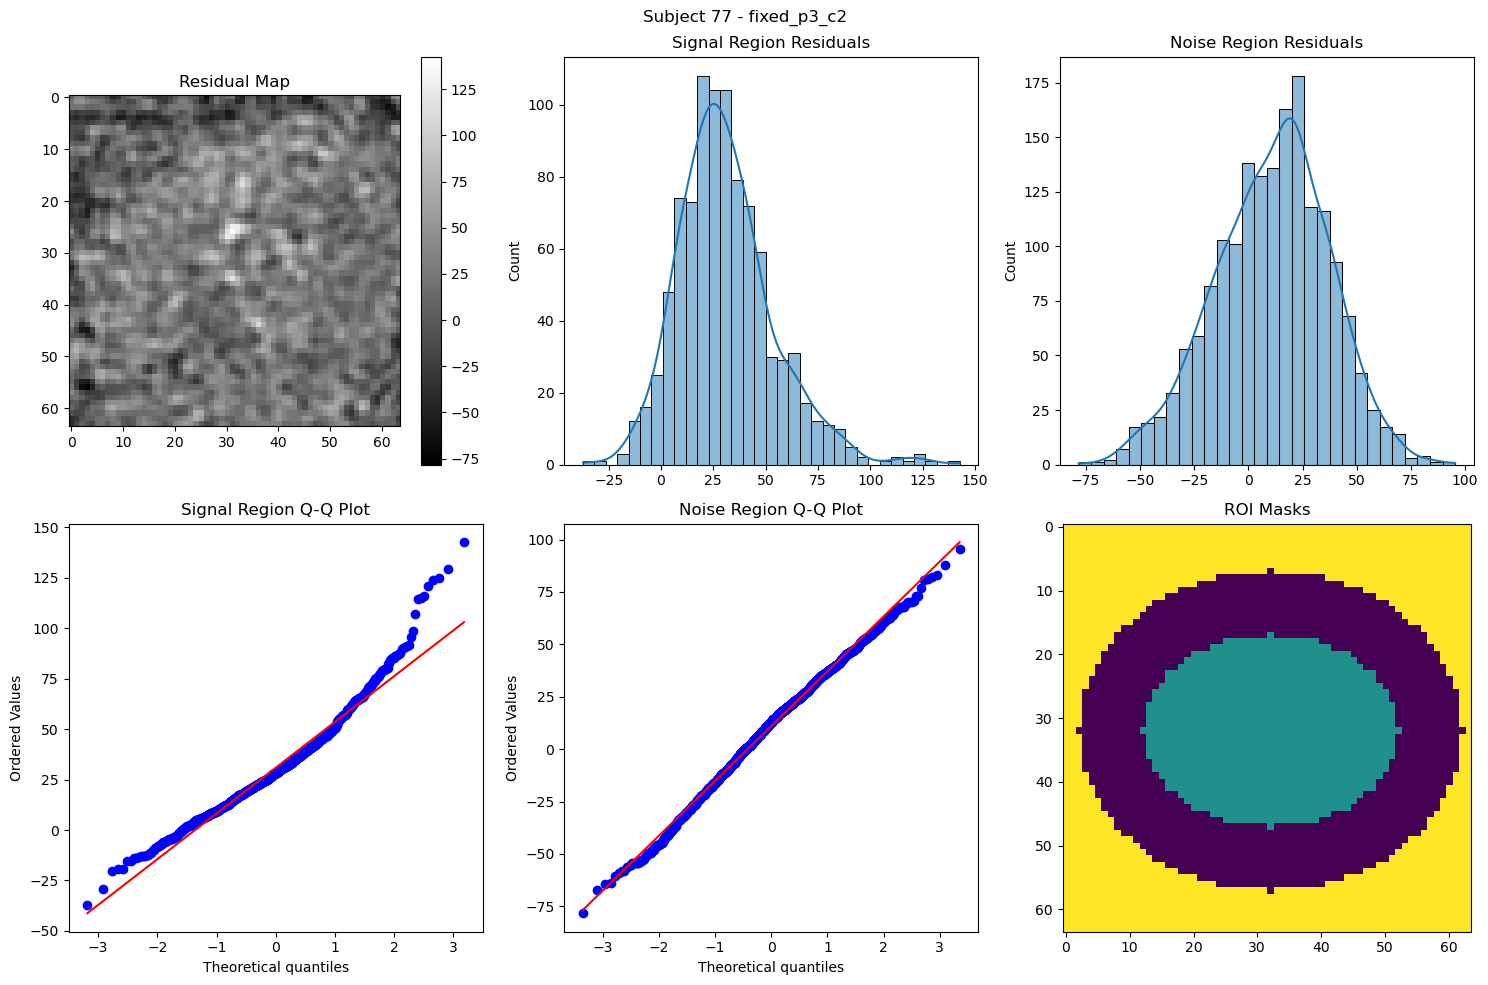

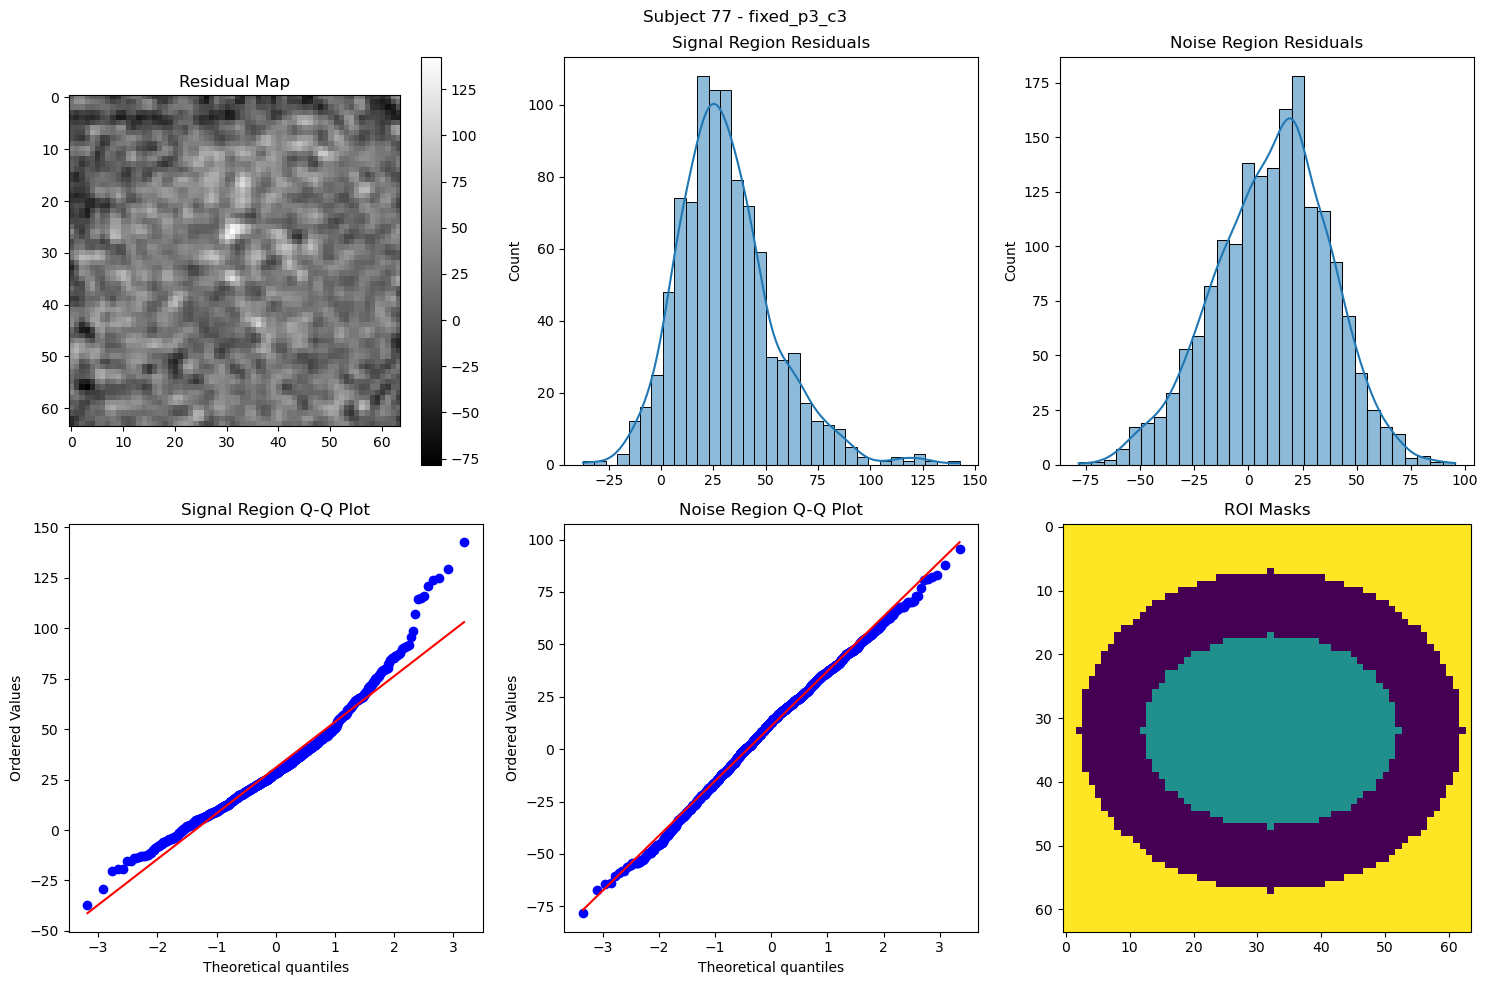

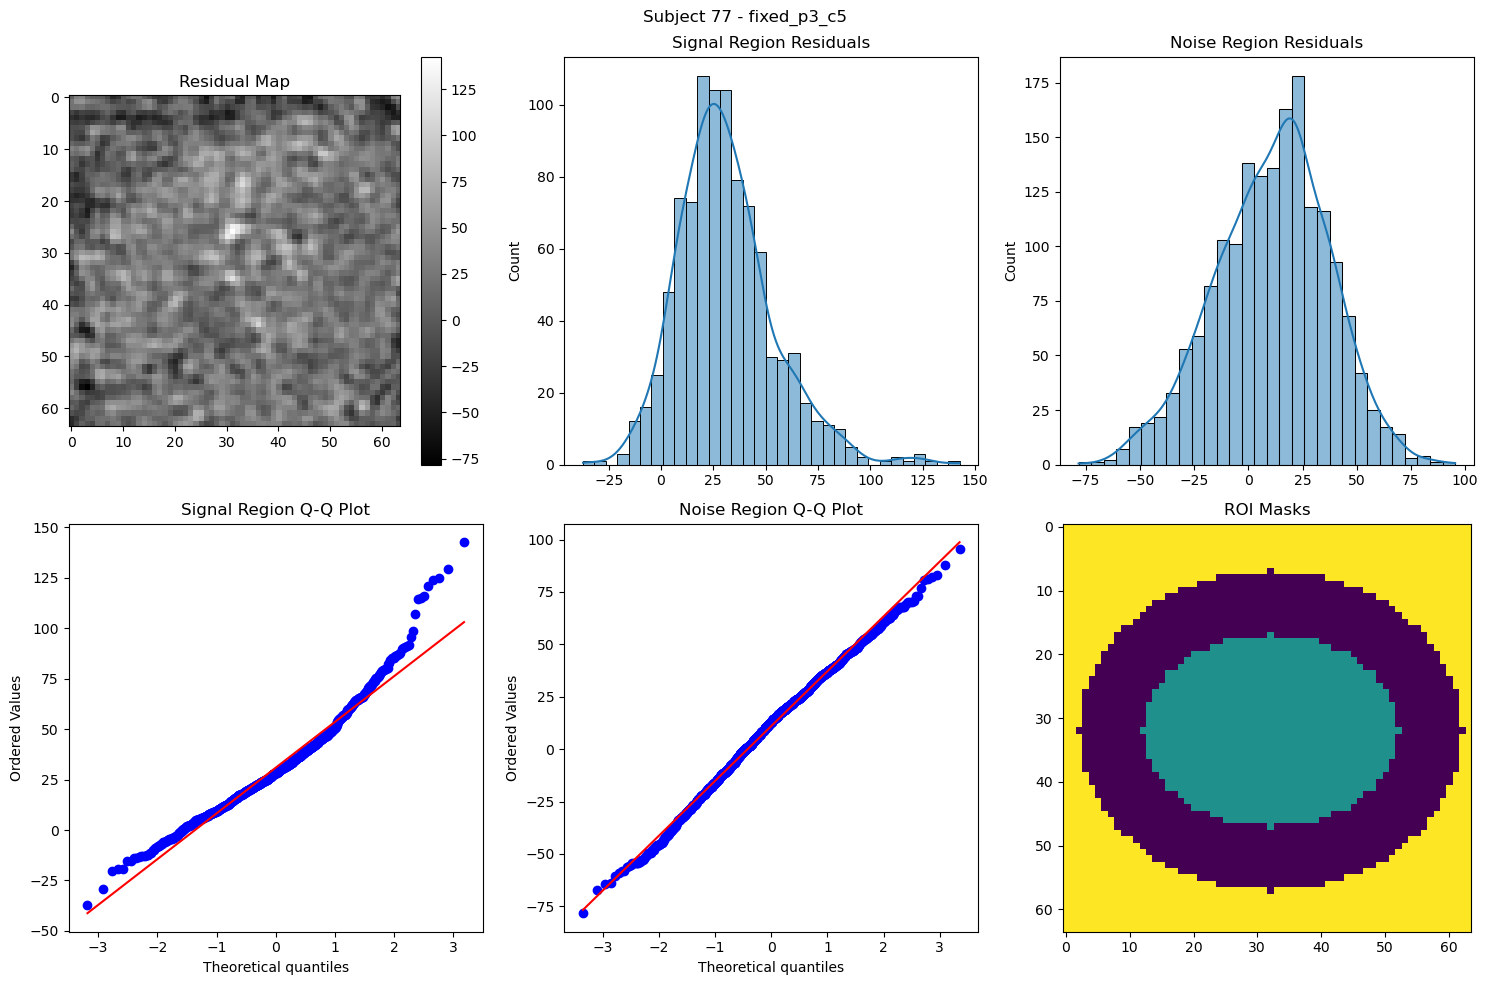

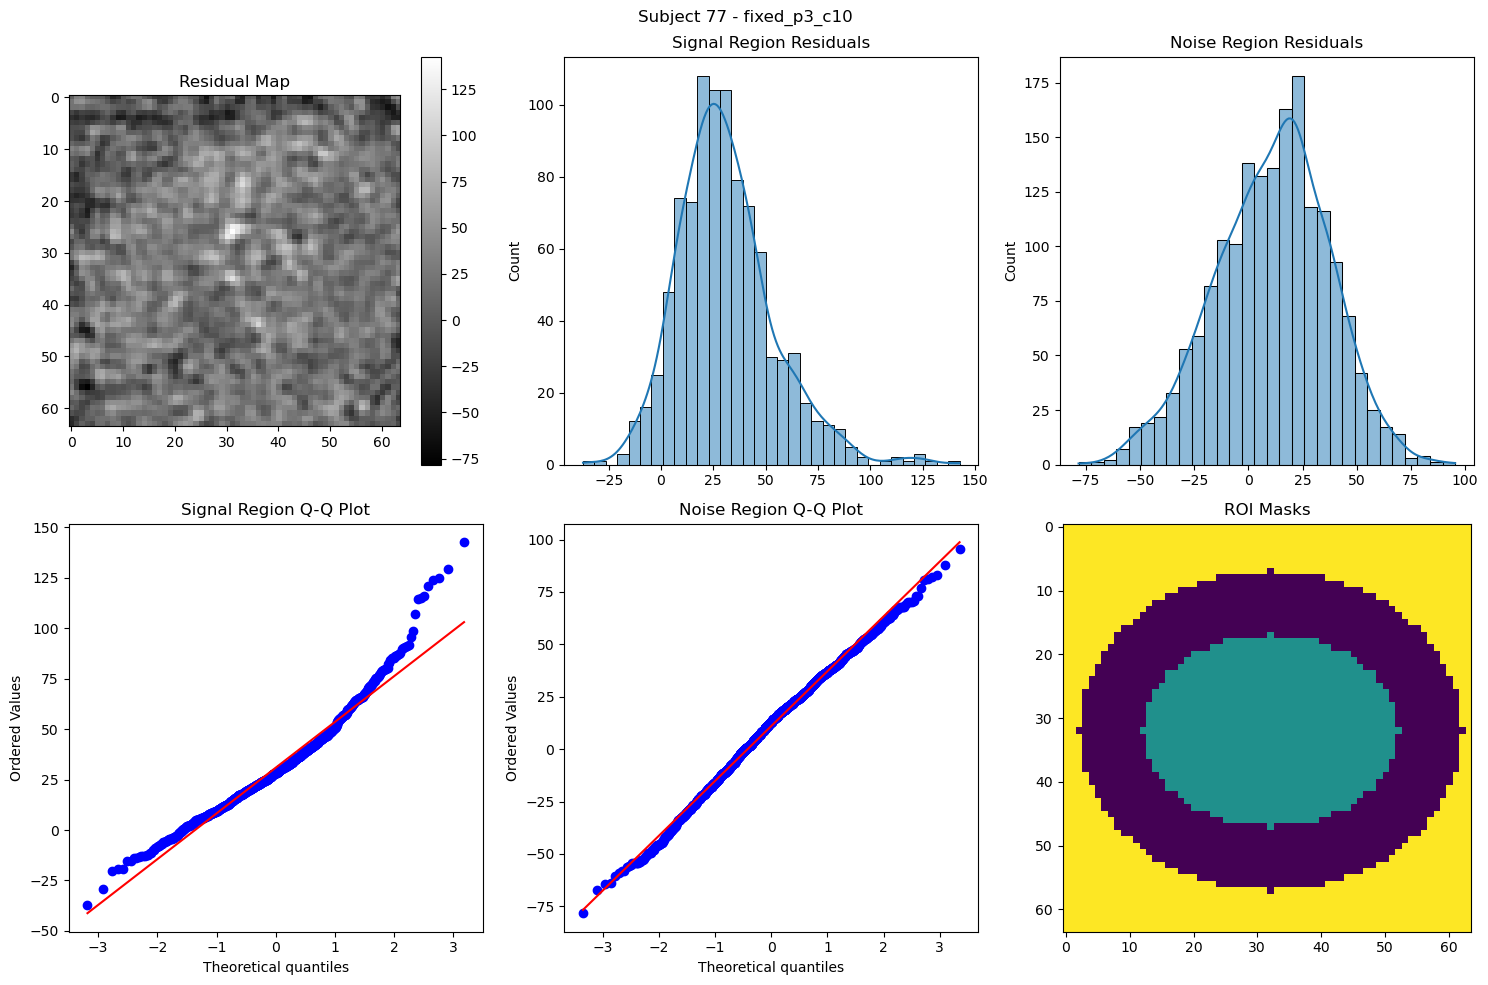

In [62]:

# Define parameters to test
methods = ['fixed', 'improved']
patch_radii = [1,2, 3]
n_components_list = [1, 2, 3, 5, 10]

# Process all subjects
results, summary_df = analyzer.process_all_subjects(
    subject_dict,
    methods=methods,
    patch_radii=patch_radii,
    n_components_list=n_components_list
)



In [50]:

# Create summary report
grouped_stats, summary_figs = analyzer.create_summary_report(summary_df)

# Save results
summary_df.to_csv(analyzer.output_dir / 'complete_results.csv')
grouped_stats.to_csv(analyzer.output_dir / 'grouped_statistics.csv')

# Print summary
print("\nAnalysis Complete!")
print("\nGroup Statistics Summary:")
print(grouped_stats)

H077_v2_tpiRecon
H077_v2_tpiRecon
H077_v2_tpiRecon
Das_H049_v2
Das_H049_v2
Das_H049_v2
Das_H049_v2
H096_v2_tpiRecon
Error reading file scaled for H096_v2_tpiRecon
H096_v2_tpiRecon
Error reading file scaled for H096_v2_tpiRecon
H096_v2_tpiRecon
Error reading file scaled for H096_v2_tpiRecon
H083_v2_tpiRecon
H083_v2_tpiRecon
H083_v2_tpiRecon
H086_v2_tpiRecon
H086_v2_tpiRecon
H086_v2_tpiRecon
H072_v2_tpiRecon
H072_v2_tpiRecon
H072_v2_tpiRecon
Das_H048_v2
Das_H048_v2
Das_H048_v2
H093_v2_tpiRecon
Error reading file scaled for H093_v2_tpiRecon
H093_v2_tpiRecon
Error reading file scaled for H093_v2_tpiRecon
H093_v2_tpiRecon
Error reading file scaled for H093_v2_tpiRecon
H090_v2_tpiRecon
H090_v2_tpiRecon
H090_v2_tpiRecon
H071_v2_tpiRecon
H071_v2_tpiRecon
H071_v2_tpiRecon
H099_v2_tpiRecon
H099_v2_tpiRecon
H099_v2_tpiRecon
H078_v2_tpiRecon
H078_v2_tpiRecon
H078_v2_tpiRecon
H085_v2_tpiRecon
H085_v2_tpiRecon
H085_v2_tpiRecon
H080_v2_tpiRecon
H080_v2_tpiRecon
H080_v2_tpiRecon
H095_v2_tpiRecon
Error

AttributeError: 'tuple' object has no attribute 'items'